<center>

# Linear Models

</center>


Lineer regresyon modeli, verilerdeki ilişkiyi açıklamak ve tahminlerde bulunmak için kullanılan bir istatistiksel analiz yöntemidir. Bu yöntemde, bağımlı değişkenin bağımsız değişkenlerle doğrusal bir ilişkisi olduğu varsayılır. Lineer regresyon modeli genellikle aşağıdaki formülle ifade edilir:

$$h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$

**Burada:**

* $h(x)$, bağımlı değişkendir(hipotez)
* $x_1, x_2, \ldots, x_n$, bağımsız değişkenlerdir.
* $\theta_0, \theta_1, \theta_2, \ldots, \theta_n$, modelin katsayılarıdır.

Lineer regresyon modeli, bağımlı değişkeni tahminlemek için kullanılır ve katsayılar, regresyon analizi ile tahminlenir. Bu model, veri setindeki ilişkiyi analiz etmek, değişkenler arasındaki etkileşimleri keşfetmek ve tahminler yapmak için kullanılabilir.

Aynı zamanda şu şekilde gösterilebilir:
$$
h(x) = \sum\limits_{j=0}^{2} \theta_j x_j \\
\text{where } x_0 = 1
$$

Matrise dönüştürmek istediğimizde: 
$$
\begin{bmatrix}
θ₀ \\
θ₁ \\
θ₂ \\
\end{bmatrix}
\begin{bmatrix}
x₀\\
x₁ \\
x₂ \\
\end{bmatrix}
$$  matrislerini elde ederiz. 

$x_0$ her zaman bire eşit olmalıdır. 

Formülde gösterilen değişkenler ve kullanılacak değişkenlerin açıklaması tablodaki gibidir:

| Sembol   | Açıklama                   |
|----------|----------------------------|
| $θ$      | Parametreler               |
| m        | Eğitim Örneği (Satır Sayısı)|
| x        | Girdiler / Özellikler      |
| y        | Çıktı / Hedef Değişken     |
| n        | Özellik Sayısı             |
| (x,y)    | m                          |














Scikit-learn kullanarak bir örnek yapalım:

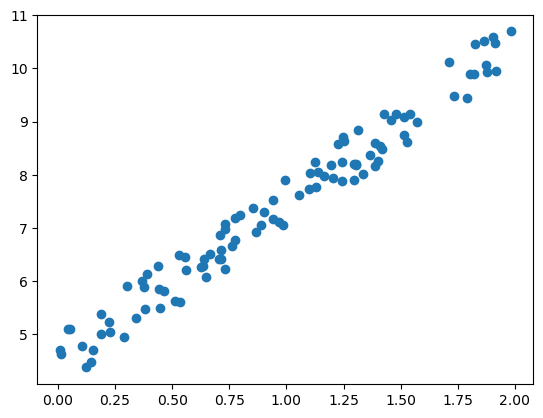

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.rand(100,1) #Rastgele sayılardan oluşan bir veri seti oluşturduk

plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
lin_reg = LinearRegression()

In [4]:
lin_reg.fit(x,y)
intercept = lin_reg.intercept_
coef = lin_reg.coef_ #Eğitilen modelin intercept (kesişim) terimini ve katsayılarını elde etmek için ilgili özellikler kullanılır.

In [5]:
x_new = np.array([[0], [2]])
y_predict = lin_reg.predict(x_new) #Tahmin değeri hesaplanır

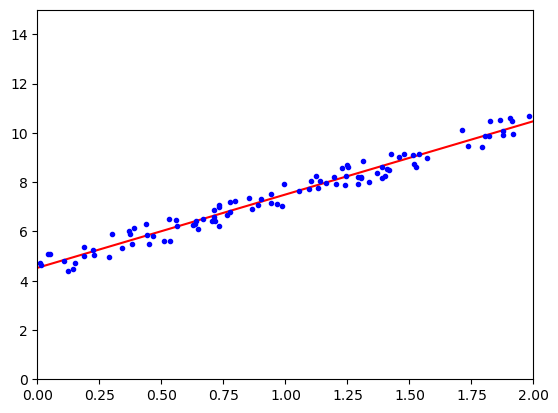

In [6]:
plt.plot(x_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

Rastgele oluşturduğumuz veri setini kullanarak bir regresyon çizgisini görselleştirdik.

## Ordinary Least Squares (En Küçük Kareler Yöntemi)

Ana amacı modelin tahmin ettiği değer ile verilerin gerçek değerleri arasındaki farkı minimize etmektir. Aşağıdaki formülle ifade edilir:

$$ \text{minimize} \: \theta(J(\theta)) = \frac{1}{2} \sum_{i=1}^{m} (h(x)^{(i)} - y^{(i)})^2 $$


J($θ$) maliyet fonksiyonunu (cost function) temsil eder, amaç bu değeri minimize etmektir. 

Bu formül toplam hatayı (1/2) ile çarparak (Gelecekteki matematiksel işlemleri kolaylaştırmak adına) hesaplar.

![OLS](OLS.png)


Yukarıda verilen görselde "Diabetes Dataset" (İlerleyen kısımlarda "Datasets Loading Utilites" bölümü altında görülecek) verisetini kullanarak iki boyutlu bir grafik içerisinde modelin tahminleri (h(x)) ile girdiler (x) arasındaki maliyet fonksiyonunu en iyi şekilde minimize etmek için çizdiği düz çizgi görülebilir.

### Non-Negative Least Squares

Katsayıların tamamının negatif olmaması koşulu uygulanabilir. 

Bu durum, katsayıların fiziksel veya doğal olarak negatif olmayan nicelikleri temsil ettiği durumlarda (örneğin, frekans sayıları veya mal fiyatları gibi) faydalı olabilir. 

LinearRegression, boolean bir positive parametresi kabul eder: True olarak ayarlandığında, En Küçük Kareler Yöntemi'nin negatif olmayan versiyonu uygulanır.

![OLSNNLS](ols_nnls.png)

Yukarıdaki görselden anlaşılabileceği gibi negatif olmayan kısıt bazı katsayıları 0'a küçültmektedir. Negatif Olmayan En Küçük Kareler yöntemi, doğal olarak seyrek sonuçlar üretir.

### Ordinary Least Squares Complexity

En küçük kareler çözümü, X'in tekil değer ayrışımı (singular value decomposition) kullanılarak hesaplanır.Eğer X bir şekle sahip bir matris ise, bu yöntemin maliyeti (s=sample,f=features) :

$$O(n_sn^2_f)n_s>n_f$$



## Ridge regression and classification

### Regression

Ridge regresyonu, En Küçük Karelerin bazı sorunlarını çözmek için katsayıların büyüklüğüne bir ceza uygulayarak giderir. Ridge katsayıları, cezalı kalan kareler toplamını en aza indirir. $l_2$ düzenlileştirme olarak da bilinir.

$$ J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2 $$


$\theta$ hiperparametresi ($\theta$ > 0) modeli ne kadar düzenlileştireceğinizi kontrol eder. $\theta$ = 0 iken Ridge regresyonu doğrusal bir regresyondur. $\theta$ değeri ne kadar büyükse, büzülme miktarı da o kadar fazla olur ve bu sayede katsayılar çoklu doğrusallığa karşı daha sağlam hale gelir.

![RIDGE](Ridge.png)

Yukarıdaki örnekte her bir renk, katsayı vektörünün farklı bir özelliğini temsil eder ve bu, düzenlilik parametresine bağlı olarak gösterilir.

$\alpha$ çok büyük olduğunda katsayılar sıfıra yaklaşır. $\alpha$ sıfıra yaklaştıkça katsayılar büyük salınımlar gösterir. Olması gereken $\alpha$ değerinin dengeyi sağlayabilecek şekilde ayarlanmasıdır.  

Ridge regresyonu çözücünün otomatik olarak seçilebilmesine "solver ="auto"" yöntemi ile izin verir. Bu yöntem seçildiğinde Ridge "lbfgs", "cholesky" ve "sparse_cg" çözücüleri arasında seçim yapacaktır. Aşağıdaki tabloda gözüken şartlar sırasıyla yukarıdan aşağıya doğru kontrol edilir ve doğru şartı bulduğunda ilişkili olan çözücüyü seçecektir.

| Çözücü     | Şart                                             |
|------------|--------------------------------------------------|
| lbfgs      | positive = True seçeneği seçilmiştir.            |
| cholesky   | X girdisi seyrek değildir.                       |
| sparse_cg  | Yukarıdaki koşulların hiçbiri sağlanamamıştır.   |


Boston Dataset'i(İlerleyen kısımlarda "Datasets Loading Utilites" bölümü altında görülecek) kullanarak Ridge Regresyon'u ile ilgili örnek yapalım:

In [7]:
from sklearn.datasets import load_iris
import mglearn

iris = load_iris()
X, y = iris.data, iris.target

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_egitim, X_test, y_egitim, y_test= train_test_split(X,y,random_state=0) #Eğitim ve test verileri oluşturuldu.

In [10]:
from sklearn.linear_model import Ridge

In [11]:
ridge = Ridge().fit(X_egitim,y_egitim)

In [12]:
print(ridge.score(X_egitim,y_egitim))
print(ridge.score(X_test,y_test))

0.9398707938221028
0.887698220074392


Modelin eğitim verisindeki performansına karşı basitliğin ne kadar olacağını $\alpha$ parametresi belirler. $\alpha$ parametresi default olarak 1 gelir. $\alpha$'nın değeri arttıkça katsayılar sıfıra doğru yaklaşır ve bu durum modelin eğitim verisindeki performansını azaltırken genelleştirmesine yardım edebilir.

Örneğin $\alpha$ = 50 kabul edelim

In [13]:
ridge50 = Ridge(alpha=50).fit(X_egitim,y_egitim)

In [14]:
print(ridge50.score(X_egitim,y_egitim))
print(ridge50.score(X_test,y_test))

0.9110228964407461
0.8642521297390546


Yukarıda görüldüğü gibi $\alpha$ arttıkça eğitim verisinde bir düşüş söz konusudur. Şimdi ise $\alpha = 0.1$ deneyelim.

In [15]:
ridge01 =Ridge(alpha=0.1).fit(X_egitim,y_egitim)
print(ridge01.score(X_egitim,y_egitim))
print(ridge01.score(X_test,y_test))

0.9402809585549567
0.8885189315890424


Aşağıdaki tabloda da görüleceği üzere $\alpha=0.1$ durumunda modele girecek katsayılar daha az sınırlandırılır. Böylece hem eğitim setindeki hem de test setindeki doğruluk skoru yükselmiştir.

|           |   test  | train |
|-----------|---------|-------|
| $\alpha=0.1$ |   0.8885189315890428    |  0.9402809585549567    |
| $\alpha=1$   |   0.8876982200743924    |  0.9398707938221028    |
| $\alpha=50$  |   0.8642521297390545     |   0.911022896440746   |


### Classification

"RidgeClassifier" Ridge regresyonun sınıflandırma versiyonudur. Bu sınıflandırıcı ilk olarak hedef ikilileri {-1,1} olarak dönüştürür ve En Küçük Kareler optimizasyonu yapılır. Tahmin edilen sınıf, regresörün tahmininin işaretine karşılık gelir. (y = Tahmin edilen sınıf) için (y>0) = 1, (y<0) = -1  kabul edilir

RidgeClassifier'ın özelliklerinden biri sınıflandırma modelini uyumlandırmak için En Küçük Kareler Kaybı'nı kullanmasıdır. Bu kullanım geleneksel olarak kullanılan lojistik regresyon ve menteşe kaybı (Hinge Loss) gibi kayıp fonksiyonlarında bulunmamaktadır. Pratikte bahsedilen modellerin hepsi benzer sonuçlar verebilmektedir.

RidgeClassifier çok sayıda sınıf bulunduğunda lojistik regresyon ve menteşe kaybı gibi seçeneklere göre çok daha hızlı olabilir. Bu avantajın sebebi projeksiyon matrisi yalnızca bir defa hesaplamasıdır: $(X^TX)^{-1}X^T$


Bu sınıflandırıcı bazen Least Squares Support Vector Machines (En Küçük Kareler Destek Vektör Makineleri) olarak isimlendirilmektedir. Aşağıda örnek olarak "The 20 newsgroups text dataset (fetch_20newsgroups)" veri seti ile (7.2. Real world datasets başlığı altında gösterilecek) yapılmış bir modellemenin lojistik regresyon ve RidgeClassifier özelinde sonuçları verilmiştir:

|                   | Logistic Regression                        | Ridge Classifier                |
|-------------------|--------------------------------------------|---------------------------------|
| Training          | LogisticRegression(C=5, max_iter=1000)     | RidgeClassifier(solver='sparse_cg') |
| Train time        | 0.331s                                     | 0.0404s                         |
| Test time         | 0.000583s                                  | 0.000628s                       |
| Accuracy          | 0.773                                      | 0.76                            |
| Dimensionality    | 5316                                       | 5316                            |
| Density           | 1.0                                        | 1.0                             |


### Ridge Complexity

Ordinary Least Squares ile aynı karmaşıklığa sahiptir. (s=sample,f=features)
$$O(n_sn^2_f)n_s>n_f$$


### Setting the regularization parameter: leave-one-out Cross-Validation

RidgeCV yöntemi $\alpha$'nın en iyi değerini bulma amacıyla Çapraz Doğrulama(Cross Validation) yöntemini otomatik olarak kullanır. Çapraz Doğrulama veri setini Eğitim Kümesi ve Test Kümesi olarak iki parçaya böler. Eğitim kümesi üzerinde model oluşturur ve Test Kümesi üzerinde bu model test edilir. Bu şekilde modelin olası problemleri ve verimliliği test edilmektedir.

In [16]:
import numpy as np
from sklearn import linear_model
reg = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
reg.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg.alpha_

0.01

Yukarıdaki kod bloğu RidgeCV'nin çapraz doğrulama ile regresyonu nasıl kullandığını gösterir.

## Lasso

Lasso, bir düzenlileştirme terimi eklenmiş bir doğrusal modelden oluşur. Minimize edilmesi gereken amaç fonksiyonu şöyledir:

$$ J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n} |\theta_i| $$


Lasso ve Ridge arasındaki temel fark yukarıdaki formülde de görülebileceği gibi Ridge düzenlileştirme terimi için katsayıların karesini kullanırken Lasso'nun bunun için katsayıların mutlak değerini kullanmasıdır.$l_2$ normunun yerine $l_1$ normunu kullanır. Belirli koşullar altında, Lasso kesin sıfır olmayan katsayı kümesini geri kazanabilir. Lasso öznitelik sayısını önemli ölçüde azaltır.

Ridge Regresyonu gibi Lasso da katsayıları sıfıra yaklaştırmak için kısıtlar. Lasso düzenlileştirmesiyle bazı katsayılar sıfır alınır, yani veri setindeki bazı özellikler modele dahil edilmez. Bu sayede modelde daha önemli sayılabilecek özellikler yer alır.

Ridge Regresyonu'nda yaptığımız gibi "iris" veri setine Lasso uygulayalım:

In [17]:
from sklearn.linear_model import Lasso

In [18]:
lasso = Lasso().fit(X_egitim,y_egitim) 

In [19]:
print(lasso.score(X_egitim,y_egitim))
print(lasso.score(X_test,y_test))

0.46493723077817095
0.43173063403911605


Eğitim ve Test verilerindeki doğruluk skorları Ridge'e göre oldukça düşük, şimdi kaç adet katsayının sıfırdan farklı olduğuna bakalım

In [20]:
import numpy as np
np.sum(lasso.coef_!=0) #modelde kullanılan öznitelik sayısı

1

Lasso'da da Ridge'de olduğu için $\alpha = 1$ olarak öntanımlı gelir. $\alpha$ değeri katsayıları sıfıra yaklaştırmak için modeli ne kadar zorlayacağımızı gösterir. Underfitting'i azaltmak için $\alpha$ değerini azaltalım.

In [21]:
lasso001 = Lasso(alpha=0.01,max_iter=1000000).fit(X_egitim,y_egitim)
print(lasso001.score(X_egitim,y_egitim))
print(lasso001.score(X_test,y_test))

0.9375046008310587
0.8893290837760505


$\alpha = 0.01$ için modelin doğruluk skoru gözle görülür şekilde yükseldi.

|           |   test  | train |
|-----------|---------|-------|
| $\alpha=0.01$ |   0.8893290837760505    | 0.9375046008310586   |
| $\alpha=1$   |   0.4317306340391167    |  0.46493723077817173    |
|



> Not: Lasso regresyonu, seyrek modeller ürettiğinden dolayı özellik seçimi yapmak için kullanılabilir.

### Setting regularization paramete

$\alpha$ parametresi tahmin edilen katsayıların seyreklik derecesini(sıfır olmayan katsayıların adedi) kontrol eder. Aşağıda bununla ilgili bir örnek verilmiştir:

Gerekli kütüphanelerin yüklenmesi ve model eğitimi

In [22]:
from sklearn import linear_model
Lreg = linear_model.Lasso(alpha=0.5)#alpha parametresi
Lreg.fit([[1,1], [2, 2], [3, 3]], [1, 2, 3]) #Model eğitimi

Lasso(alpha=0.5)

In [23]:
Lreg.predict([[0,1]]) 

array([1.5])

In [24]:
Lreg.coef_

array([0.25, 0.  ])

Model katsayılarını elde etmek için "coef_" kullanıyoruz, bu bağımsız değişkenlerin katsayılarını döndürür.

In [25]:
Lreg.intercept_

1.5

"intercept_" modelin Y eksenini kestiği noktadaki değeri döndürür.

In [26]:
Lreg.n_iter_

2

"n_iter_" belirtilen toleransa ulaşmak için gerçekleştirilen iterasyon sayısını verir.

## Multi-Task Lasso

MultiTaskLasso için parametreler ve özellikler, Lasso ile benzerdir. Tek fark, alpha parametresindedir. Lasso'da, alpha parametresi L1 normunu çarpan bir sabittir, ancak MultiTask Lasso'da L1/L2 terimlerini çarpan bir sabittir.

$$
min_w\frac{1}{2n_{\text{samples}}} \left\| Y - XW \right\|_{\text{Fro}}^2 + \text{alpha} \left\| W \right\|_{21}
$$
Burada "Fro" Frobenius normunu temsil etmek için kullanılmıştır.

$$ ||A||_{Fro} = \sqrt{\sum_{ij} \alpha_{ij}^2} $$

Ve $l1, l2$ eklenir.

$$||A||_{21} = \sum_i \sqrt{\sum_j \alpha_{ij}^2}$$

Multi-Task Lasso için bir örnek yapalım:

Aşağıdaki kod blokları katsayıları uyumlu hale getirmek için Multi-Task Lasso kullanmaktadır. 

In [27]:
from sklearn import linear_model
MTLReg = linear_model.MultiTaskLasso(alpha=0.5) #alpha = 0.5 aldık.
MTLReg.fit([[0,0], [1, 1], [2, 2]], [[0, 0],[1,1],[2,2]])

MultiTaskLasso(alpha=0.5)

In [28]:
MTLReg.predict([[0,1]]) 

array([[0.53033009, 0.53033009]])

In [29]:
MTLReg.coef_ #Ağırlık vektörünü elde ettik.

array([[4.69669914e-01, 2.35513869e-16],
       [4.69669914e-01, 2.35513869e-16]])

In [30]:
MTLReg.intercept_ #Kesişim değerini elde ettik.

array([0.53033009, 0.53033009])

In [31]:
MTLReg.n_iter_ #Toplam iterasyon sayısı

2

## Elastic-Net

ElasticNet, birbirleriyle ilişkili olan birden çok özelliğin olduğu durumlarda kullanışlıdır. Lasso, bu özelliklerden birini rastgele seçme eğilimindedir, ancak elastic-net muhtemelen her ikisini de seçecektir.

ElasticNet, katsayıların hem $l1$ hem de $l2$ norm düzenlileştirmesiyle eğitilen bir doğrusal regresyon modelidir. "l1_ratio" parametresini kullanarak ve arasındaki çakışma oranını kontrol ederiz. Düzenlileştirme terimi Ridge ve Lasso düzenlileştirme terimlerinin karışımıdır ve bu karışım oranını $r$ ile kontrol edebiliriz. 

**$r=0$ için:**
Elastic net, Ridge Regresyon'una eşittir.

**$r=1$ için:**
Elastic net, Lasso Regresyon'una eşittir.

Minimize edilecek amaç fonksiyonu şöyledir:

$$ \min_{w} \frac{1}{2n_{\text{samples}}} ||Xw - y||_{2}^{2} + \alpha\rho ||w||_{1} + \alpha(1 - \rho) \frac{1}{2} ||w||_{2}^{2}$$


![Elastic](Elastic.png)

Yukarıdaki görselde düz çizgiler Lasso'yu gösterirken çizgili olanlar Elastic-Net'i göstermektedir. Elastic-Net, Lasso gibi bazı katsayıları sıfırdan farklı hale getirirken, aynı zamanda Ridge'in düzenlileştirme özelliklerini korumaktadır. Elastic-Net katsayıların bağlantılı olduğu durumlarda da kullanılabilir.

Elastic-Net ile ilgili bir örnek yapalım.(l1_ratio, $r$'a eşittir)

In [32]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)

In [33]:
elastic_net.fit(X,y)

ElasticNet(alpha=0.1)

In [34]:
elastic_net.predict([[1.5,2,3,5]])

array([0.92747743])

## Multi-Task Elastic-Net

MultiTaskElasticNet, aynı anda birden fazla regresyon probleminde seyrek katsayılar tahmin eden bir elastik ağ modelidir. Y, (n_samples, n_tasks) şeklindeki 2D bir dizi olarak temsil edilir. Kısıt ise, tüm regresyon problemleri için seçilen özelliklerin aynı olmasıdır ve bu özelliklere görevler denir.

Minimize edilmesi gereken amaç fonksiyonu şöyledir:
$$
\min_{w} \frac{1}{2n_{samples}} ||Xw - y||_{Fro}^{2} + \alpha\rho||w||_{21} + \alpha(1 - \rho)\frac{1}{2}||w||_{Fro}^{2}
$$

Elastic-Net'in aksine, Multi-Task Elastic-Net'te Precompute (Hesaplama işlemlerini daha hızlı tamamlayabilmek için matris işlemlerinin önceden hesaplanabilmesine imkan tanıyan bir özellik) bulunmamaktadır. 

> Not: MultiTaskElasticNetCV sınıfı, alpha ($α$) ve l1_ratio ($ρ$) parametrelerini çapraz doğrulama (cross-validation) kullanarak ayarlamak için kullanılabilir.

Aralarında farkı da gösterebilme amacıyla, Multi-Task Lasso'da gerçekleştirdiğimiz örneği Multi-Task Elastic-Net için yapalım:

In [35]:
from sklearn import linear_model
clf = linear_model.MultiTaskElasticNet(alpha=0.1) #alpha = 0.1 belirledik.

In [36]:
clf.fit([[0,0], [1, 1], [2, 2]], [[0, 0], [1, 1], [2, 2]]) #Model eğitimi

MultiTaskElasticNet(alpha=0.1)

In [37]:
print(clf.coef_) #Modelin katsayılarını aldık.

[[0.45663524 0.45612256]
 [0.45663524 0.45612256]]


In [38]:
print(clf.intercept_) #Kesim noktalarını aldık.

[0.0872422 0.0872422]


Bu kod parçası, MultiTaskElasticNet modelini kullanarak aynı girdi verileriyle iki ayrı regresyon problemi çözmeyi gösterir. Her bir regresyon problemi için ayrı katsayılar ve kesim noktaları elde edilir.


## Least Angle Regression

Least-angle regression (LARS), yüksek boyutlu verilerde regresyon analizi yapmak için kullanılan bir algoritmadır, bir tür ileri adım adım regresyon yöntemidir. Bu değişkeni tam olarak uygun hale getirmek yerine, LARS bu değişkenin katsayısını sürekli olarak en küçük kareler değerine doğru hareket ettirir. Bu, değişkenin artan artıklarla olan mutlak değeriyle olan korelasyonunu azaltır.

**Avantajları:**

* Özellik sayısı, örnek sayısından önemli ölçüde fazla olduğu durumlarda sayısal olarak verimlidir.

* İleri seçimle aynı hesaplama hızına sahiptir ve sıradan en küçük karelerle aynı karmaşıklık düzenine sahiptir.

* Çapraz doğrulama veya modeli ayarlamak için benzer girişimlerde kullanışlı olan tam bir parçalı doğrusal çözüm yolu üretir.

* Eğer iki özellik hedefle neredeyse eşit şekilde ilişkilendirilmişse, katsayıları yaklaşık olarak aynı hızda artmalıdır. Bu algoritma, sezgiye uygun bir şekilde davranır ve daha da istikrarlıdır.

* Lasso gibi diğer tahminciler için çözümler üretmek için kolayca değiştirilebilir.

**Dezavantaj:**

* LARS, iteratif olarak artıkların yeniden uyarlanması temeline dayandığından, gürültünün etkisine özellikle duyarlı görünmektedir.

Aşağıda diabetes veri seti üzerinde bir LARS regresyon modeli eğitelim:

Gerekli kütüphanelerin içe aktarılması

In [39]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

Diabetes veri setini yükleme

In [40]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

LARS modelini oluşturma ve eğitme

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

reg = linear_model.Lars()
reg.fit(x_train, y_train)

Lars()

Eğitilmiş modeli kullanarak tahmin yapma

In [42]:
y_pred = reg.predict(x_test)

score = reg.score(x_test, y_test)

print(score)

0.5514200923362629


## LARS Lasso

LARS Lasso, Lasso algoritması kullanılarak uygulanana bir regresyon modelidir. LARS Lasso, katsayıların normuna bağlı olarak kesikli doğrusal bir çözüm üretirken, koordinat inişine dayalı lasso uygulamasından farklı bir yöntem kullanır. Bu yaklaşım, lasso modelinin çözümünü elde etmek için kullanıldığında, modelin etkili bir şekilde basitleştirilmesini ve değişken seçiminin yapılmasını sağlar.


Gerekli kütüphanelerin içe aktarılması

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model

"lars_path" fonksiyonu kullanılarak düzenlileştirme yolunun hesaplanması

In [44]:
X, y = datasets.load_diabetes(return_X_y=True) #"diabetes" datesetini kullandık
_, _, coefs = linear_model.lars_path(X, y, method="lasso", verbose=True) 

.

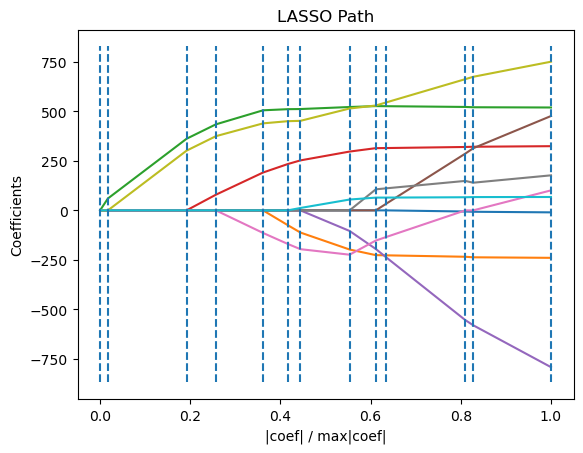

In [45]:
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle="dashed")
plt.xlabel("|coef| / max|coef|")
plt.ylabel("Coefficients")
plt.title("LASSO Path")
plt.axis("tight")
plt.show()

Yukarıdaki örnekte LARS algoritması kullanarak LASSO yoluyla düzenlileştirme yolu hesaplaması yapar ve sonucu grafik olarak gösterir.

Lars algoritması, düzenlileştirme parametresine bağlı olarak katsayıların tam yolunu neredeyse hiçbir ek maliyet olmadan sağlar. Bu nedenle yaygın bir işlem, "lars_path" veya "lars_path_gram" fonksiyonlarından birini kullanarak katsayıların yolunu elde etmektir. Bu fonksiyonlar, katsayıların nasıl değiştiğini belirlemek için kullanılabilir.

## Orthogonal Matching Pursuit (OMP)

Orthogonal Matching Pursuit yani "Ortogonal Eşleşme Takibi" sinyal kurtarma ve gürültü giderme için kullanılan bir yöntemdir. Genellikle underdetermined (yetersiz belirlenmiş) ve overdetermined (üst belirlenmiş) sistemlerde kullanılır. Aşağıda bu kavramlarla ilgili açıklamalar yapılmıştır.

$$
Ax=B
$$
$$
\begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
x_{31} & x_{32} & x_{33} & x_{34} \\
x_{41} & x_{42} & x_{43} & x_{44} \\
\end{bmatrix}
\
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
=
\begin{bmatrix}
z_0 \\
z_1 \\
z_2 \\
z_3 \\
\end{bmatrix}
$$

Yukarıda verilen sistem well-determined (tam belirlenmiş) bir sistemdir. $A_x = B$ için A, x ve B değerleri sırasıyla 4x4 boyutunda katsayılar matrisi , 4x1 boyutunda bilinmeyen vektörü ve 4x1 boyutunda sonuç vektörüdür. Bu sistemde denklem sayısı(4) ve bilinmeyen sayısı(4) birbirine eşittir. Sistemdeki her bir denklem, her bir bilinmeyene bir eşitlik sağlamaktadır. Bu nedenle bu sistemde tek bir çözüm bulunur ve bilinmeyenlerin değerleri belirlenir.

$$
A^-x = B
$$
$$
\begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
\end{bmatrix}
\
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
=
\begin{bmatrix}
z_0 \\
z_1 \\
\end{bmatrix}
$$

Bu sistemde ise 2x4 boyutunda bir katsayılar matrisi, 4x1 boyutunda bir bilinmeyen vektörü ve 2x1 boyutunda bir sonuç vektörü bulunmaktadır. Bu sistem underdetermined bir sistemdir çünkü denklem sayısı(2) bilinmeyen sayısından(4) azdır. Bu sebeple tam bir çözüm bulmak mümkün olmayabilir veya çözüm kümesi çözüm kümesi birden fazla çözüm içerebilir. 

$$
A^+x = B
$$
$$
\begin{bmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\
x_{21} & x_{22} & x_{23} & x_{24} \\
x_{31} & x_{32} & x_{33} & x_{34} \\
x_{41} & x_{42} & x_{43} & x_{44} \\
x_{51} & x_{52} & x_{53} & x_{54} \\
x_{61} & x_{62} & x_{63} & x_{64} \\
x_{71} & x_{72} & x_{73} & x_{74} \\
\end{bmatrix}
\
\begin{bmatrix}
y_0 \\
y_1 \\
y_2 \\
y_3 \\
\end{bmatrix}
=
\begin{bmatrix}
z_0 \\
z_1 \\
z_2 \\
z_3 \\
z_4 \\
z_5 \\
z_6 \\
\end{bmatrix}
$$

Bu sistemde ise 7x4 boyutunda bir katsayılar matrisi, 4x1 boyutunda bir bilinmeyen vektörü ve 7x1 boyutunda bir sonuç vektörü bulunmaktadır. Bu sistem overdetermined bir sistemdir çünkü denklem sayısı(7) bilinmeyen sayısından(4) fazladır. Bu sebeple birden fazla çözüme sahiptir.

Scikit-learn'de Orthogonal Matching Pursuit algoritmasının notasyonu şu şekildedir:
$$
y \approx Xw
$$

Bu notasyon ile $Ax = B$ notasyonu arasında $y = B$, $X = A$ ve $w = B$ ilişkisi vardır. 

Aşağıda Orthogonal Matching Pursuit algoritmasını kullanarak doğrusal regresyon modelini eğiten ve ardından bu modeli kullanarak bir test örneği üzerinde tahmin yapan bir örnek verilmiştir.

In [46]:
import numpy as np
from sklearn import linear_model

In [47]:
x_train = np.array([[0,0],[1,1],[2,2],[3,3]])
y_train = np.array([1,2,0,1])
x_test = np.array([[2,2]])

In [48]:
reg = linear_model.OrthogonalMatchingPursuit() 

> Not: Yukarıdaki kod satırında "normalize=False" kullanılmasının sebebi sklearn kütüphanesinin "OrthogonalMatchingPursuit" sınıfının "normalize" parametresinin gelecekteki bir sürümde varsayılan değerinin False olarak ayarlanacağını ve daha sonra kullanımdan kaldırılacağını belirten bir hata mesajının gözükmemesini sağlamaktır.

In [49]:
reg.fit(x_train, y_train)
reg.predict(x_test)

array([0.9])

**Aşağıda Orthogonal Matching Pursuit kulanarak gürültülü ölçümden nasıl sinyal geri kazanabileceğimiz ile alakalı daha geniş kapsamlı bir örnek bulunmaktadır.**

Gerekli kütüphanelerin içe aktarılması

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [51]:
from sklearn.datasets import make_sparse_coded_signal

In [52]:
nc = 512 #number of components (Bileşen sayısı)
nf = 100 #number of features (Özellik sayısı)
nzero = 17 #number of non-zero coefficients (Sıfır olmayan katsayı sayısı)

Fonksiyonun içerik dökümantasyonunu incelemek için aşağıdaki kod satırını çalıştırdık.

In [53]:
make_sparse_coded_signal?

Signature:
make_sparse_coded_signal(
    n_samples,
    *,
    n_components,
    n_features,
    n_nonzero_coefs,
    random_state=None,
    data_transposed='deprecated',
)
Docstring:
Generate a signal as a sparse combination of dictionary elements.

Returns a matrix `Y = DX`, such that `D` is of shape `(n_features, n_components)`,
`X` is of shape `(n_components, n_samples)` and each column of `X` has exactly
`n_nonzero_coefs` non-zero elements.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int
    Number of samples to generate.

n_components : int
    Number of components in the dictionary.

n_features : int
    Number of features of the dataset to generate.

n_nonzero_coefs : int
    Number of active (non-zero) coefficients in each sample.

random_state : int, RandomState instance or None, default=None
    Determines random number generation for dataset creation. Pass an int
    for reproducible output across multiple function calls.
    

"Returns" bölümü altında gördüğümüz: 

* data : ndarray of shape (n_features, n_samples)
    The encoded signal (Y).
* dictionary : ndarray of shape (n_features, n_components)
    The dictionary with normalized components (D).
* code : ndarray of shape (n_components, n_samples)
    The sparse code such that each column of this matrix has exactly
    n_nonzero_coefs non-zero items (X)
    
Sırasıyla dictionary bölümü altındaki (D), code bölümü altındaki (X) ve data bölümü altındaki (Y) değerleri konunun başında anlatılmış olan $Ax = B$ notasyonundaki değerlere denk gelmektedir.

Yani $D = A$, $X =x$ ve $Y =B$ olarak nitelendirilir.

In [54]:
y, X, w = make_sparse_coded_signal(n_samples =1, n_components =nc, n_features =nf, n_nonzero_coefs = nzero, random_state =0, 
                                   data_transposed =True)

/Users/veli/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/datasets/_samples_generator.py:1450: FutureWarning: data_transposed was deprecated in version 1.3 and will be removed in 1.5.
  warnings.warn(


In [55]:
print(f"y.shape: {y.shape}")
print(f"X.shape: {X.shape}")
print(f"w.shape: {w.shape}")

y.shape: (100,)
X.shape: (100, 512)
w.shape: (512,)


Yukarıdaki çıktıda görülebileceği üzere 100 satır ve 512 adet sütun mevcut. Bu sistemde 512 adet bilinmeyen bulunurken yalnızca 100 adet denklem bulunmakta, bu sebeple bu sistemin underdetermined (Eksik Belirlenmiş) bir sistem olduğunu söyleyebiliriz.

In [56]:
noise = 0.15 * np.random.randn(len(y)) #Gürültü yaratıldı.
y_noise = y + noise #Yaratılan gürültü tüm vektöre eklendi
print(f"y_noise.shape: {y_noise.shape}")

y_noise.shape: (100,)


In [57]:
idx = w.nonzero() #Sıfır olmayan elemanların indeksleri
idx

(array([ 46,  68,  76, 101, 123, 158, 195, 226, 227, 268, 269, 355, 359,
        399, 467, 492, 494]),)

Text(0.5, 1.0, 'İşlenmemiş Seyrek Sinyal')

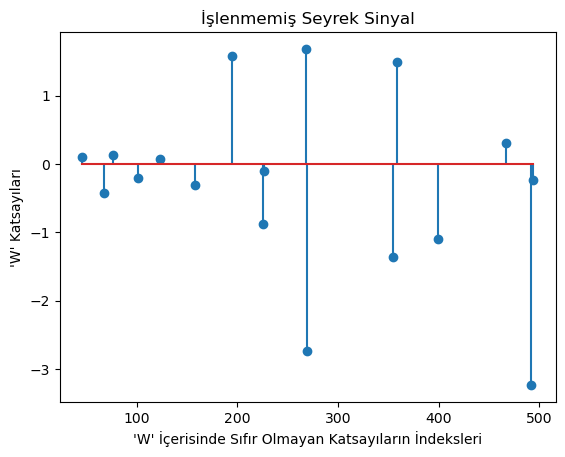

In [58]:
plt.stem(idx[0], w[idx])

plt.xlabel("'W' İçerisinde Sıfır Olmayan Katsayıların İndeksleri")
plt.ylabel("'W' Katsayıları")
plt.title("İşlenmemiş Seyrek Sinyal")

Yukarıda işlenmemiş seyrek sinyalleri görselleştirdik. Gürültüsüz geri kazanım (Noise Free Reconstruction) için değişken oluşturup Ortogonal Matching Pursuit algoritmasını kullanarak seyrek katsayıları tahmin edelim.

In [59]:
nfr = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs = nzero)
nfr.fit(X,y)
coef_nfr = nfr.coef_
idx_nfr = coef_nfr.nonzero()

Text(0.5, 1.0, 'Gürültüsüz Geri Kazanım')

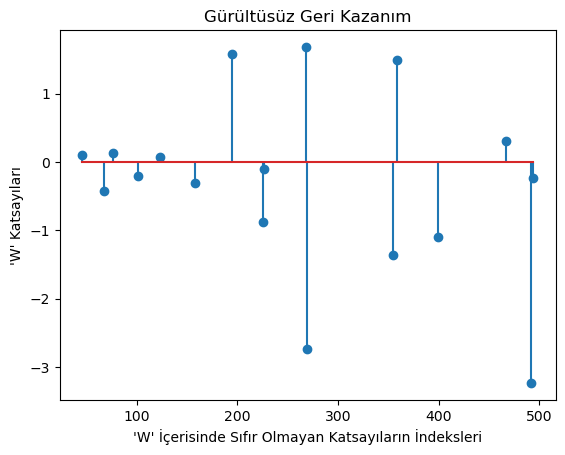

In [60]:
plt.stem(idx_nfr[0], coef_nfr[idx_nfr[0]])

plt.xlabel("'W' İçerisinde Sıfır Olmayan Katsayıların İndeksleri")
plt.ylabel("'W' Katsayıları")
plt.title("Gürültüsüz Geri Kazanım")

İlk resim ile ikinci resim arasında ne kadar büyük bir benzerlik olduğunu görüyoruz. Şimdi gürültülü veri üzerinde Orthogonal Matching Pursuit algoritmasını kullanarak geri kazanma işlemini gerçekleştirip sonucu görselleştirelim.

In [61]:
nfr_noise = linear_model.OrthogonalMatchingPursuit(n_nonzero_coefs = nzero)
nfr_noise.fit(X,y_noise)
coef_nfr_noise = nfr_noise.coef_
idx_nfr = coef_nfr_noise.nonzero()

Text(0.5, 1.0, 'Gürültüsüz Geri Kazanım')

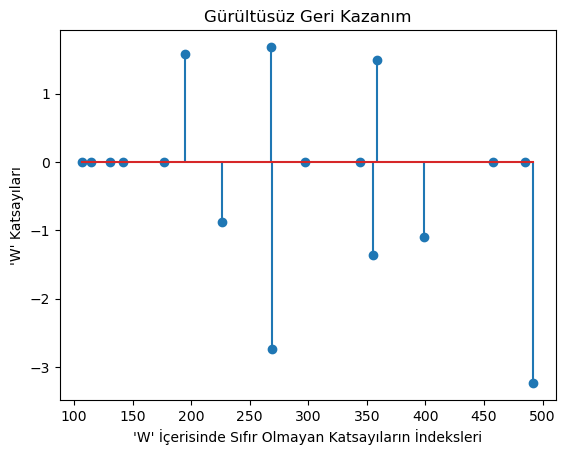

In [62]:
plt.stem(idx_nfr[0], coef_nfr[idx_nfr[0]])

plt.xlabel("'W' İçerisinde Sıfır Olmayan Katsayıların İndeksleri")
plt.ylabel("'W' Katsayıları")
plt.title("Gürültüsüz Geri Kazanım")

Gürültülü Geri Kazanım ile ilgili grafiğimizi elde ettik. Aynı işlem çapraz doğrulama kullanılarak aşağıda tekrar yapılmıştır.

In [63]:
nfr_noise = linear_model.OrthogonalMatchingPursuitCV()
nfr_noise.fit(X,y_noise)
coef_nfr_noise = nfr_noise.coef_
idx_nfr = coef_nfr_noise.nonzero()

Text(0.5, 1.0, 'Gürültüsüz Geri Kazanım (Çapraz Doğrulama)')

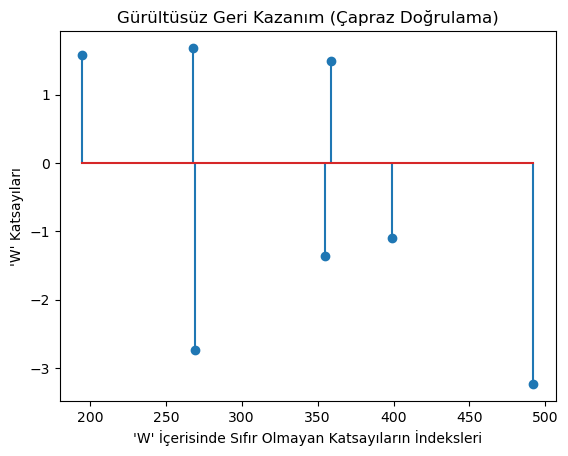

In [64]:
plt.stem(idx_nfr[0], coef_nfr[idx_nfr[0]])

plt.xlabel("'W' İçerisinde Sıfır Olmayan Katsayıların İndeksleri")
plt.ylabel("'W' Katsayıları")
plt.title("Gürültüsüz Geri Kazanım (Çapraz Doğrulama)")

## Bayessian Regression

Bayesian regresyon teknikleri, bir tahmin modelinin oluşturulması veya parametrelerinin tahmin edilmesi sırasında düzenleme parametrelerini kullanır. Bu parametreler, modelin aşırı uydurmaya veya aşırı basite indirgenmeye karşı dirençli olmasını sağlamak için kullanılır. Düzenleme parametresi, veriye özgü olarak belirlenir ve sert bir şekilde sabitlenmez. Bunun yerine, veri setine uygun bir şekilde ayarlanır. Bu, modele daha fazla esneklik kazandırır ve modelin genelleme yeteneğini artırır.

Bayessian regression, Bayes teoremini kullanarak tahmin yapar. İlk olarak, bir öncül dağılım belirlenir, bu da parametrelerin olası değerlerine ilişkin bir belirsizlik dağılımıdır. Ardından, mevcut verilerle birlikte Bayes teoremine dayalı olarak bu öncül dağılım güncellenir ve sonuç olarak bir sonuç dağılımı elde edilir. Bu sonuç dağılımı, parametrelerin olası değerlerini ve tahminlerin belirsizlik derecesini temsil eder.

Bayes Teoremi bir olasılık değerini, bildiğimiz diğer bazı olasılık değerlerini kullanarak hesaplama fikridir.

* $P(w|D)$ : $D$'nin koşulu altında $w$'nin gerçekleşme olasılığı
* $P(w)$ : $w$'nin olma olasılığı
* $P(D|w)$ : $w$'nin koşulu altında $D$'nin gerçekleşme olasılığı
* $P(D)$ : $D$'nin olma olasılığı

Yukarıdaki matematiksel notasyonda "$w$" parametreyi temsil ederken "$D$" gözlenen veriyi (observed data) temsil eder. 

Bayes teoreminde, "$w$" parametresinin, gözlenen "$D$" veri setine göre ne kadar olası olduğunu ifade eden "$P(w|D)$" posterior olasılığını elde etmek için kullanılır.

Bu denklemde paydada bulunan $P(D)$ normalizasyon sabitidir ve posterior dağılımını uygun bir olasılık yoğunluğu olarak kullanmamıza olanak tanır ve bize parametrelerin olasılığını yorumlama ve karşılaştırma yapma imkanı verir.

Bayes teoremini sözel olarak şu şekilde ifade edebiliriz:

$$\mathrm{posterior} \propto \mathrm{likelihood} \times \mathrm{prior}$$


* "posterior" (sonrasal): Aradığımız kestirimin sonucunda elde etmek istediğimiz olasılık dağılımını, gözlemlediğimiz verilere dayanarak belirli bir durumun olasılığını belirtir.

* "likelihood" (olasılık): Gözlenen verilere dayanarak belirli bir durumun gerçekleşme olasılığını ve parametrelerin veriye uyumunu belirtir.

* "prior" (öncül): Veri gözlemlenmeden önce parametrelerin olasılık dağılımını önceki bilgilerimize dayanarak parametrelerin ne kadar olası olduğunu ifade eder.

Tamamen olasılıksal bir model elde etmek için, $y$'nin $Xw$ ile tahmin edildiği ve bu tahminin Gauss dağılımına uyduğu varsayılır.

$$ p(y|x, w, \alpha) = \mathcal{N}(y|Xw, \alpha) $$

Yukarıda verilmiş olan Bayessian Regression formülündeki sembollerin açıklaması şu şekildedir:

| Sembol  | Açıklama                  |
|---------|---------------------------|
| $y$       | Çıktı / Hedef değişken     |
| $w$       | Parametre                  |
| $\alpha$  | Varyans Parametresi                       |
| $\mathcal{N}$       | Normal dağılım fonksiyonu            |
| $Xw$      | Ortalama                   |
| $p$       | Olasılık                   |


Burada $\alpha$ tekrar veriden tahmin edilmesi gereken bir rastgele değişken olarak kabul edilir.

**Bayesian Regresyonun avantajları:**

* Veriye uyarlanabilir.

* Tahmin sürecinde düzenleme parametrelerini dahil etmek için kullanılabilir.

**Bayesian regresyonun dezavantajları:**

* Modelin sonuçlarını elde etmek zaman alıcı olabilir.

### Bayessian Ridge Regression

Bayessian Ridge, yukarıda açıklandığı gibi regresyon problemi için olasılıksal bir model tahmin eder. $w$ için prior (öncül), küresel bir Gauss dağılımı tarafından verilir.

$$ P(w|\lambda) = \mathcal{N}(w|0, \lambda^{-1}I_p) $$


Yukarıda verilmiş olan Bayessian Ridge Regression formülündeki sembollerin açıklaması şu şekildedir:

| Sembol  | Açıklama                  |
|---------|---------------------------|
| $0$       | Zero Mean (sıfır ortalamalı)    |
| $w$       | Parametre                  |
| $\lambda$  | Varyans Parametresi                       |
| $\mathcal{N}$       | Normal dağılım fonksiyonu            |
| $p(w|\lambda)$      | Prior (Öncül)                  |
| $p$       | Olasılık                   |
| $I_p$       | Boyutu p olan birim matris                |

Alpha ve lambda üzerindeki öncül dağılımlar, Gauss'un hassasiyeti için conjugate prior (konjuge öncül) olarak bilinen gamma dağılımları olarak seçilir. Ortaya çıkan model, Bayesian Ridge Regresyonu olarak adlandırılır ve klasik Ridge'e benzer.

### Automatic Relevance Determination (ARD)

Automatic Relevance Determination (Otomatik İlişki Belirleme) yöntemi, Bayesian Ridge Regresyonu'na oldukça benzer ancak daha seyrek katsayılara yol açan bir tür doğrusal modeldir. 

Matematiksel notasyonu şu şekilde gösterilir:

$$ p(w|\lambda) = \mathcal{N}(w|0, A^{-1}) $$


Yukarıda verilmiş olan Automatic Relevance Determination formülündeki sembollerin açıklaması şu şekildedir:

| Sembol  | Açıklama                  |
|---------|---------------------------|
| $0$       | Zero Mean (sıfır ortalamalı)    |
| $w$       | Parametre                  |
| $\lambda$  | Varyans Parametresi                       |
| $\mathcal{N}$       | Normal dağılım fonksiyonu            |
| $p(w|\lambda)$      | Prior (Öncül)                  |
| $p$       | Olasılık                   |

> Yukarıda verilen Automatic Relevance Determination'a ait olan formül ve sembollerin Bayessian Ridge Regression'a ait olan formüllere ve sembollere ne kadar çok benzediği görülmektedir. Bu iki model arasındaki temel fark Automatic Relevance Determination'da her parametrenin ($w$) kendine ait bir standart sapması olmasıdır.

Aşağıda Bayesian Ridge ve Automatic Relevance Determination regresyon modellerinin tahminlerini, gerçek değerlerini, modelin uyumunu ve performansını karşılaştırabileceğimiz bir grafik oluşturmak için yazılmış bir kod örneği bulunmaktadır.

**Gerekli kütüphanelerin içe aktarılması**

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import ARDRegression, BayesianRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

**Veri setinin oluşturulması**

In [66]:
rng = np.random.RandomState(0)
n_samples = 110
X = np.sort(-10 * rng.rand(n_samples) + 10)
noise = rng.normal(0, 1, n_samples) * 1.35
y = np.sqrt(X) * np.sin(X) + noise
full_data = pd.DataFrame({"X / Girdi": X, "Y / Hedef": y})
X = X.reshape((-1, 1))

**Ekstrapolasyon için veri setinin oluşturulması**

In [67]:
X_plot = np.linspace(10, 10.4, 10)
y_plot = np.sqrt(X_plot) * np.sin(X_plot)
X_plot = np.concatenate((X, X_plot.reshape((-1, 1))))
y_plot = np.concatenate((y - noise, y_plot))

**Automatic Relevance Determination Regresyon Modelinin oluşturulması**

In [68]:
ard_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    ARDRegression(),
).fit(X, y)
y_ard = ard_poly.predict(X_plot)

**Bayesian Ridge Regresyon Modelinin oluşturulması**

In [69]:
brr_poly = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    StandardScaler(),
    BayesianRidge(),
).fit(X, y)
y_brr = brr_poly.predict(X_plot)

**Grafik Oluşturma**

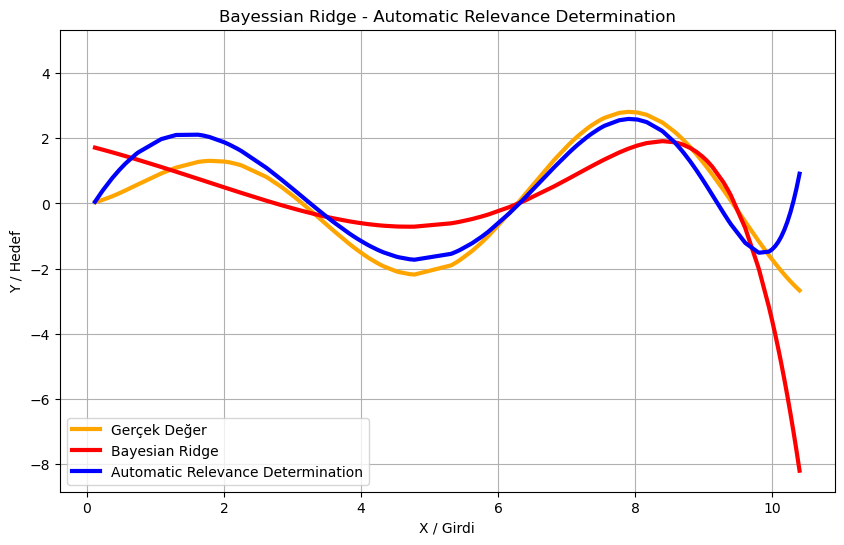

In [70]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(data=full_data, x="X / Girdi", y="Y / Hedef", color="black", alpha=1, visible=False)
ax.plot(X_plot, y_plot, color="orange",linewidth=3, label="Gerçek Değer")
ax.plot(X_plot, y_brr, color="red",linewidth=3, label="Bayesian Ridge")
ax.plot(X_plot, y_ard, color="blue",linewidth=3, label="Automatic Relevance Determination")
ax.legend()
ax.set_title("Bayessian Ridge - Automatic Relevance Determination")
ax.grid(True)
plt.show()

Oluşturulan bu grafikte orijinal veriler turuncu çizgi ile gösterilmiştir. Mavi çizgi Automatic Relevance Determination'a, kırmızı çizgi ise Bayesian Ridge Regression'a aittir. 

Grafikte de görülebileceği gibi bir noktaya kadar uyum konusunda oldukça iyi bir iş çıkarttıklarını söyleyebiliriz. X ölçeğinde yaklaşık olarak 10 değeri sonrasında gözle görülür bir farklılaşma mevcuttur. Bu bölgeden sonra kırmızı ve mavi çizgilerin gerçek değerden bu kadar fazla uzaklaşmasının ve uyumsuz olmasının sebebi modelin veri kümesinin dışındaki değerleri tahmin etmeye çalışıyor olmasıdır. Model veri kümesinin dışındaki değerleri tahmin ederken veri kümesinin içinden elde ettiği kalıpları kullanmaktadır.

Aşağıdaki örnekte Bayesian Ridge Regresyon, ARDRegression ve OLS modellerine ait, x ekseninde özellikler (x), y ekseninde ise bu özelliklere atanan ağırlıklar (w) bulunan grafik çizimi yapılmıştır

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import BayesianRidge, LinearRegression, ARDRegression
from sklearn.model_selection import train_test_split

np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features) 


lambda_ = 4.
w = np.zeros(n_features)

relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))

# Hassasiyeti 50 olan gürültü oluşturma
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)

y = np.dot(X, w) + noise

**Karşılaştırma için Bayesian Ridge Regresyon, ARDRegression ve OLS modellerini uydurma**

In [72]:
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ard = ARDRegression(compute_score=True)
ard.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

LinearRegression()

**Gerçek Değer grafiğini oluşturma**

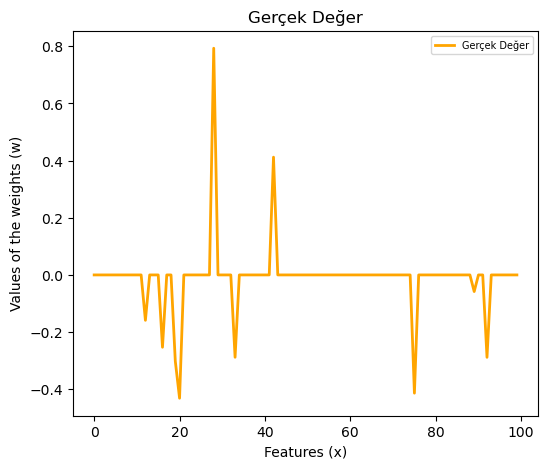

In [73]:
plt.figure(figsize=(6, 5))
plt.title("Gerçek Değer")
plt.plot(w, color='orange', linewidth=2, label="Gerçek Değer")
plt.xlabel("Features (x)")
plt.ylabel("Values of the weights (w)")
plt.legend(loc="best", prop=dict(size=7))
plt.savefig("ground_truth.png")
plt.show()

**Ordinary Least Squares (En Küçük Kareler) grafiğini oluşturma**

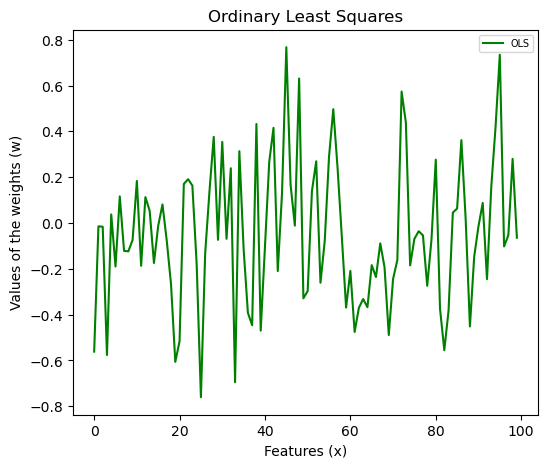

In [74]:
plt.figure(figsize=(6, 5))
plt.title("Ordinary Least Squares")
plt.plot(ols.coef_, color='green', label="OLS")
plt.xlabel("Features (x)")
plt.ylabel("Values of the weights (w)")
plt.legend(loc="best", prop=dict(size=7))
plt.savefig("ols.png")
plt.show()

Ordinary Least Squares'e ait olan grafiğine bakıldığında varyasyonun ne kadar fazla olduğu göze çarpmaktadır. Özelliklere(x) ait olan ağırlıkların(w) yukarı ve aşağı yaptığı hareketler oldukça istikrarsızdır

**Bayesian Ridge grafiğini oluşturma**

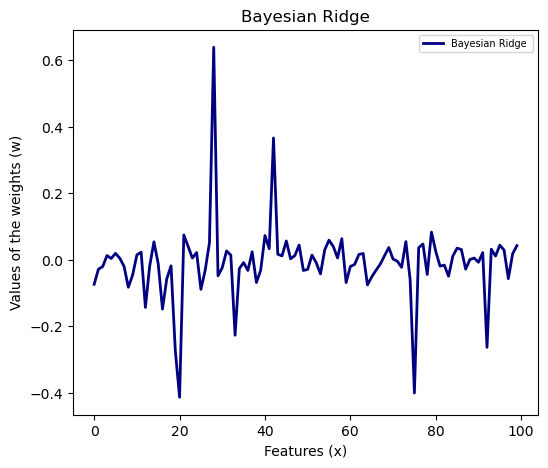

In [75]:
plt.figure(figsize=(6, 5))
plt.title("Bayesian Ridge")
plt.plot(clf.coef_, color='navy', linewidth=2, label="Bayesian Ridge ")
plt.xlabel("Features (x)")
plt.ylabel("Values of the weights (w)")
plt.legend(loc="best", prop=dict(size=7))
plt.savefig("bayesian_ridge.png")
plt.show()

Bayesian Ridge'e ait olan grafik Ordinary Least Squares'e ait olan grafik ile karşılaştırıldığında çok daha stabil olarak nitelendirilebilir, dalgalanmalar Ordinary Least Squares'e kıyasla oldukça küçüktür.

**Automatic Relevance Determination grafiğini oluşturma**

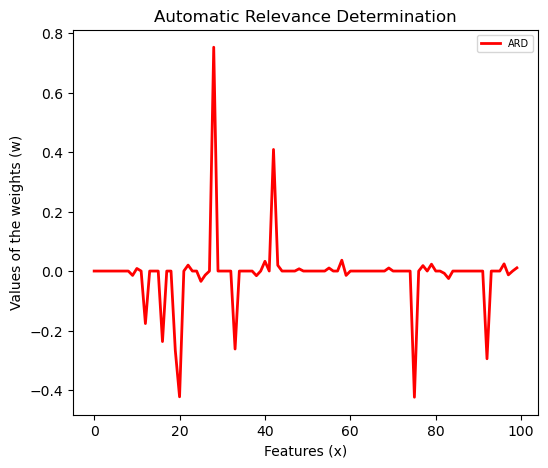

In [76]:
plt.figure(figsize=(6, 5))
plt.title("Automatic Relevance Determination")
plt.plot(ard.coef_, color='red', linewidth=2, label="ARD")
plt.xlabel("Features (x)")
plt.ylabel("Values of the weights (w)")
plt.legend(loc="best", prop=dict(size=7))
plt.savefig("ard_estimate.png")
plt.show()

Automatic Relevance Determination'a ait olan grafik Bayesian Ridge grafiği ile karşılaştırıldığında, katsayılarının sıfıra çok daha yakın olduğu söylenebilir. Buna ek olarak kesinlikle Ordinary Least Squares'ten daha stabil olduğu görülmektedir.

**Dört grafiğin üst üste bindirilmiş şekilde gösterilmesi**

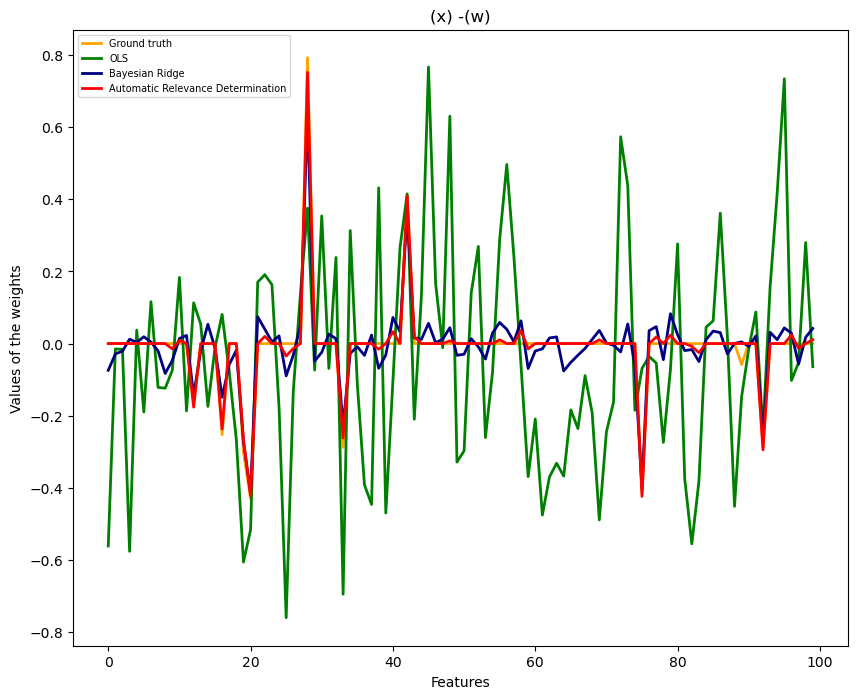

In [77]:
plt.figure(figsize=(10, 8))
plt.title("(x) -(w)")
plt.plot(w, color='orange', linewidth=2, label="Ground truth")
plt.plot(ols.coef_, color='green', linewidth=2, label="OLS")
plt.plot(clf.coef_, color='navy', linewidth=2, label="Bayesian Ridge")
plt.plot(ard.coef_, color='red', linewidth=2, label="Automatic Relevance Determination")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=7))
plt.savefig("weight_estimates.png")
plt.show()

Modellerin üst üste bindirildiği yukarıdaki grafik incelendiğinde Ordinary Least Squares'in aralarındaki en kararsız model olduğu görülmektedir. Buna ek olarak Automatic Relevance Determination'a doğru gittikçe kararlılığın arttığı söylenebilir.

Aşağıda Lineer Regresyon, Bayesian Ridge ve Automatic Relevance Determinaton modelleri kullanılarak tahminleme yapan, devamında ise grafik üzerinde görselleştiren bir örnek bulunmaktadır. Bu örnekte modeller arasındaki farklar incelenmektedir.

**Gerekli kütüphanelerin içe aktarılması**

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

**Veri setinin oluşturulması (İki farklı veri seti kullanılmıştır. Bunlardan birincisi "Diabetes Dataset", ikincisi ise farklılıkları daha rahat gösterebilmek için elle oluşturulmuş bir veri setidir.)**

In [79]:
data = datasets.load_diabetes()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

**Lineer Regresyon modelinin kullanılması**

In [80]:
ols = linear_model.LinearRegression()
ols.fit(x_train,y_train)
ols_pred = ols.predict(x_test)

ols_score = metrics.mean_squared_error(y_test, ols_pred)
print("Coef:",ols.coef_.round(2))
print("score(MSE):", ols_score)

Coef: [  36.04 -296.98  522.69  305.36 -302.09  109.06 -192.09   85.13  555.34
   92.68]
score(MSE): 3018.0936958274715


**Bayesian Ridge modelinin kullanılması**

In [81]:
byr = linear_model.BayesianRidge()
byr.fit(x_train,y_train)
byr_pred = byr.predict(x_test)

byr_score = metrics.mean_squared_error(y_test, byr_pred)
print("Coef:",byr.coef_.round(2))
print("score(MSE):", byr_score)

Coef: [  38.15 -279.36  509.8   297.55  -82.4   -72.15 -255.95   97.88  450.89
   99.74]
score(MSE): 3035.8659143848845


Yukarıdaki iki kod bloğu da aynı veri seti üzerinde sırasıyla Lineer Regresyon ve Bayesian Ridge modellerini kullanarak tahminleme yapar. Çıktıda gözüken "Coef:" iki modelin de katsayılarını(w) göstermektedir. "score(MSE)" ise her bir modelin ortalama karesel hata (Mean Squared Error) skorlarını göstermektedir. MSE'nin daha düşük değerde olması model açısından daha olumludur.

Yukarıdaki iki çıktıyı incelendiğinde Bayesian Ridge'e ait olan ortalama karesel hata(MSE) değerinin daha yüksek olduğu görülmektedir. İki modele ait olan "Coef" değerlerine baktığımızda ise Bayesian Ridge modeline ait olan katsayıların, Lineer Regresyon'a ait olan katsayılara göre daha düşük olma eğiliminde olduğu görülmektedir.



**Automatic Relevance Determination modelinin kullanılması**

In [82]:
ard = linear_model.ARDRegression()
ard.fit(x_train,y_train)
ard_pred = ard.predict(x_test)

ard_score = metrics.mean_squared_error(y_test, ard_pred)
print("Coef:",ard.coef_.round(2))
print("score(MSE):", ard_score)

Coef: [   0.   -266.64  528.23  303.7   -66.67   -0.   -302.64    0.    499.23
   42.71]
score(MSE): 3008.8278584997656


Automatic Relevance Detection ile Bayesian Ridge arasındaki çıktı farklarına bakıldığında, Automatic Relevance Determination'a ait olan katsayıların bazılarının sıfır olduğu görülmektedir. Automatic Relevance Detection ile Bayesian Ridge arasındaki fark ARD modelinde katsayıların sıfıra yakın olabilme olasılığıdır. Bu, modelin otomatik olarak bazı özellikleri dikkate almadığını veya düşük ağırlık değerlerine sahip olduğunu gösterir.

**Grafik oluşturma**

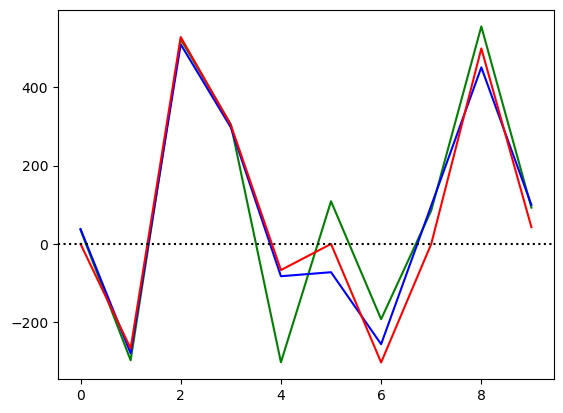

In [83]:
plt.plot(range(len(ols.coef_)),ols.coef_, color="green")
plt.plot(range(len(byr.coef_)),byr.coef_, color="blue")
plt.plot(range(len(ard.coef_)),ard.coef_, color="red")

plt.axhline(0, linestyle="dotted", color ="black")
plt.show()

Yukarıdaki grafik Automatic Relevance Determination yönteminin Ordinary Least Squares'e kıyasla katsayılarının sıfıra daha yakın olduğunu net bir şekilde göstermiyor. Bunun sebebi modelin çok az sayıda katsayıya sahip olmasıdır. Yani, verilen çizelge veya grafik katsayıların bu farkı göstermek için yeterince açıklayıcı değildir. Bunu değiştirmek için aynı örnekte ikinci bir veri seti kullanılmıştır.

**İkinci veri setinin oluşturulması**

In [84]:
x_train = np.random.randn(100,100)
y_train = np.sum(x_train, axis=1) * np.random.randn(100)

x_test = np.random.randn(50,100)
y_test = np.sum(x_test, axis=1) * np.random.randn(50)

Rastgele oluşturulmuş veri seti üzerinde tekrar Lineer Regresyon, Bayesian Ridge ve Automatic Relevance Determination modelleri kullanılmıştır

**Lineer Regresyon modelinin kullanılması**

In [85]:
ols = linear_model.LinearRegression()
ols.fit(x_train,y_train)
ols_pred = ols.predict(x_test)

ols_score = metrics.mean_squared_error(y_test, ols_pred)
print("Coef:",ols.coef_.round(2))
print("score(MSE):", ols_score)

Coef: [-1.961e+01 -1.023e+01 -1.605e+01 -4.920e+00 -1.457e+01  1.994e+01
  2.240e+00 -5.470e+00 -4.780e+00  1.087e+01 -1.170e+01  3.000e+00
  1.977e+01 -1.694e+01  4.990e+00 -2.490e+00  1.848e+01  7.610e+00
 -1.002e+01  9.100e+00 -1.734e+01 -1.643e+01  2.989e+01 -6.860e+00
 -1.631e+01  1.940e+01  1.543e+01  2.022e+01  8.100e-01  2.574e+01
  1.207e+01 -9.200e-01  1.183e+01  5.200e-01  2.417e+01  3.498e+01
  4.116e+01  1.102e+01  6.410e+00  5.340e+00 -4.510e+00 -7.100e-01
 -1.193e+01 -2.640e+00 -2.718e+01 -1.471e+01 -3.246e+01  1.040e+01
 -1.777e+01 -8.500e+00 -8.590e+00  1.136e+01  1.630e+00  2.793e+01
 -2.630e+01 -6.130e+00 -1.087e+01  8.600e-01 -1.800e+00  1.758e+01
  5.390e+00  1.086e+01  1.330e+00  7.120e+00  2.816e+01 -2.500e+00
 -4.591e+01  1.861e+01 -3.050e+00  6.980e+00 -9.020e+00  1.010e+00
  3.500e+00 -5.580e+00 -3.260e+01  2.883e+01 -2.320e+01  1.142e+01
 -2.000e-02 -1.824e+01  3.440e+00 -3.542e+01 -1.020e+00  7.080e+00
  1.000e-01 -3.741e+01  1.585e+01 -1.146e+01  3.238e+01 

**Bayesian Ridge modelinin kullanılması**

In [86]:
byr = linear_model.BayesianRidge()
byr.fit(x_train,y_train)
byr_pred = byr.predict(x_test)

byr_score = metrics.mean_squared_error(y_test, byr_pred)
print("Coef:",byr.coef_.round(2))
print("score(MSE):", byr_score)

Coef: [-0.  0. -0.  0. -0. -0. -0.  0.  0. -0. -0.  0. -0. -0. -0.  0. -0.  0.
 -0.  0.  0.  0.  0. -0. -0. -0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.
 -0. -0.  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0. -0.  0. -0.  0.  0.
 -0. -0. -0. -0.  0. -0.  0. -0. -0.  0.  0.  0.  0.  0. -0.  0.  0. -0.
 -0. -0. -0.  0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
  0. -0. -0. -0.  0.  0. -0. -0. -0. -0.]
score(MSE): 123.48574296249666


Bayesian Ridge modelini yeni oluşturulan veri seti ile tekrar çalıştırdığımızda birçok katsayısının sıfıra döndüğü görülmektedir.

**Automatic Relevance Determination modelinin kullanılması**

In [87]:
ard = linear_model.ARDRegression()
ard.fit(x_train,y_train)
ard_pred = ard.predict(x_test)

ard_score = metrics.mean_squared_error(y_test, ard_pred)
print("Coef:",ard.coef_.round(2))
print("score(MSE):", ard_score)

Coef: [-3.75  1.32 -0.94  0.    0.   -0.   -0.   -0.    0.   -0.    0.    0.23
 -0.   -0.77 -0.    0.    0.    1.65 -2.69  1.02  0.    0.    0.71  0.
 -0.    1.41  0.71  1.04 -0.    0.    0.35 -0.   -0.   -1.43 -0.48  1.74
 -1.8   0.    1.52  0.   -0.    0.   -0.    0.    0.   -4.84 -1.86 -0.
 -0.   -0.32  0.   -0.03  1.1  -0.09 -0.   -0.    0.   -1.06  0.    0.
  0.    0.   -0.    0.05  0.    2.31  0.    1.01 -0.    0.    1.57 -0.01
 -0.   -0.   -3.68 -0.64 -0.   -0.    0.   -0.   -0.   -0.   -0.    0.96
 -2.12  0.   -3.72  0.   -0.   -0.    0.   -2.15  0.   -0.   -0.    0.72
 -2.17  0.   -1.48 -0.  ]
score(MSE): 235.7540144921529


**Grafik oluşturma**

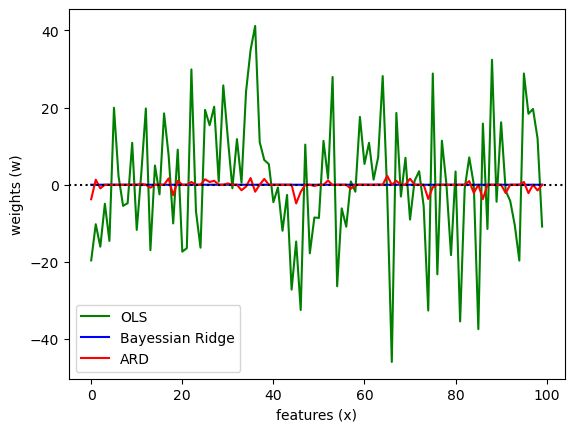

In [88]:
plt.plot(range(len(ols.coef_)),ols.coef_, color="green", label="OLS")
plt.plot(range(len(byr.coef_)),byr.coef_, color="blue", label="Bayessian Ridge")
plt.plot(range(len(ard.coef_)),ard.coef_, color="red", label="ARD")


plt.xlabel("features (x)")
plt.ylabel("weights (w)")
plt.axhline(0, linestyle="dotted", color ="black")
plt.legend()
plt.show()

Yukarıdaki grafikte ikinci veri seti ile yeniden çalıştırılan üç modelin katsayı değerleri görülmektedir. Ordinary Least Squares'e ait çizgilerin varyasyonunun ne kadar fazla olduğu göze çarpmaktadır. Bayessian Ridge ve Automatic Relevance Determination'a ait olan değerler neredeyse görülememektedir. Daha iyi bir görünüm elde etmek için Ordinary Least Squares'e kıyasla daha küçük bir aralığa sahip olan Bayesian Ridge ve Automatic Relevance Determination modellerinin yalnızca ikisinin görüldüğü grafik aşağıda verilmiştir.

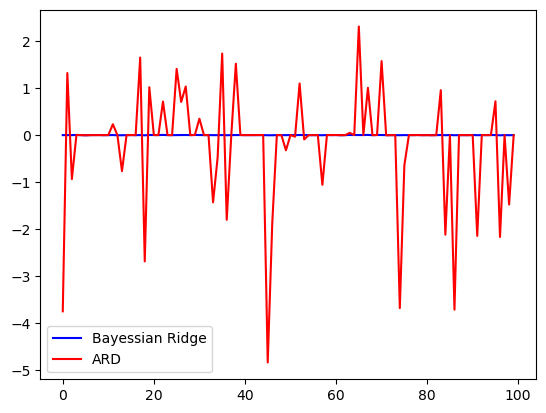

In [89]:
plt.plot(range(len(byr.coef_)),byr.coef_, color="blue", label="Bayessian Ridge")
plt.plot(range(len(ard.coef_)),ard.coef_, color="red", label = "ARD")

plt.legend()
plt.show()

Yukarıdaki grafikte görülebileceği gibi Bayessian Ridge'e ait olan değerler neredeyse görülemeyecek kadar küçüktür. Bunun sebebi bu örnekte katsayılarının birçoğunun sıfıra oldukça yakın olmasıdır.

**Katsayıların dağılımlarını görebilmek için histogram şeklinde gösterelim**

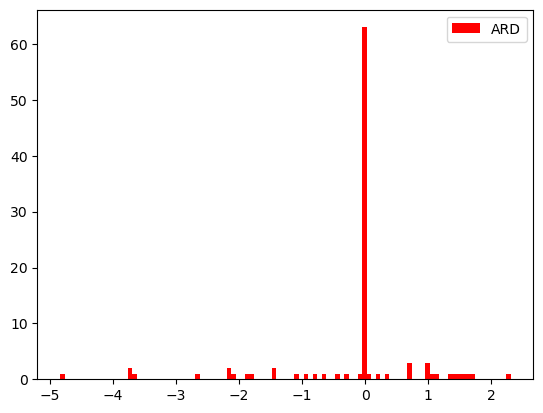

In [90]:
plt.hist(ard.coef_, bins=len(ard.coef_), color="red",label="ARD")
plt.legend()
plt.show()

Yine aynı şekilde Ordinary Least Squares'e ait olan grafiğin diğer iki modele kıyasla çok daha büyük bir aralıkta gösterilmesi gerektiğinden dolayı yalnızca Automatic Relevance Determination modeline ait olan histogram yukarıda gösterilmiştir.

Automatic Relevance Determination'a ait katsayılarının çoğunluğunun sıfır olduğu görülmektedir.

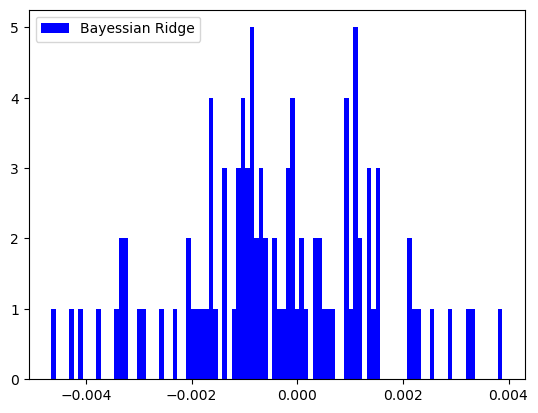

In [91]:
plt.hist(byr.coef_, bins=len(byr.coef_), color="blue",label="Bayessian Ridge")
plt.legend()
plt.show()

Yukarıda gösterilen Bayessian Ridge'e ait grafikte, diğer iki modelden farklı olarak katsayı aralığının düşüklüğü göze çarpmaktadır.

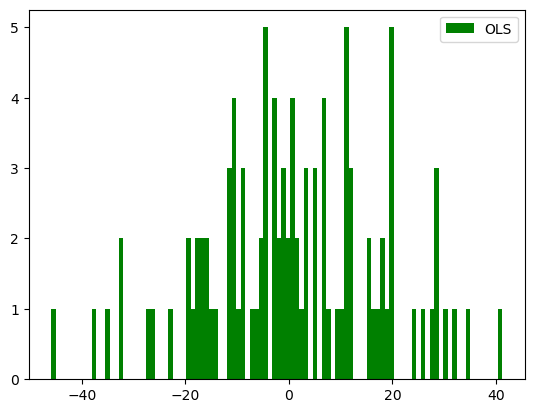

In [92]:
plt.hist(ols.coef_, bins=len(ols.coef_),color="green", label="OLS")
plt.legend()
plt.show()

Yukarıda katsayıları gösterilmiş olan Ordinary Least Squares'e ait olan grafikteki aralığın diğer iki modele kıyasla çok daha büyük olduğu görülmektedir

## Logistic Regression

### Classification

"Classification" yani "Sınıflandırma" problemi regresyon problemine benzer, ancak tahmin etmek istediğimiz $y$ değerleri sadece birkaç farklı değer alır.$y$'nin yalnızca iki değer alabildiği (0 ve 1) durumlar ikili sınıflandırma olarak nitelendirilmektedir. 

Örneğin, e-posta için bir istenmeyen posta (spam) sınıflandırıcısı oluşturmaya çalışıyorsak, $x^i$ ($i$'nci $x$) değeri e-postanın bazı özellikleri olabilir ve $y$, eğer e-posta istenmeyen posta (spam) ise 1 olacak, aksi halde 0 olacaktır. 

0 ayrıca negatif sınıf olarak adlandırılırken, 1 pozitif sınıf olarak adlandırılır ve bazen semboller " - " ve " + " ile de gösterilebilir. Verilen $x^i$ için, buna karşılık gelen $y^i$ eğitim örneğinin etiketi olarak da adlandırılır. Bu durum "Binary Classification" olarak adlandırılmaktadır, gösterimi şu şekildedir:

$$y \in \{0,1\}$$


Aşağıdaki örnekte bir veri seti oluşturulmuş ve bu veri setinin görselleştirmesi üzerinde anlatılmıştır

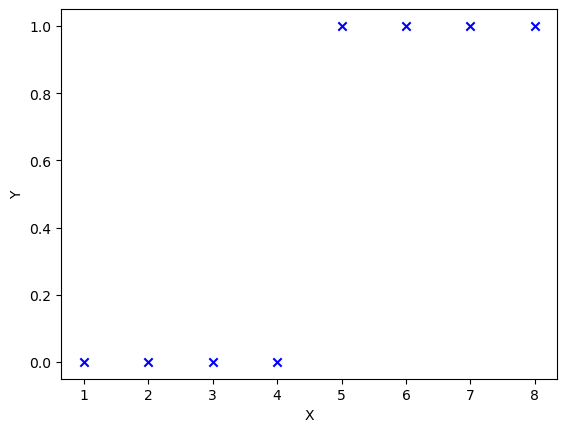

In [93]:
import matplotlib.pyplot as plt

x_values = [0, 0, 0, 0, 1, 1, 1, 1]
y_values = [1, 2, 3, 4, 5, 6, 7, 8]

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(y_values, x_values, marker='x', alpha=1, color ="blue")

plt.show()

Elimizde 0 ve 1 değerlerinden oluşan, yukarıdaki şekilde görselleştirilmiş bir veri setinin bulunduğunu varsayalım. Bu veri setine Lineer Regresyon modelini uygulayalım.

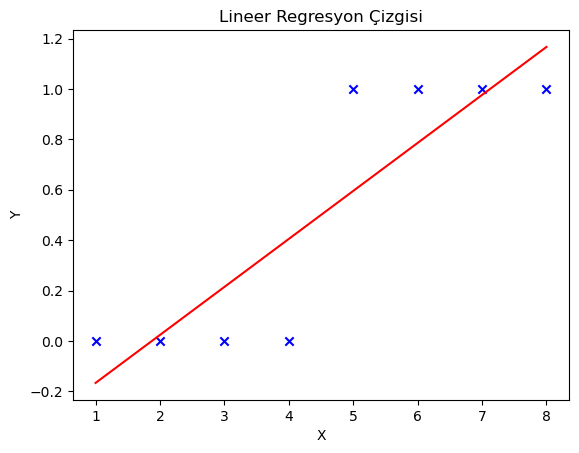

In [94]:
plt.scatter(y_values, x_values, marker='x', alpha=1, color="blue")

coefficients = np.polyfit(y_values, x_values, 1)
poly = np.poly1d(coefficients)

plt.plot(y_values, poly(y_values), color="red")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Lineer Regresyon Çizgisi')

plt.show()


Yukarıda oluşturulan ve görselleştirilen veri setine Lineer Regresyon modeli uygulanmış ve Lineer Regresyon çizgisi görselleştirilmiştir. Görselden de anlaşılacağı üzere bu veri setine Lineer Regresyon modelini uygulamak pek iyi bir fikir değildir. Yukarıdaki şekilde modelin ne olduğu gözle görülür şekilde bellidir. Varsayımsal olarak 4.5 değerini seçersek, modelin solundaki değerler 0, sağındaki değerler ise 1 değerine sahiptir.

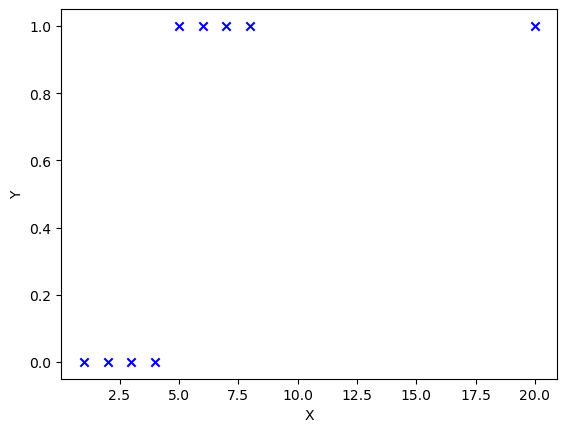

In [95]:
import matplotlib.pyplot as plt

x_values = [0, 0, 0, 0, 1, 1, 1, 1, 1]
y_values = [1, 2, 3, 4, 5, 6, 7, 8, 20]

plt.xlabel("X")
plt.ylabel("Y")
plt.scatter(y_values, x_values, marker='x', alpha=1, color ="blue")

plt.show()

Veri setine bir adet daha örnek ekleyerek değiştirdiğimizi varsayalım.

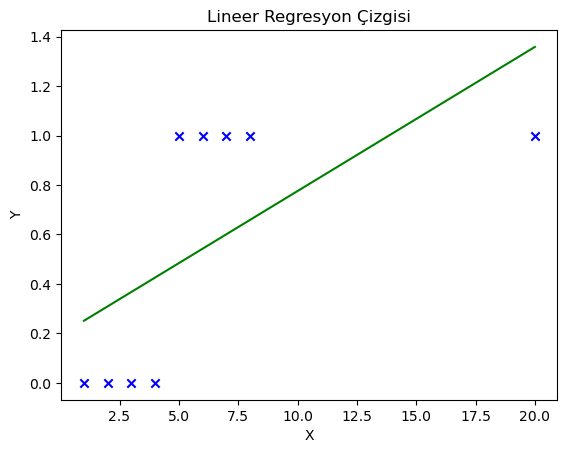

In [96]:
plt.scatter(y_values, x_values, marker='x', alpha=1, color="blue")

coefficients = np.polyfit(y_values, x_values, 1)
poly = np.poly1d(coefficients)

plt.plot(y_values, poly(y_values), color="green")
plt.xlabel("X")
plt.ylabel("Y")
plt.title('Lineer Regresyon Çizgisi')

plt.show()

Model hala basit şekilde anlaşılmaktadır. Varsayımsal noktanın solunda 0 değerleri bulunurken sağında 1 değerleri bulunmaktadır. Outlier (Aykırı Değer) olarak etiketleyecek bir durum bulunmamaktadır.

Bu veri setine eklenen veri seti ile bir model çizgisi çizildiğinde yukarıdaki şekilde gösterildiği gibi bir çizgi elde edilmektedir. Elde ettiğimiz iki adet Lineer Regresyon çizgisini üst üste bindirdiğimizde şu şekli elde etmekteyiz:

![Çizgi](ÇizgiKarşılaştırma.png)

Gösterilen iki Lineer Regresyon çizgisi çok farklı karar sınırları belirlemektedir ve çıktıları yüksek derecede farklı olmaktadır. Bu sebeple Lineer Regresyon modeli, sınıflandırma problemleri için iyi bir model değildir.

**Sınıflandırma problemlerinde en sık kullanılan model ise Logistic Regression modelidir.**

Bir Logistic Regression algoritmasında istenen şey hipotezin ($h_\theta(x)$) 0 ile 1 değerleri arasında olmasıdır

$$ h_\theta(x) \in [0,1] $$

Bu gösterimde köşeli parantez 0'dan 1'e kadar olan tüm gerçek sayıların kümesidir.

$$ h(x) = g(\theta^{\mathrm{T}} x) = \frac{1}{1 + e^{-\theta^{\mathrm{T}} x}} $$

Şimdi $g(z)$ şeklinde gözüken bir fonksiyon tanımlayalım

$$ g(z) = \frac{1}{1 + e^{-z}} $$


Yukarıda tanımlanan fonksiyona "Sigmoid" veya "Logistic" fonksiyon adı verilir. Aşağıda ilk olarak bu fonksiyonun şeklini çizdiren kod verilmiş, devamında ise bu şekil üzerinden anlatım yapılmıştır.

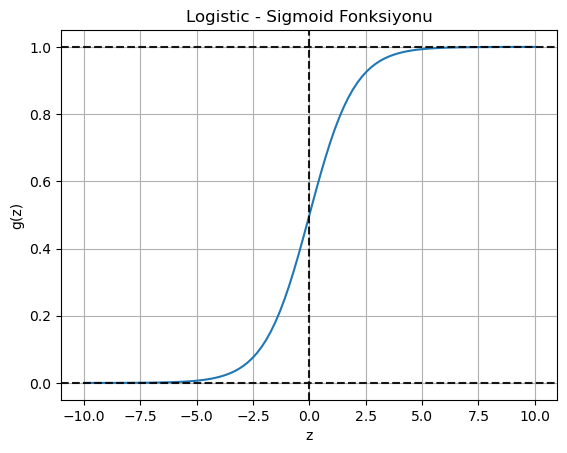

In [97]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.linspace(-10, 10, 100)
y = sigmoid(x)

plt.plot(x, y)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic - Sigmoid Fonksiyonu')
plt.grid(True)
plt.axhline(y=0, color='k', linestyle='dashed', alpha=0.9)
plt.axvline(x=0, color='k', linestyle='dashed', alpha=0.9)
plt.axhline(y=1, color='k', linestyle='dashed', alpha=0.9)
plt.show()

Yukarıda grafiği çizdirilen $g(z)$ fonksiyonunda çizgiz $x$ eksenini 0 noktasında $y=0.5$ değerinde kesmektedir. Grafik 0 değerine çok yakın bir noktadan başlamaktadır ve yükselerek 1 değerine doğru asimptot olmaktadır. Kısaca Sigmoid fonksiyon, değeri $-\infty$'dan $\infty$'a kadar 0 ile 1 arasına sıkıştırır.

Böylece $g(z)$ fonksiyonunun değerleri 0 ve 1 arasında olmaktadır.

Daha önce Lineer Regresyon konusunda hipotez için şu notasyon gösterilmişti:

$$ h_\theta(x) = \theta^{\mathrm{T}}x $$

Yukarıda verilmiş olan $\theta^{\mathrm{T}}x$ değeri 0'dan küçük veya 1'den büyük bir değer alabilmektedir. Bu değerler sınıflandırma problemleri için sorun teşkil eden değerlerdir.

**Logistic Regression buradaki $\theta^{\mathrm{T}}x$ değerini alır ve Sigmoid Fonksiyonundan geçirir, böylece çıkış değerlerinin 0 ile 1 arasında olmasını sağlar.**

Konunun daha detaylı anlatılabilmesi için $\theta$ ile parametreleştirilmiş $x$ hakkında bazı varsayımlar yapalım. Bir tümör tespit eden modelde 1 çıktısı tümörün kötü huylu olduğunu tahmin ederken, 0 çıktısı tümörün iyi huylu olduğunu tahmin etmektedir.

$$P(y=1|x;\theta) = h_\theta x$$

Yukarıda $y=1$ durumunun tümörün kötü huylu olma durumu, x değerinin tümörün boyutu ($\theta$ tarafından parametreleştirilmiş) olarak varsayabileceğimiz bir özellik (feature) olarak kabul edebiliriz. Bu durum hipotez çıktısına eşittir, yani özellikleri girmek ve bu tümörün kötü huylu olma ihtimalinin ne olduğunu söylemektir.

$$P(y=0|x;\theta) = 1 - h_\theta x$$

y = 0 durumunda ise tümörün iyi huylu olma durumu ele alınmıştır. $1 - h_\theta x$ olarak verilmesinin sebebi değerlerin yalnızca 0 ve 1 olabilme ihtimalidir ve varsayımsal olarak %70 ihtimalle kötü huylu olduğu öne sürülürse, iyi huylu olma ihtimalinin %30 değerini almak zorunda olmasıdır, çünkü bu iki olasılığın olma ihtimallerinin toplamı 1 olmalıdır.

Bu iki denklemi tek denklem içerisinde yazabiliriz, ortaya ise şu denklem çıkmaktadır:

$$ P(y|x;\theta) = h_\theta(x)^y \cdot (1 - h_\theta(x))^{1-y} $$


Yukarıdaki denklemde y değerinin alabileceği yalnızca 0 ve 1 değerleri bulunmaktadır. 0 değerini alırsa $h_\theta x$, 1 değerini alırsa $(1 - h_\theta(x))$ değeri, üsleri 0 olacağından dolayı 1 değerini almakta ve denklemden çıkmaktadır. Böylece yalnızca uygun olan denklem kalmaktadır.

### Perceptron

Perceptron sınıflandırma problemlerini çözmek için kullanılan bir makine öğrenmesi algoritmasıdır. Öncelikle belirtilmelidir ki Perceptron pratikte yaygın olarak kullanılmamaktadır. Genellikle tarihsel sebeplerle incelenmektedir, buna ek olarak ise anlaşılırlığı ve analiz edilebilirliği kolaydır.

Logistic Regression'da "Sigmoid" adı verilen fonksiyonun kullanıldığı gösterilmişti:  $$ g(z) = \frac{1}{1 + e^{-z}} $$


Perceptron Algoritması bu fonksiyona çok benzemektedir, ancak temelde farklıdır. Perceptron Algoritması'na ait fonksiyonu şu şekilde gösterebiliriz:

$$
g(z) = \begin{cases}
    1, &  z \geq 0 \\
    0, & z < 0
\end{cases}
$$


Bu denklemi görselleştirelim:

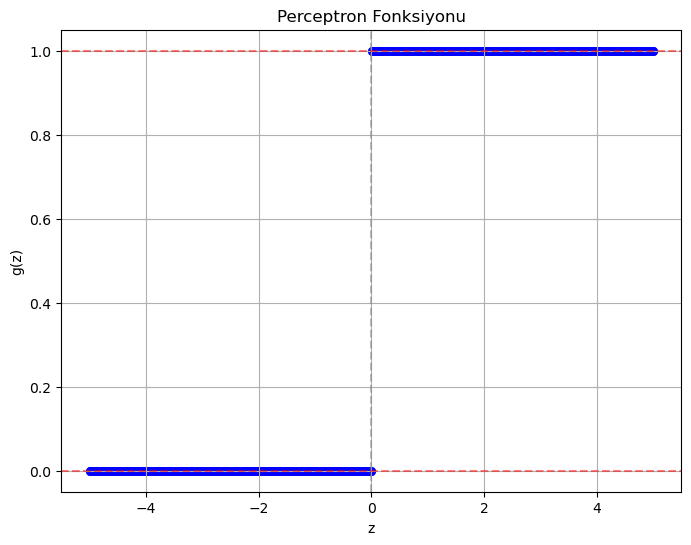

In [98]:
import numpy as np
import matplotlib.pyplot as plt

def g(z):
    return 1 if z >= 0 else 0

Z = np.linspace(-5, 5, 1000)

Y = np.array([g(z) for z in Z])

plt.figure(figsize=(8, 6))

Z_pos = Z[Y == 1]
Z_neg = Z[Y == 0]

plt.scatter(Z_pos, np.ones_like(Z_pos), color='blue', label='g(z) = 1', s=30)
plt.scatter(Z_neg, np.zeros_like(Z_neg), color='blue', label='g(z) = 0', s=30)
plt.axhline(1, color='red', linestyle='--', alpha=0.5)
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.axvline(0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Perceptron Fonksiyonu')

plt.grid(True)
plt.show()

Perceptron Fonksiyonu'nda oluşabilecek değer aralığı ve değerlere bakıldığında Sigmoid fonksiyonu ile olan benzerlik görülmektedir. Bu grafiği ve denklemi daha iyi anlayabilmek için hipotez fonksiyonunu yazalım ve inceleyelim.

$$ h(x) = g(\theta^{\mathrm{T}}x)$$

Yukarıdaki formülde yer alan $\theta$'nın parametre olduğunu, $x$'in input olduğunu biliyoruz. $h(x)$ değeri ise $\theta^{\mathrm{T}}x$ değerinin sıfırdan küçüklüğüne ve büyüklüğüne bağlı olarak 0 veya 1' e eşittir.

Logistic Regression'da anlatıldığı üzere tüm değerlerin gösterimini tek denklemde toplamak istersek:
$$  g(\theta^{\mathrm{T}}x)= h(x) = g(z) = \frac{1}{1 + e^{-z}} $$
denklemi elde edilmektedir. Perceptron'a ait olan update rule (Güncelleme Kuralı) formülünü yazarsak:

$$ \theta_j := \theta_j + \alpha  (y^{(i)} - h_\theta(x^{(i)}))  x_j^{(i)} $$

 Logistic Regression ve Perceptron'un güncelleme kuralları aynı gözükmektedir, aralarındaki temel fark $h_\theta(x)$'in iki farklı senaryoda farklı şeyler ifade etmesidir. Bu benzerliğe Lineer Regresyon'a ait denklemin de eklendiği görülebilir. Bunun sebebi üç kavramın da sahip olduğu ortak temadır.

Perceptron Algoritma'sını daha iyi anlayabilmek için bu denklemi incelediğimizde  $(y^{(i)} - h_\theta(x^{(i)})$ bölümünün skaler olduğu görülmektedir. İlk kısmı incelersek 0 ve 1 değerlerini alabilen $y^{(i)}$, ikinci kısmı incelersek yine 0 ve 1 değerlerini alabilen $h_\theta(x)^{(i)}$ tahmini görülmektedir.

Algoritma verilen bir $x$ değeri için $h_\theta(x)^{(i)}$ tahmini yaptığında $(y^{(i)} - h_\theta(x^{(i)})$ bölümü üç farklı sonuç verebilmektedir. Bu sonuçları şu şekilde gösterebiliriz:

| Koşul   |     Değer |
|-------|------------------------|
| Algoritmada hata yoksa    | 0          |
| Algoritmada hata varsa ve $(y)^{(i)}$ = 1 ise | +1                  |
| Algoritmada hata varsa ve $(y)^{(i)}$ = 0 ise| -1               |

Verilen denklemi ve koşullara göre değişen durumları daha iyi anlayabilmek adına verilerden oluşan ve algoritmanın çalışma şeklini görselleştiren bir görseli inceleyelim.

![Perceptron](geogebra1.png)

Elimizde iki farklı sınıf bulunduğunu varsayalım. Bunlardan ilki kırmızı üçgenlerle temsil edilmiş, 0 çıktısı olarak varsayabileceğimiz sınıf, ikinci sınıf ise mavi dairelerle temsil edilmiş, 1 çıktısı olarak varsayabileceğimiz sınıftır. Algoritmanın karar sınırı olarak belirlediği doğru $\theta^{\mathrm{T}}x = 0$ olarak temsil ediliyor. Bu karar sınırının üzerinde kalan her şey $\theta^{\mathrm{T}}x > 0$, bu karar sınırının altında kalan her şey ise $\theta^{\mathrm{T}}x < 0$ olarak temsil edilmektedir. 

Algoritmanın her seferinde bir örnek öğrendiğini ve yeni bir örneğin eklendiğini ve yeni gelen bu örneğin mavi daire sınıfına ait olduğunu varsayalım.

![Perceptron2](geogebra2.png)

Yeni eklenen örneğin karar sınırının altında kaldığı ve aslında algoritmanın yeni eklenen örneğin sınıfını yanlış tahmin ettiğini görebiliriz. Şimdi algoritmanın çalışma mantığını görebilmek ve bu çalışma mantığının anlatımının daha anlaşılır olması için bu grafiğe ait olan doğrudaki $\theta^{\mathrm{T}}x = 0$ ,$\theta^{\mathrm{T}}x > 0$ ve $\theta^{\mathrm{T}}x < 0$ değerlerini, ve bu değerlere ait olan ok işaretlerini grafikten çıkaralım.   

![Perceptron3](geogebra3.png)

Yukarıdaki görselde eski karar sınırına dik olacak şekilde çekilmiş $\theta$, ve yeni değere doğru çekilmiş $x$ doğrusu görülmektedir. Yeni eklenen değerin karar sınırının altında kaldığını ve bu sebeple yanlış sınıflandırıldığını söylemiştik. Güncelleme kuralı ile beraber yapılan adımı tekrar inceleyelim.

$$ \theta_j := \theta_j + \alpha  (y^{(i)} - h_\theta(x^{(i)}))  x_j^{(i)} $$

Görseli denkleme uyarladığımızda $(y^{(i)} - h_\theta(x^{(i)})$ durumu +1 değerinde olacaktır. Bunun sonucunda ise Algoritma $\theta$'nın değerini $\theta + \alpha x$ olarak güncelleyecektir. (Formülde yer alan  " := " işareti, bir sonraki adımda bu işaretin solunda kalan kısmın, sağında kalan kısma eşitleneceğini göstermektedir. Buna örnek olarak yazılımda sıkça kullanılan "x = x+1" gösterilebilir.) 

$\alpha$ küçük bir öğrenme oranıdır. $\alpha x$ vektörü görselde yeşil renkle çizilmiş ve bu vektör $\theta$ değerine eklenmiştir. Elde edilen vektör ise yine yeşil renkle gösterilmiş olan $\theta^{'}$ vektörü olmaktadır.

Elde edilen $\theta^{'}$ vektörüne dik olan yeni karar sınırı ise çizgili şekilde yeşil renkle gösterilmiştir. Algoritma karar sınırını yeni eklenen veriye göre değiştirmiş ve tekrardan tüm sınıfların doğru tahmin edildiği bir karar sınırı elde etmiştir. Bu karar sınırının üzerinde kalan değerler 1, altında kalan değerler ise 0 olarak gösterilmiş sınıfları temsil etmektedir.

#### Peki neden Perceptron pratik olarak kullanılmıyor? 

Perceptron'un girişinde pratikte yaygın olarak kullanılmadığını söylemiştik. Bunun sebebini anlamak için öncelikle tarihte biraz geriye gidelim. Perceptron, ilk defa 1957 yılında Cornell Üniversitesi'nden Dr. Frank Rosenblatt tarafından "The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain" (Perceptron: Beyinde Bilgi Depolama ve Organizasyon İçin Bir Olasılıksal Model) başlıklı makalesi ile tanıtılmıştır. İnsanların Perceptron'un iyi bir model olduğunu düşündüğü bir süre boyunca yaygın olarak kullanıldı, ancak çok geçmeden Perceptron'ların bazı sınıfları tanıyabilecek şekilde eğitilemediği ortaya çıktı. Özellikle 1969 yılında yayımlanan Marvin Minsky ve Seymour Papert'ın "Perceptrons: an Introduction to Computational Geometry (Perceptrons: Bilgisayarlı Geometriye Giriş)" kitabı pratikte kullanımını son derece azaltan bir etki yarattı. Aşağıda Perceptron'un tanımakta zorluk çektiği ve son derece basit bir veri setinin görselleştirilmiş hali bulunmaktadır.

![PerceptronSon](Perceptron4Veri.png)

Perceptron Algoritması yukarıda gösterilen basit bir sınıflandırma probleminin dahi çözümünde zorlanmaktadır. Bu sebeple pratikte yaygın olarak kullanılmamaktadır. 

#### Softmax Regression

Yukarıdaki örneklerde ve anlatımlarda iki adet sınıftan bahsedildi, peki ikiden fazla sınıf mevcutsa ne yapılmaktadır? Çoklu Sınıf Lojistik Regresyon olarak da bilinen Softmax Regression, ikiden fazla sınıf olduğunda lojistik regresyonu genelleştirmek için kullanılmaktadır.

Aşağıda ikiden fazla veri sınıfı bulunduran bir görsel verilmiş ve bu görsel üzerinden anlatım yapılmıştır.

![softmax](softmax.png)

Yukarıdaki şekilde 5 adet x şeklinde mavi, 5 adet üçgen şeklinde turuncu ve 5 adet daire şeklinde yeşil renkli veri bulunmaktadır. Bu veri seti 3 farklı sınıfa ayrılmıştır. İkiden fazla sınıf bulunduran veri setlerinde amaç yeni eklenen noktanın, bu sınıflardan hangisine ait olduğunu doğru şekilde tahminleyebilmektir. 

Örnek olarak bu veri setine hangi sınıfa ait olduğunu bilmediğimiz bir adet veri ekleyelim.

![softmax2](softmax2.png)

Veri setine hangi sınıfa ait olduğunu bilmediğimiz siyah renkli veriyi ekledik. Yapmamız gereken şey bu noktanın yeşil daire, turuncu üçgen veya mavi x sınıflarından hangisine ait olduğunu tahmin etmek. Tabii ki görselleştirmenin ve anlatımın daha kolay olması adına 3 adet sınıf örneği verilmiş de olsa gerçek hayattaki çalışmalarda binlerce sınıftan oluşan veri setleri ile çalışılabilmektedir.

$$ \text{Label y} = [{0,1}]^k -> [0,0,1,0]$$ 

Yukarıda gösterilmiş olan $[0,0,1,0]$ notasyonu One-Hot Vector olarak adlandırılmaktadır. One-Hot Vector, verileri temsil etmek için kullanılan bir vektör tipidir. One-Hot Vector, tüm elemanları sıfır olan bir vektördür, ancak yalnızca bir elemanı 1 (veya True) olarak gösterilir. Bu gösterilmiş olan 1, veri noktasının ait olduğu sınıfı temsil ederken diğer elemanlar sıfır olarak gösterilmektedir.

Örneğin, yukarıda verilmiş olan 3 sınıftan oluşan sınıflandırma probleminde şekilleri daire, üçgen ve x gibi üç sınıfa ayırmak istediğinizi düşünelim. Her bir şekli temsil etmek için One-Hot Vector kullanabilirsiniz:

* Daire = $[1,0,0]$
* Üçgen = $[0,1,0]$
* X = $[0,0,1]$

Softmax Regresyon'unda her sınıf kendi parametresine sahiptir, bunu bir matris olarak göstermek gerekirse:

$$
\begin{bmatrix}
\theta_{c1}\\
\theta_{c2} \\
\theta_{c3}\\
\end{bmatrix}
$$

Softmax Regresyonu'ndaki parametreleri, K = Sınıf sayısı, $Kx1$'lik bir matris şeklinde gösterebiliriz. Aslında bu gösterim, sınıf başına bir dizi parametreye sahip olunan Logistic Regression gösteriminin bir genellemesidir.

Her bir sınıfa karşılık gelen parametreler kullanıldığında, eklenen verinin sınıflandırılması ile alakalı aşağıdaki gibi bir görsel elde edilir: 

![softmax3](softmax3classes.png)

Her sınıf için farklı parametre olduğunu görüyoruz $(\theta_{c1},\theta_{c2},\theta_{c3})$. Yeni eklenmiş olan siyah daire verisinin sınıflandırılması için gerekli olan adımları gösterirsek:

![softmax4](softmax4.png)

Verinin sınıflandırması için yapılan 3 adım görselde verilmiştir, sırasıyla üç adımın yaptıkları:

* Adım 1: İlk adımda, eklenmiş yeni veri açısından 3 sınıf için $\theta_c^Tx$ değerinin pozitif ve negatif olabileceği gözükmektedir. Yeni eklenen veri, yeşil daireler için çizilmiş olan kesikli yeşil çizginin $\theta_c^Tx$ > 0 kısmında olduğundan dolayı bu değer pozitiftir. Bu adımda gözüken değerlerin reel sayılar olduğu unutulmamalıdır, 0 ile 1 arasındaki sıkışma bu değerler için geçerli değildir. $-\infty$ ile $+\infty$ arasında değer alabilmektedir. Bu uzay aynı zamanda "Logit Space" olarak da adlandırılmaktadır.

> Not: Adım 1 ile Adım 2 arasındaki amacımız, var olan sınıflar üzerinde bir olasılık dağılımı elde etmektir.

* Adım 2: İkinci adımda elde etmek istediğimiz olasılık dağılımı $exp^{\theta_c^Tx}$ şeklinde yazılmıştır. Bu, tüm değerlere pozitif olma gerekliliği getirmiştir.
* Adım 3: Adım 2'de elde edilen değerlere normalize (Normalizasyon) yapılmıştır. Bu adımda elde ettiğimiz olasılık çıktısına $\hat{P}(y)$ adını verelim.

Yukarıdaki adımlar sonucunde eklenen bir veriye bahedilen adımlar uygulandı ve aşağıda gösterilmiş olan hangi sınıfa ait olabileceği ile ilgili bir olasılık çıktısı elde edildi. Elde ettiğimiz $\hat{P}(y)$ için hipotez diyebiliriz. 3 sınıf bulunan bu sınıflandırma probleminde hipotez fonksiyonu bir olasılık çıktısı verdi. 2 sınıf içeren diğer problemlerde hipotez çıktısının skaler bir değer veya olasılık değeri olduğunu görmüştük.

Şimdi eklenen verinin gerçek değerinin bir yeşil daire olduğunu varsayalım.

![softmax5](softmax5.png)

Eklenen yeni verinin gerçek değerinin 

* Daire = 1
* Üçgen = 0
* X = 0

olduğu görülmektedir. Aslında bu değerler One-Hot Vector'u temsil etmektedir. One-Hot Vector'leri yazarken, Daire sınıfı için "Daire = $[1,0,0]$" gösterimini yapmıştık. Bu adımdan sonra yapılması gereken tek şey elde edilen olasılık dağılımı ile $P(y)$ arasındaki mesafeyi en aza indirmektir.

---

| Cezalar                               | 'lbfgs' | 'liblinear' | 'newton-cg' | 'newton-cholesky' | 'sag' | 'saga' |
|---------------------------------------|---------|-------------|-------------|-------------------|-------|--------|
| Çok Sınıflı + L2                      | evet    | hayır       | evet        | hayır             | evet  | evet   |
| OVR + L2                              | evet    | evet        | evet        | evet              | evet  | evet   |
| Çok Sınıflı + L1                      | hayır   | hayır       | hayır       | hayır             | hayır | evet   |
| OVR + L1                              | hayır   | evet        | hayır       | hayır             | hayır | evet   |
| Elastic-Net                           | hayır   | hayır       | hayır       | hayır             | hayır | evet   |
| Cezasız                      | evet    | hayır       | evet        | evet              | evet  | evet   |
| Kesişim Cezalandır            | hayır   | evet        | hayır       | hayır             | hayır | hayır |
| Büyük Veri İçin Hızlı                 | hayır   | hayır       | hayır       | hayır             | evet  | evet   |
| Ölçeklenmemiş Verilere Karşı Dayanıklı | evet   | evet        | evet        | evet             | hayır | hayır |


İlk olarak tablodaki solverlara, devamında ise cezalara bakalım:

**Solverlar**

* "liblinear" Solver koordinat inişi (coordinate descent) algoritmasını kullanır ve scikit-learn ile birlikte gelen C++ dilinde yazılmış LIBLINEAR kütüphanesini kullanır ancak, gerçek bir çok sınıflı (multiclass) model öğrenemez. Bunun yerine "one-vs-rest" şeklinde optimizasyon problemi çözerek tüm sınıflar için ayrı ikili sınıflandırıcılar oluşturur ve oluşturduğu bu sınıflandırıcıları eğitir. Bu işlem arka planda gerçekleşir, bu nedenle Logistic Regression örnekleri çok sınıflı sınıflandırıcılar olarak kullanılır.
 
* "lbfgs", "newton-cg" ve "sag" Solverları: Bu solverlar sadece düzenlileştirmeyi destekler veya düzenlileştirilmeden çalışır. Bazı durumlarda yüksek boyutlu veriler için daha hızlı yakınsarlar. Bu solverlar ile "multi_class" parametresini "multinomial" olarak ayarlamak, gerçek bir çok kategorik lojistik regresyon modeli öğrenir. Bundan dolayı varsayılan "one-vs-rest" ayarına göre oluşturulan modelden daha iyi kalibre edilmiş olabilir.

* "sag" Solverı: Bu solver, Stokastik Ortalama Gradyan inişini kullanır, örnek sayısı ve özellik sayısı büyük veri kümeleri için diğer solverlardan daha hızlıdır.

*  "saga" Solverı: "sag" solverının bir varyasyonudur ve non-smooth (Her noktada tanımlı türeve sahip) düzenlemesi olan "l1" cezasını destekler. Bu nedenle seyrek çok sınımlı lojistik regresyon için tercih edilir. Aynı zamanda "elasticnet" cezasını destekleyen tek solverdır.

* "lbfgs" Solverı: Broyden–Fletcher–Goldfarb–Shanno algoritmasını yaklaşık olarak uygulayan bir optimizasyon algoritmasıdır. Bundan dolayı çeşitli eğitim verileri ile başa çıkabilir. Bu özelliği sebebiyle default (varsayılan) solverdır. Kötü ölçeklenmiş veri kümelerinde ve nadir kategorilere sahip one-hot kodlu kategorik özelliklere sahip veri kümelerinde performansı düşüktür.

* "newton-cholesky" Solverı: Hessian matrisini hesaplayarak ve elde edilen lineer sistemini çözerek tam olarak bir Newton solveridir. n_samples >> n_features durumları için çok iyi bir seçimdir, ancak birkaç eksikliği vardır: Sadece regularizasyonu destekler. Ayrıca, hessian matrisi açıkça hesaplandığından, bellek kullanımı n_features ve n_classes'e kare bağımlılığı vardır. Bu nedenle, çok sınıflı durum için sadece "one-vs-rest" şeması uygulanır.

**Cezalar**

* "Çok Sınıflı + L2": Bu senaryo, çok sınıflı lojistik regresyon için L2 düzenlemesini temsil eder. Bu düzenleyici, modelin katsayılarını sıfıra yaklaştırarak dengelemeyi sağlar ve gereksiz özelliklerin etkisini azaltır.

* "OVR + L2": "One-vs-Rest" stratejisi ile çok sınıflı lojistik regresyon için L2 düzenlemesi kullanılır. Her bir sınıf diğerlerinden farklı bir ikili sınıflandırma problemine dönüştürülür ve L2 düzenlemesi uygulanır.

* "Çok Sınıflı + L1": Çok sınıflı lojistik regresyon için L1 düzenlemesini ifade eder. Bu düzenleyici, katsayıları sıfıra yaklaştırarak özellik seçimi yapar.

* "OVR + L1": "One-vs-Rest" metodu ile çok sınıflı lojistik regresyon için L1 düzenlemesi kullanılır. Her bir sınıf diğerlerinden farklı bir ikili sınıflandırma problemine dönüştürülür ve L1 düzenlemesi uygulanır.

* "Elastic-Net": L1 ve L2 düzenlemelerinin karışımı olan "elasticnet" düzenlemesini temsil eder. Hem özellik seçimi hem de düzenlemeyi sağlar.

* "Cezasız ('none')": Düzenleme yapılmadan doğrudan lojistik regresyon uygulanır.

* "Kesişim Cezalandır (olumsuz)": Bu senaryo, modelin kesişim terimini cezalandırmamasını ifade eder. Bu genellikle düşük performansa yol açabilir.

* "Büyük Veri İçin Hızlı": Büyük veri kümeleri için hızlı yakınsayan algoritmalar kullanılır.

* "Ölçeklenmemiş Verilere Karşı Dayanıklı": Ölçeklenmemiş veri kümeleri için sağlam algoritmalar kullanılır ve verilerin ölçeklendirilmesini gerektirmez.

### Generalized Lineer Models

#### Exponential Family

Aşağıdaki formül Generalized Lineer Models (Genelleştirilmiş Lineer Modeller) içerisinde kullanılan bir PDF'i (Probobality Density Function (Olasılık Yoğunluk Fonksiyonu)) ifade eder ve bağımlı değişkenin belirli bir değeri için olasılığın nasıl hesaplandığını gösterir.

$$ p(y; \eta) = b(y) \exp(\eta^T T(y) - a(\eta)) $$



Bu formül içerisindeki değişkenleri ayrı ayrı ele alalım ve açıklayalım:

* $y$ = Data (Input / Girdi)
* $\eta$ = Natural Parameter (Dağılımın Parametresi)
* $T(y)$ = Sufficiant Statistic (Yeterli İstatistik) 
* $b(y)$ = Base Measure (Yalnızca $y$'nin fonksiyonu)
* $a(\eta)$ = log - partition (Yalnızca $\eta$ ve sabitlerin fonksiyonu)

Buraya kadar olan anlatımın tamamında data için $x$ değişkenini kullanmıştık, burada ise $y$ kullanılmıştır. Bunun sebebi verinin çıktısını modellemek için Exponential Family kullanılıyor olmasıdır, yani kısaca $y$ bu olasılık dağılımının modellemeye çalıştığı veridir.

$T(y)$ olarak gösterilmiş olan Yeterli istatistik, bir veri kümesindeki tüm bilgileri belirli bir parametre hakkında çıkarmak için yeterli olan bir istatistiksel özelliğe işaret eder. Bu istatistik, veri kümesinin tamamını değil, sadece belirli bir parametre hakkındaki bilgileri içeren ve veri analizinde ile parametre tahmininde önemli bir rol oynayan bir kavramdır. Bu hesaplamalar boyunca $T(y) = y$ olarak hesaplama yapılacak ve $T(y)$ görülen yerlere basitleştirmek adına $y$  yazılabilecektir.

Bir dağılımın Exponential Family'e dahil olup olmadığını anlamak için, dağılımın PDF'ini yazmak ve cebirsel değişimlerle genelleşmiş formül haline getirebilmektir. Örnek olarak Bernoulli Distribution'ı (Bernoulli Dağılımı) kullanalım ve bu dağılımın Exponential Family içerisinde olup olmadığını görelim:, Bernoulli Dağılımı'ndan kısaca bahsetmek gerekirse, Bernoulli Dağılımı ikili verileri (binary data) modellemek için kullanılmakta olan dağılımdır.

**Bernoulli Distribution**

Sahip olduğu parametreye $\phi$ diyelim ve $\phi$ olayın olup olmama olasılığını temsil etsin. Şimdi Bernoulli Dağılımı'nın PDF'ini yazalım:

$$p(y;\phi) = \phi^{y}(1-\phi)^{(1-y)}$$

Yukarıdaki PDF'te bulunan $\phi^{y}(1-\phi)^{(1-y)}$ kısmı, bir nevi programlama mantığında kullanılan if-else yapısının matematiksel gösterimidir. $y=1$ durumunda elimizde yalnızca $\phi$ değeri kalacak, $y=0$ durumunda ise elimizde yalnızca $(1-\phi)$ değeri kalacaktır. Bu dağılımın Exponential Family'ye dahil olduğunu gösterebilmek için yapmamız gereken, yukarıda verilmiş olan PDF'e cebirsel müdahalelerde bulunarak Exponential Family'nin ana formuna çevirmektir.


$$\exp(\log(\phi^{y}(1-\phi)^{(1-y)}))$$

Bu çevrimlerde kullanılan yaygın tekniklerden bir tanesi, formu birbirlerini zaten nötrlemekte olan "exp" ve "log" parantezine almaktır. Şimdi yukarıdaki ifadeye eşit olacak şekilde biraz daha cebirsel manipülasyon yapalım.

$$\exp[\log(\frac{{1-\phi}}{\phi}y) + \log(1-\phi)]$$


Elde ettiğimiz ifadeyi, Exponential Family'e ait PDF ile parça parça karşılaştıralım:

* $$b(y) = 1$$
* $$ \log(\frac{{1-\phi}}{\phi}) = \eta => \phi = \frac{1}{1 + e^{-\eta}}$$ 
* $$y = T(y)$$
* $$a(\eta)= -\log(1-\phi) => -\log \frac{1}{1 - e^{-\eta}} = \log(1+e^{\eta})$$ 

Bernoulli'ye ait ifade içerisinde $b(y)$ terimi bulunmadığı için $b(y) = 1$ olarak alınmıştır. İfadeleri eşleştirdiğimizde ortaya çıkan eşleşmenin uyumluluğu görülmektedir. Bu eşleştirme Bernoulli Dağılımı'nın Exponential Family üyesi olduğunu kanıtlamaktadır. Şimdi aynı örneği bir de Gaussian Distribution için yapalım:

**Gaussian Distribution**

Gaussian Distribution (Gaussian Dağılımı), adları Mean (ortalama) ve Variance (varyans) olmak üzere iki parametreye sahiptir. Hesaplamalarda kolaylık adına varyansın sabit ve bu varyansın değerinin 1 olduğunu ($\sigma^2 = 1$) varsayacağız. Gaussian'a ait olan PDF'i yazalım:

$$ p(y;\mu) = \frac{1}{\sqrt{2\pi}} \exp(-\frac{(y-\mu)^2}{2})$$


Yukarıda verilmiş olan Gaussian Dağılımı'na ait PDF verilmiştir, bu fonksiyonda varyans 1 kabul edilmiştir. Şimdi cebirsel manipülasyon ile aşağıdaki ifadeye çevirelim:

$$\frac{1}{2\pi} \left( e^{-\frac{y^2}{2}} \right) \exp\left( \mu y - \frac{1}{2} \mu^2 \right)$$


Şimdi tekrar ilk alıştırmada yaptığımız gibi, elde ettiğimiz ifadeyi Exponential Family'e ait olan PDF ile eşleştirelim ve Gaussian Dağılımı'nın Exponential Family grubuna dahil olup olmadığını anlayalım:

* $$b(y) = \frac{1}{2\pi} \exp( e^{-\frac{y^2}{2}})$$
* $$T(y) = y$$
* $$\eta = \mu$$
* $$a(\eta) = \frac{\mu^2}{2} = \frac{\eta}{2}$$

Gaussian Distribution'ın da Exponential Family içerisinde bulunduğunu göstermiş olduk. Unutulmamalıdır ki verilen örnekte hesaplamaların basitliği açısından sabit varyans kullanılmıştır. Varyansın bilinmediği durumlarda $n$ bir skaler olmaktan çıkıp bir vektör haline gelecektir ve $n_1$, $n_2$ gibi iki değere sahip olacaktır. 

Yalnızca Bernoulli ve Gaussian hakkında örnek yapmış da olsak Exponential Family'e dahil olan başka dağılımlar da mevcut. Sahip olunan veri türüne ve çözülmesi amaçlanan soruna bağlı olarak bu dağılımlardan bir tanesi seçilir. Örnek vermek gerekirse, bir regresyon problemimiz varsa Gaussian seçmek, sınıflandırma problemine sahipsek Bernoulli seçmek mantıklıdır. Sahip olunan veri türüne göre seçilebilecek Exponential Family üyeleri aşağıdaki tabloda gösterilmiş ve açıklanmıştır:

| Veri     | Dağılım         |
|----------|-----------------|
| Real     | Gaussian        |
| Binary   | Bernoulli       |
| Count    | Poisson         |
| $R^+$     | Gamma / Exponential |

Yukarıda verilmiş tabloyu sözel olarak açıklamak gerekirse, $-\infty'dan +\infty$'a kadar olan sayılardan oluşan bir veri setine sahipsek Gaussian Distribution kullanmak mantıklıdır. Count olarak belirtilen veri türünün Real'den farkı ise Count'un negatif olmayan tamsayılardan oluşmasıdır. Bir nesnenin hacmi, gerçekleşen bir olayın zamanı gibi veriler mevcutsa Gamma Distribution veya Exponential Distribution kullanılabilir. Burada belirtilmiş olan Exponential Distribution ile Exponential Family bazen karıştırılmaktadır. Exponential Distribution, tıpkı diğer dağılımlar gibi Exponential Family olarak adlandırılan sınıfın bir üyesidir.

Exponential Family içerisinde bulunan diğer dağılımlar ve bu dağılımların açıklamaları şu şekildedir:

* Poisson Dağılımı: Poisson dağılımı, olayların nadir olduğu, bağımsız olarak meydana geldiği ve bir zaman aralığında ortalaması sabit olan olayların sayısını modellemek için kullanılır. Örneğin, bir saat içinde gelen e-posta sayısı gibi. Poisson dağılımı, sadece pozitif tamsayıları kabul eder, 

* Gamma Dağılımı: : Gamma dağılımı, pozitif ve çarpık (eğri) verilere sahip değişkenleri modellemek için kullanılır. Gamma dağılımının kullanım alanlarına bir elektronik cihazın kullanım süresi, bir parçanın dayanıklılığı veya bir ürünün arızalanma süresi gibi ömür boyu değerlendirme durumları verilebilir. Gamma dağılımı, sadece pozitif reel sayıları kabul eder.

* Inverse Gaussian veya Tweedie Ailesi: Eğer hedef değerleriniz Gamma dağılımından daha ağır kuyruklu (heavy-tailed) gibi görünüyorsa, Inverse Gaussian dağılımını veya daha yüksek varyanslı Tweedie ailesini deneyebilirsiniz. Bu durumda, daha ağır kuyruklu olan dağılımların daha iyi bir uyum sağlayabileceği göz önünde bulundurulmalıdır. Bu kullanıma örnek olarak istenmeyen finansal harcama durumları verilebilir.
 
Doğru dağılımı seçmek hedef değerlerin ve veri setinin özelliklerine bağlıdır. Her dağılımın kendine özgü kullanım alanları vardır ve uygun olanı seçmek, daha iyi sonuçlar elde etmek için önemlidir.

Genelleştirilmiş Lineer Modeller (Generalized Linear Models - GLMs), istatistiksel analiz ve makine öğrenmesinde sıkça kullanılan bir sınıflandırma ve regresyon yöntemidir. Exponential Family'den uygun bir ifade seçerek ve onu lineer bir modele bağlayarak güçlü modeller oluşturabiliriz. Genelleştirilmiş Lineer Modeller $y$ tahminlemesi yapmayı hedefler ve aşağıdaki 3 adet varsayıma dayanmaktadır:

* $$ y|x ; \theta \sim Exponential Family (\eta) $$
* $$\eta = \theta^T x \quad \text{where} \quad \theta \in \mathbb{R}^n, x \in \mathbb{R}^n$$
> Bu varsayımda yer alan $\mathbb{R}^n$ ifadesi sahip olunan verinin boyutlarıdır.
* $$h_\theta(x) = E[y|x;\theta]$$ 

Bahsedilen işlemleri görselleştirelim ve bu görsel üzerinden anlatalım.

![glm](glm.png)

Yukarıdaki görselde bulunan dikdörtgen Lineer Modelleri temsil etmekte, daire ise dağılımları temsil etmektedir. Görselde $x$ (input), öğrenebilir bir parametre olan $\theta^{\mathrm{T}}x$, yeni parametre $n$ ve Exponential Family üyesi olan dağılımlar bulunmaktadır.

**Bu dağılımın parametresi, lineer modelin çıktısıdır**

Test zamanında sahip olunan verilere göre Exponential Family üyesi bir dağılım seçilir ve bahsedilen $b$, $a$ ve $T$ değerler seçilir. Bunun devamında ise $y$ tahmini elde edilir ve hipotez oluşturulur. 

Eğitim süresinde ise $\theta$ üzerinde Gradient Descent yapılmaktadır. Unutulmamalıdır ki $n$ verilmiş bir değerden ziyade bir fonksiyonun çıktısıdır. $\theta$ ise  Gradient Descent ile öğrenilmiş parametredir. 

Eğitim zamanında hangi dağılım seçilmiş olursa olsun Learning Update Rule (Öğrenme Güncelleme Kuralı) aynıdır:

$$ \theta_j := \theta_j + \alpha(y^i - h_\theta^{(x^i)})x_j^i $$

Bu güncelleme kuralına, yapılan dağılım seçimine bağlı olarak uygun $h_\theta(x)$ girilir ve öğrenime başlanır. Gerek regresyon problemi, gerek sınıflandırma problemi, gerekse de Poisson regresyonu kullanılacak olsun, güncelleme kuralı tüm seçenekler için sabittir. Yalnızca hipotez değiştirilir ve kurala uygulanır.

GLM'ler verileri modellemenin genel bir yoludur. Bu veriler her türden olabilir. Bu tür verileri modelleyebilen ve Exponential Family için uygun bir dağılım olduğu sürece Genelleştirilmiş Lineer Modeller'e entegre edilebilir. 

> Logistic Regression ve Ordinary Least Squares, genelleştirilmiş doğrusal modellerin spesifik durumları olarak kabul edilir.

Iris veri setini kullanarak Logistic Regression ile ilgili örnek yapalım:

**Gerekli Kütüphanelerin içe aktarılması**

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

**"DESCR" özelliği kullanılarak veri setinin özelliklerini inceleyelim. DESCR, scikit-learn kütüphanesindeki bazı veri kümesi yükleyicilerinde bulunmaktadır. Kullanım amacı veri setinin içerdiği özellikleri, sınıfları, örnek sayısı gibi bilgileri görüntülemektir. Veri setini anlayabilmek ve doğru modelleri kullanabilmek açısından önemlidir.**

In [100]:
data = datasets.load_iris()
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

---------

**Class bölümünün altında 3 adet sınıf bulunduğu görülmektedir, yani bu veri seti üç sınıftan oluşmaktadır.**

In [101]:
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

class_name = data.target_names
print(class_name)

['setosa' 'versicolor' 'virginica']


**Logistic Regression kullanımı**

In [102]:
clf = linear_model.LogisticRegression(random_state = 0, max_iter = 200, penalty = "l2", multi_class ="ovr", fit_intercept =True)

Yukarıdaki kod satırında bulunan "penalty = l2", kullanılacak düzenlileştirme türünü belirtir. "l2" değeri L2 düzenlileştirmesinin kullanılacağını gösterir. L2 Regularization (L2 düzenlileştirmesi), modelin ağırlıklarının karelerinin toplamını düzenleyerek aşırı uydurmayı (overfitting) azaltan bir yöntemdir. Bu, modelin ağırlıklarını sıfıra yaklaştıracağını ve böylece aşırı uyumu engelleyeceğini ifade eder.

Overfitting, makine öğrenmesi modellerinde yaygın karşılaşılan bir sorundur, model eğitim verilerini çok iyi öğrenir ve ezberle. Bunun sonucuna ise yeni verileri tahminleme yeteneği zayıf olur. Model eğitim verilerine aşırı uyum sağlar ama yeni eklenen verileri iyi tahmin edemez.

L1 Regularizasyonu: Modelin ağırlıklarının mutlak değerlerini cezalandırır. L1 düzenlemesi, modelin bazı ağırlıklarını sıfıra indirerek önemsiz özelliklerin etkisini azaltır ve böylece modelin daha basit hale gelmesini sağlar. Bu sayede, önemsiz özelliklerin modelin performansını olumsuz etkilemesi engellenir ve daha anlamlı özellikler üzerinde odaklanılır.

L2 Regularizasyonu: Modelin ağırlıklarının karelerini azaltarak modelin kararlılığını arttırır. Bu işlem modelin daha hafif gürültüye duyarlı olmasına ve daha doğru tahminler yapmasına neden olur.

Elastic-Net Regularizasyonu: L1 ve L2 regularizasyonlarının kombinlenmiş bir halidir. Elastic-Net regularizasyonu, hem L1 hem de L2 cezalarının ağırlıklara uygulandığı bir terim içerir. Bu, modelin hem basitliğini artırarak aşırı uydurmadan kaçınmasına hem de kararlılığını sağlamasına yardımcı olabilir. Elastic-Net, özellikle çoklu korelasyona sahip veri kümelerinde etkili olur ve modelin daha iyi tahminleme yapmasına katkıda bulunur.

In [103]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test,y_test)

1.0

**Değerlendirme için Confusion Matrix (Karmaşıklık Matrisi) inceleyelim.**

Karmaşıklık matrisi (confusion matrix), sınıflandırma algoritmalarının performansını değerlendirmek için kullanılan önemli bir araçtır. Sınıflandırma problemlerinde, modelin tahminlerinin gerçek sınıflarla nasıl karşılaştırıldığını gösteren bir tablodur. Bu matris, farklı sınıflandırma metriklerini hesaplamak ve modelin performansını daha iyi anlamak için kullanılır. 

Karmaşıklık matrisi, True Positive (TP), True Negative (TN), False Positive (FP) ve False Negative (FN) olmak üzere dört temel terimi içerir. Bu terimlerin kombinasyonları, doğruluk (accuracy), hassasiyet (precision), duyarlılık (recall) ve F1-score gibi metriklerin hesaplanmasında kullanılır. Bu görselleştirme, modelin doğru tahminlerini ve yanlış tahminlerini göstererek modelin performansını anlama ve geliştirme sürecine katkı sağlar.

* True Positive (TP): Modelin doğru bir şekilde tahmin ettiği pozitif örneklerin sayısı. Yani, modelin pozitif olarak tahmin ettiği ve gerçekte pozitif olan verilerdir.

* True Negative (TN): Modelin doğru bir şekilde tahmin ettiği negatif örneklerin sayısı. Yani, modelin negatif olarak tahmin ettiği ve gerçekte negatif olan verilerdir.
* False Positive (FP): Modelin yanlış bir şekilde pozitif olarak tahmin ettiği negatif örneklerin sayısı. Yani, modelin pozitif olarak tahmin ettiği ancak gerçekte negatif olan verilerdir.
* False Negative (FN): Modelin yanlış bir şekilde negatif olarak tahmin ettiği pozitif örneklerin sayısı. Yani, modelin negatif olarak tahmin ettiği ancak gerçekte pozitif olan verilerdir.

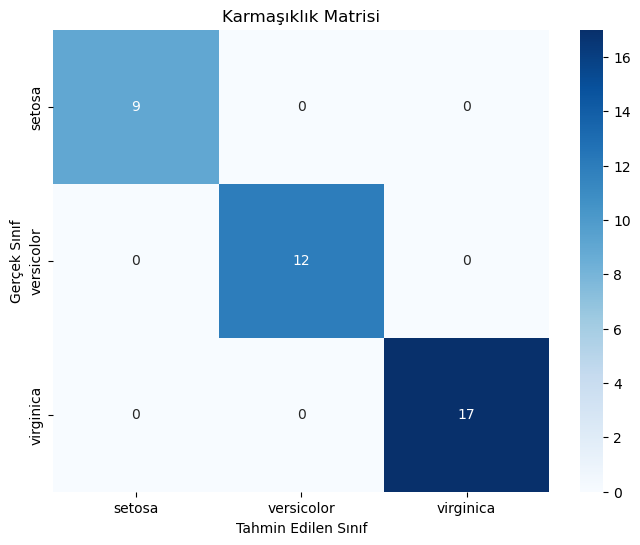

In [104]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Karmaşıklık Matrisi')
plt.show()

Karmaşıklık matrisini incelediğimizde "setosa" sınıfına ait olan verilerin tamamının doğru sınıflandırıldığını, "versicolor" sınıfına ait olan 14 değerin 12 tanesinin doğru sınıflandırıldığını ancak 2 tanesinin "virginica" olarak tahmin edilerek yanlış sınıflandırıldığını, "virginica" sınıfına ait olan 10 adet verinin tamamının doğru sınıflandırıldığını görebiliriz

**Peki elde ettiğimiz accuracy score nasıl elde edilmektedir? Confusion matrix üzerinde gösterelim:**

In [105]:
(14+12+10)/(14+12+2+10) #Doğru tahmin edilen elemanların sayısının, tüm elemanların sayısına bölümü

0.9473684210526315

----

Görüntü içeren ikinci bir veri seti ile Logistic Regression örneği yapalım. Veri seti olarak Scikit-Learn kütüphanesine ait olan "Digits" veri seti kullanılacaktır. Scikit-learn kütüphanesindeki "Digits" veri kümesi, el yazısı rakamların görüntülerini içeren ve sınıflandırma problemi olarak kullanılan bir veri kümesidir, makine öğrenmesi algoritmalarının eğitimi ve değerlendirilmesi için yaygın olarak kullanılır.

Veri setindeki her bir örnek, bir rakamın 8x8 boyutlarında siyah-beyaz bir görüntüsünü temsil eder. Örnek olarak veri setinde bulunan ilk el yazısı rakamın görüntüsünü inceleyelim.

(1797, 64)


<Figure size 640x480 with 0 Axes>

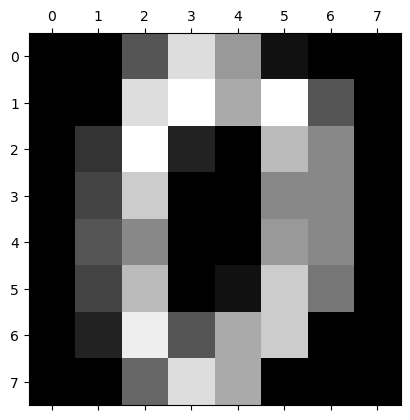

In [106]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits()
print(digits.data.shape)
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Bu veri seti üzerinde Logistic Regression ile modelleme yapalım:

**Gerekli kütüphanelerin içe aktarılması**

In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

**Veri setinin yüklenmesi**

In [108]:
data = load_digits()

X = data.data
y = data.target

**Verilerin "Eğitim" ve "Test" kümelerine ayrılması**

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Logistic Regression kullanımı**

In [110]:
clf = LogisticRegression(random_state=0, max_iter=500, solver="liblinear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

**Sonuçların incelenmesi**

In [111]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9611111111111111


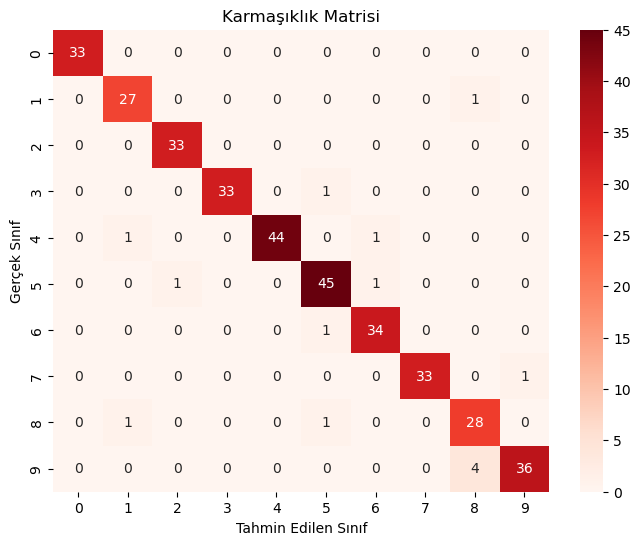

In [112]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.title("Karmaşıklık Matrisi")
plt.show()

Karmaşıklık matrisinde de görüleceği üzere 0'dan 9'a kadar olan rakamların neredeyse tamamı doğru tahminlenmiştir.

---

Exponential Family üyesi olan Tweedie Regression kullanılarak yapılan bir tahminleme örneği aşağıda verilmiştir:

**Gerekli kütüphanelerin içe aktarılması**

In [113]:
import numpy as np
from sklearn import linear_model

**Eğitim ve test verilerinin oluşturulması**

In [114]:
x_train = np.array ([[0,0],[1,1],[1,2],[2,3]])
y_train = np.array ([1.2, 0.6, 0.5, 1.3])
x_test = np.array([[2,2]])

**Tweedie Regressor kullanımı**

In [115]:
reg = linear_model.TweedieRegressor(power=1,link="log")

> "power=1" parametresi Tweedie dağılımının Poisson dağılımı ile ilişkili olduğunu ve Poisson regresyonu olarak bilinen regresyonu uygulayacağını göstermektedir. Bu parametrenin diğer versiyonlarının gösterimi aşağıda yapılmıştır:

| power | Dağılım                    |
|-------|----------------------------------|
| 0     | Normal                           |
| 1     | Poisson                          |
| (1,2) | Compound Poisson Gamma           |
| 2     | Gamma                            |
| 3     | Inverse Gaussian                 |


> "link ="log"" Poisson, Gamma ve Inverse Gaussian gibi olasılık dağılımları için hedef değişkenin tahminini yapmak için kullanılan log bağlantı işlevini belirler. Aşağıda "link="log"" kullanan üç farklı dağılım hakkında özellikler verilmiştir.

| Dağılım           | Bağlantı İşlevi                     | Tahmin Edilen Değer (y_pred)           |
|-------------------|------------------------------------|---------------------------------------|
| Poisson           | $y_{\text{pred}} = \exp(X \cdot \text{coeff} + \text{intercept})$ | Poisson dağılımı için hedef değişkenin tahmini   |
| Gamma             | $y_{\text{pred}} = \exp(X \cdot \text{coeff} + \text{intercept})$ | Gamma dağılımı için hedef değişkenin tahmini     |
| Inverse Gaussian  | $y_{\text{pred}} = \exp(X \cdot \text{coeff} + \text{intercept})$ | Inverse Gaussian dağılımı için hedef değişkenin tahmini |

link parametresindede kullanılan diğer seçenekler ve bu seçeneklerin özellikleri ise şöyledir:

* "auto": Bağlantı işlevini otomatik olarak belirleme imkanı sunar ve seçilen olasılık dağılımına ve güç parametresine göre bağlantı işlevini atamaktadır.

* "identity": "power" parametresinin 0'dan küçük veya eşit olduğu durumlarda kullanılır. 

* "log": "power" parametresinin 0'dan büyük olduğu (Poisson, Gamma ve Inverse Gaussian gibi "power" parametresinin pozitif olduğu durumlarda) kullanılır.

In [116]:
reg.fit(x_train,y_train)

TweedieRegressor(link='log', power=1)

In [117]:
reg.predict(x_test)

array([0.91570493])

## Generalized Linear Models

## Stochastic Gradient Descent

**Kayıp Fonksiyonu (Loss Function)**

Kayıp fonksiyonu $y$ gerçek değerine karşılık geleceği öngörülen $z$ değerini girdi olarak alan ve ne kadar farklı olduklarını gösteren bir fonksiyondur. Yaygın kayıp fonksiyonları şunlardır:

**Least squared error:**

Regresyon problemlerinde yaygın olarak kullanılkaktadır. Gerçek değerlerle tahmin edilen değerler arasındaki farkın karesini hesaplayarak hatayı ölçer. Amaç, hatayı minimize ederek modelin verilere uyum sağlamasını sağlamaktır.

$$ \frac{1}{2} (y - z)^2 $$



![leastsquare](leastsquareerror.png)

----

**Logistic loss**

Sınıflandırma problemlerinde kullanılır, özellikle lojistik regresyon gibi olasılık tabanlı sınıflandırma algoritmalarında tercih edilir. Gerçek etiket ve modelin sınıf olasılığı arasındaki farkı hesaplar. Amaç, olasılık değerlerini optimize ederek modelin doğru sınıflandırmalar yapmasını sağlamaktır.

$$ \log(1 + \exp(-yz)) $$


![logisticloss](logistic-loss.png)

-----

**Hinge loss:**
 
Destek Vektör Makineleri (SVM) gibi algoritmalar için kullanılır. Sınıflandırma problemlerinde modelin gerçek etiket ve öngörülen etiket arasındaki farkı ölçer. Amaç, doğru sınırlayıcı düzlemi (margin) oluşturarak sınıfları en iyi şekilde ayırmaktır.

$$ \max(0, 1 - yz) $$

![hingeloss](hinge-loss.png)

---

**Cross-entropy:**

Genellikle Neural Network çalışmalarında kullanılmaktadır. Gerçek sınıf olasılıkları ve model tarafından öngörülen sınıf olasılıkları arasındaki farkı hesaplar. Amaç, doğru sınıfları en iyi şekilde tahmin ederek modelin performansını optimize etmektir.

$$ -[y \log(z) + (1 - y) \log(1 - z)] $$


![crossentropy](cross-entropy.png)

**Maliyet Fonksiyonu (Cost Function)** 

$J$ maliyet fonksiyonu genellikle bir modelin performansını değerlendirmek için kullanılır ve $L$ kayıp fonksiyonu aşağıdaki gibi tanımlanır:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} L(h_\theta(x^{(i)}), y^{(i)}) $$


| İfade                               | Açıklama                                          |
|-------------------------------------|---------------------------------------------------|
| $J(\theta)$                         | Maliyet fonksiyonu    |
| $L$                                 | Tahmin edilen $h_\theta(x^{(i)})$ ve gerçek $y^{(i)}$ değerleri arasındaki farkı hesaplayan fonksiyon |
| $x^{(i)}$                           | Örnekerin input verileri         |
| $y^{(i)}$                           | Örneklerin gerçek değerleri    |
| $h_\theta(x^{(i)})$                 | Modelin $x^{(i)}$ girişine dayalı olarak yaptığı tahminler |
| $m$                                 | Veri kümesindeki toplam örnek sayısı|


**$J(\theta)$ fonksiyonununu minimize edecek olan $\theta$ değerini bulabilmek için Gradient Descent algoritması kullanılmaktadır. Gradient Descent algoritmasının matematiksel gösterimi ve bu algoritmayı kullanmak için uygulanan adımlar şu şekildedir:**

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta)
$$


1. Rastgele bir $\theta$ değeri ile algoritmaya başlanır.
2. Başlangıçta seçilen $\theta$ değeri, $J(\theta)$ değerini minimize edebilmek için güncellenir.

Gradient Descent algoritması gerçek hayata uyarlanırsa, alçak ve yüksek tepelerin bulunduğu büyük tepelerin olduğu bir çölün yüzeyinde rastgele bir noktaya bırakıldığınızı hayal edin. Bulunduğunuz yerde 360 derece etrafınıza baktığınızı ve kendinize "Şu an bulunduğum yerden daha alçakta olan bir yer var mı?" diye sorduğunuzu varsayın. Bulunduğunuz yerden daha alçak olan yöne doğru çok küçük bir adım attınız ve bu işleme $x_1$ adını verdiniz. Bu $x_1$ işlemini $x_2, x_3, ..., x_n$ olarak devam ettirip, çevrenizde o an bulunduğunuz noktadan daha alçak bir nokta olmayıncaya kadar gerçekleştirme işlemi, Gradient Descent olarak adlandırılmaktadır.

Uyarlanan bu örnekteki çöl, $J(\theta)$ olarak gösterilebilir. En alçak noktaya vardığınız zaman maliyet fonksiyonunu minimize etmiş olacaksınız.

Gradient Descent algoritmasında atılan adımların görselleştirmesi aşağıda verilmiştir:

![gd](Gradient_descent.png)

Seçilen $\alpha$ değeri atılan adımın büyüklüğünü belirlemektedir, Bu değer "Öğrenme Oranı" olarak adlandırılır. Eğer $\alpha$ değeri çok küçük seçilirse, atılan adımlar çok küçük olacak ve algoritma çok yavaş ilerleyecektir, bu da çok fazla vakit harcanmasına sebep olmaktadır. $\alpha$ değerinin çok büyük seçildiği durumlarda ise atılan adımlar fazlasıyla büyük olacak ve algoritmanın yakınsayabileceği yerlerde dahi olması gereken yerden daha uzağa gidecektir, bu olay ise dengesizlik yaratmaktadır. Pratikte bu problemin önüne geçmek için genellikle birkaç değer denenmekte ve $\alpha$'nın hangi değerinin algoritma için en verimli olduğu görülmektedir. $J(\theta)$ değerinin azalmak yerine arttığının görülmesi, $\alpha$ değerinin çok büyük seçildiği yönünde bir işarettir. Aşağıda sırasıyla öğrenme oranı çok büyük ve çok küçük olarak ayarlanmış iki adet görsel verilmiştir.

![toobig](toobig.png)

Görüldüğü üzere öğrenme oranının çok büyük olması, algoritmada sapmalara yol açmaktadır.

![toosmall](toosmall.png)

Öğrenme oranının çok küçük olması ise bir çok adım atılmasına sebep olarak algoritmanın süresini çok uzatmaktadır

![gditeration](gditeration.png))

Yukarıda 50 adet veri içeren bir veri seti için, her iterasyonda Gradient Descent algoritmasının, $J(\theta)$ değerini nasıl azalttığı görülmektedir. Algoritma içerisinde $\theta$ parametresinin değeri değiştirilmektedir. 5. iterasyonda verilere neredeyse uyumlu olduğu söylenebilecek bir çizgi oluşturulmuştur. Her bir iterasyon sonucunda ortaya çıkan çizgi, aslında $h_\theta(x)$ yani hipotezdir. İterasyon sayısı arttıkça minimize oranı artsa da algoritma süresi uzamaktadır, bu sebeple amaç dengeli ve başarılı bir algoritma oluşturabilmektir.

Gradient Descent'in önemli özelliklerinden biri, $\theta$ parametresini başlatıldığı yere bağlı olarak farklı yerel noktalara ulaşılabileceğidir.

**Batch Gradient Descent**

Batch Gradient Descent (Toplu Gradyan İnişi), tüm veri setini tek bir grup veri olarak kabul eder. Yapılan son örnekte 50 adet veri bulunmaktaydı. Batch Gradiant Descent, bu 50 adet veriyi tek bir grup olarak işler. "Toplu" adının kullanılmasının asıl sebebi bu özelliğidir.

Batch Gradient Descent'in ana dezavantajı, çok büyük bir veri seti ile uğraşılıyorsa, parametre güncellemek için Gradient Descent'ta görülen çok küçük adımlardan bir tanesini atmak gerektiğinde, devasa bir veri setini tarama ve bu veri seti için işlem yapma zorunluluğudur. Buna ek olarak Gradient Descent algoritması yüzlerce adım atılmasını gerektiriyor olabilir. Bu işlem Gradient Descent'in her adımını çok yavaş hale getirmektedir ve çok maliyetli olmaktadır.

Batch Gradient Descent'in kullanımının dezavantajından dolayı bir alternatifi bulunmaktadır, bu alternatif "Stochastic Gradient Descent" olarak adlandırılmaktadır. Stochastic Gradient Descent, $\theta$ parametresini güncellemeden önce yüzlerce veri taraması yapılmasını ve algoritmanın çok yavaşlamasını engellemek amacıyla bir döngü kullanır ve tek bir örneğin türevini kullanarak Gradient Descent hesaplamalarını yapar.

![Stochastic](StochasticGD.png)

Stochastic Gradient Descent'te yapılan ilk adım Gradient Descent ile aynıdır, rastgele bir $\theta$ parametresi ile başlanır. İlk eğitim örneği incelenir ve örneğin doğruluğunu arttırabilmek için parametre değiştirilir. Bu işlemin yalnızca bir örnek için yapılması sebebiyle genel olarak iyileştirme olabilse dahi tam olarak en düşük maliyet fonksiyonuna doğru dik bir iniş olmamaktadır. İlk örneğin devamında iyileştirme yapılır ve ikinci örneğe geçilir. 

Stochastic Gradient Descent, yukarıdaki şekilde de görüldüğü üzere Gradient Descent algoritmasına göre daha karmaşık bir yol izler, buna rağmen ortalamasına bakıldığında minimuma doğru yol almaktadır.

Bu işleyişi sebebiyle veri seti büyük olduğunda Stochastic Gradient Descent, algoritmanın çok daha hızlı şekilde sonuç vermesini sağlar. Büyük veri setlerinde Stochastic Gradient Descent, Batch Gradient Descent'e kıyasla yaygın olarak kullanılmaktadır.

![GDSteps](GDSteps.png)

Gradient Descent ise görüldüğü üzere Stochastic Gradient Descent'ten çok daha az salınıma sahiptir.

Batch Gradient Descent ve Stochastic Gradient Descent algoritmalarının ikisi de iterative algorithm (iteratif algoritma) olarak geçmektedir. Bunun anlamı ikisinin de genel optimuma ulaşmak için birden çok adım atması gerektiğidir.

**SGDClassifier**

SGDClassifier, verileri belirli sınıflara sınıflandırmak için kullanılan bir sınıflandırma algoritmasıdır. Eğitim sırasında, Stochastic Gradiant Descent yöntemiyle tek bir örnekleme üzerinden gradyanları hesaplar ve bu gradyanları kullanarak ağırlıkları günceller. Bu özellik sayesinde, büyük veri kümeleri üzerinde hızlı ve etkili bir şekilde çalışabilir. Aşağıda basit bir sınıflandırma problemi için SGDClassifier örneği verilmiştir:

**Gerekli kütüphanelerin içe aktarılması ve model eğitimi**

In [118]:
from sklearn.linear_model import SGDClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=10)
clf.fit(X, y)

SGDClassifier(max_iter=10)

loss="hinge" parametresi, sınıflandırma işleminde Hinge Loss kullanılacağını, penalty="l2" parametresi ise L2 regularizasyonunun kullanılacağını belirtir. "max_iter=10" parametres ise eğitimin 10 iterasyon yapacağını ifade eder.

**Tahminleme**

In [119]:
clf.predict([[2., 2.]])

array([1])

**Modelin Katsayıları**

In [120]:
clf.coef_

array([[9.85221675, 9.85221675]])

**Bias**

In [121]:
clf.intercept_

array([-9.99002993])

**SGDRegressor**

SGDRegressor regresyon problemleri için kullanılan bir modeldir. SGDRegressor, Stochastic Gradient Descent yöntemini kullanarak verileri temsil eden çizgi, düzlem veya hiperyüzey gibi uygun bir model oluşturmaya çalışır. Aşağıda basit bir regresyon problemi için SGDRegressor örneği verilmiştir:

**Gerekli kütüphanelerin içe aktarılması**

In [122]:
import numpy as np
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

**Eğitim Verileri Oluşturma**

In [123]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

**Model oluşturulması ve eğitimi**

In [124]:
model = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X, y.ravel())

SGDRegressor(random_state=42)

Yukarıdaki kod bloğunda kullanılan "tol" parametresi algoritmanın durma gerekliliğini belirler. Tolere edilebilecek maksimum kayıp (hata) değerinin gösterimidir. Kayıp bu değere ulaştığında veya daha düşük olduğunda, eğitim durmakta ve model eğitimi sonlanmaktadır. "ravel()" fonksiyonu ile ise y düzleştirilmiştir (dizi tek boyutlu hale getirilmiştir).

**Modelin görselleştirilmesi**

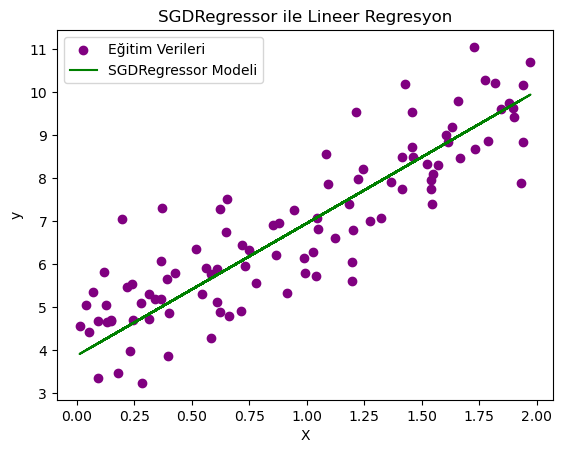

In [125]:
plt.scatter(X, y, color='purple', label='Eğitim Verileri')
plt.plot(X, model.predict(X), color='green', label='SGDRegressor Modeli')
plt.xlabel('X')
plt.ylabel('y')
plt.title('SGDRegressor ile Lineer Regresyon')
plt.legend()
plt.show()

**Modelin katsayıları ve bias**

In [126]:
model.coef_

array([3.07019574])

In [127]:
model.intercept_

array([3.8768447])

------

Aşağıda Iris veri setini kullanarak  çoklu sınıflandırma için Stochastic Gradient Descent sınıflandırıcısını kullanan, sonrasında elde edilen karar sınırını ve sonuçları görselleştiren bir örnek bulunmaktadır.

**Gerekli kütüphanelerin içe aktarılması**

In [128]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import SGDClassifier

**Veri setinin yüklenmesi**

In [129]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target
colors = "bry"

**Verilerin karıştırılması (Güvenilirlik ve çeşitlilik için)**

In [130]:
idx = np.arange(X.shape[0])
np.random.seed(13)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# standartlaştırma
mean = X.mean(axis=0)
std = X.std(axis=0)
X = (X - mean) / std

**Modelin eğitimi**

In [131]:
clf = SGDClassifier(alpha=0.001, max_iter=100).fit(X, y)

**Eğitilen modelin görselliştirilmesi**

/var/folders/zp/y0mk37bn1wn7rtfszn4_q3_h0000gn/T/ipykernel_51828/1921899888.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


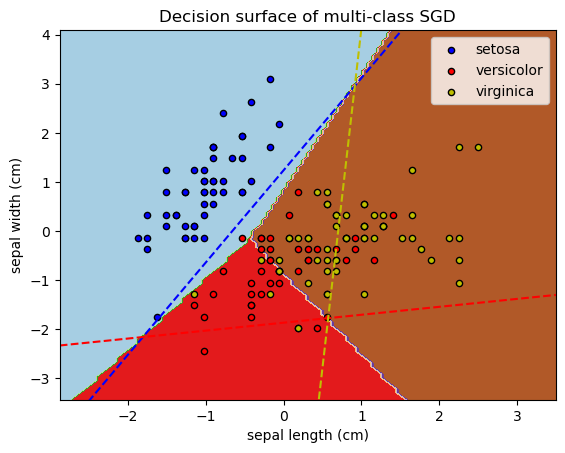

In [132]:
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    xlabel=iris.feature_names[0],
    ylabel=iris.feature_names[1],
)
plt.axis("tight")

for i, color in zip(clf.classes_, colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=iris.target_names[i],
        cmap=plt.cm.Paired,
        edgecolor="black",
        s=20,
    )
plt.title("Decision surface of multi-class SGD")
plt.axis("tight")

xmin, xmax = plt.xlim()
ymin, ymax = plt.ylim()
coef = clf.coef_
intercept = clf.intercept_


def plot_hyperplane(c, color):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="--", color=color)


for i, color in zip(clf.classes_, colors):
    plot_hyperplane(i, color)
plt.legend()
plt.show()

## Perceptron

Perceptron konu anlatımı, konuların bütünlüğünün sağlanması ve daha anlaşılır olabilmesi amacıyla 1.11 altında 1.11.2 alt başlığıyla anlatılmıştır.

## Passive Aggressive Algorithms

Pasive Aggressive Algorithms, sınıflandırma ve regresyon problemlerinde kullanılan çevrimiçi (online) öğrenme algoritmalarıdır. Çevrimiçi öğrenme algoritmaları, verilerin küçük grup veya tek tek olmak üzere, sürekli şekilde gelmesi durumunda kullanılan bir algoritma türüdür. Klasik algoritmalardan farkı, çevrimiçi algoritmaların veri kümesine erişimi olmadan çalışabilmesi ve eklenen yeni veriler için anında güncelemme ve öğrenme yapabilmesidir.

Çevrimiçi algoritmalar, özellikle büyük veri setlerinde veya sürekli değişmekte olan verilerde avantajlıdır. Bunun sebebi veri setini tamamen bellekte tutma zorunluluğu olmadığı için bellek verimli çalışabilmekte ve işlem gücü gereksinimini azaltabilmektedirler.

**PassiveAggressiveClassifier**

PassiveAggressiveClassifier algoritması, sınıflandırma problemlerinde kullanılmakta ve iki türe ayrılmaktadır:

* PA-I (loss="hinge") 

* PA-II (loss = "squared_hinge")

**PassiveAggressiveRegressor**

PassiveAggressiveRegressor algoritması regresyon problemleri için kullanılmakta ve iki türe ayrılmaktadır:

* PA-I (loss="epsilon_insensitive")

* PA-II (loss="squared_epsilon_insensitive")

----

Aşağıda PassiveAggressiveClassifier ve PassiveAggressiveRegressor algoritmaları kullanılarak yapılmış bir örnek verilmiştir: 

**Gerekli kütüphanelerin içe aktarılması**

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [134]:
from sklearn import linear_model
from sklearn.datasets import make_classification, make_regression

Bu örnekte veri setinin oluşturulması içi "make_classification" ve "make_regression" fonksiyonları kullanılmıştır. Bu fonksiyonlar Scikit-Learn kütüphanesindeki yapay veri oluşturma işlevleridir, makine öğrenmesi modellerini ve algoritmalarını test etmek veya örneklem veri oluşturmak amacıyla kullanılmaktadır. "make_classification?" kodu çalıştırılmış ve aldığı parametreler, bu parametrelerin tanımları, fonksiyon hakkındaki ipuçları gibi bilgiler ekranda gösterilmiştir. Bu özellik doğru kullanım ve model başarısı açısından yaygın olarak kullanılmaktadır.

In [135]:
make_classification?

Signature:
make_classification(
    n_samples=100,
    n_features=20,
    *,
    n_informative=2,
    n_redundant=2,
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=2,
    weights=None,
    flip_y=0.01,
    class_sep=1.0,
    hypercube=True,
    shift=0.0,
    scale=1.0,
    shuffle=True,
    random_state=None,
)
Docstring:
Generate a random n-class classification problem.

This initially creates clusters of points normally distributed (std=1)
about vertices of an ``n_informative``-dimensional hypercube with sides of
length ``2*class_sep`` and assigns an equal number of clusters to each
class. It introduces interdependence between these features and adds
various types of further noise to the data.

Without shuffling, ``X`` horizontally stacks features in the following
order: the primary ``n_informative`` features, followed by ``n_redundant``
linear combinations of the informative features, followed by ``n_repeated``
duplicates, drawn randomly with replacement from the infor

**PassiveAgressiveClassifier örneği için veri setinin oluşturulması**

In [136]:
data = make_classification(n_features = 6, n_classes = 2)

**Eğitim ve test verilerinin ayrılması**

In [137]:
x_train, x_test, y_train, y_test = train_test_split(data[0], data[1])

**Modelin eğitilmesi**

In [138]:
clf = linear_model.PassiveAggressiveClassifier(C =0.5)
clf.fit(x_train, y_train)

PassiveAggressiveClassifier(C=0.5)

PassiveAggressiveClassifier, bir "C" parametresine sahiptir. Default değeri 1 olan bu C parametresi, hataların düzeltilmesi ve modelin parametrelerinin güncellenmesi için kullanılan bir regularizasyon terimidir. C değeri büyüdükçe, model daha agresif davranmaya başlar ve modelin uyum hızı artar, bu durum overfitting ihtimalini arttırmaktadır. C değeri küçüldükçe, model daha pasif davranmakta ve daha az uyum sağlamaktadır. Bu durum ise underfitting ihtimali doğurmaktadır.

**Tahmin ve sonuçlar**

In [139]:
y_pred = clf.predict(x_test)
acc = metrics.accuracy_score(y_test,y_pred)
print(acc)

0.96


**Karmaşıklık matrisinin oluşturulması**

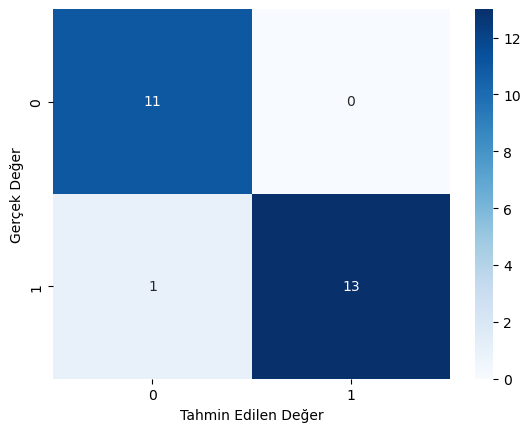

In [140]:
cm = metrics.confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.show()

Karmaşıklık matrisine göre 1 adet değer yanlış sınıflandırılırken, kalan 24 değer doğru sınıflandırılmıştır, şimdi PassiveAggressiveRegressor için örnek yapalım:

**PassiveAgressiveRegressor örneği için veri setinin oluşturulması**

In [141]:
data = make_regression(n_features = 6) #Sınıfları kaldırdık

**Eğitim ve test verilerinin ayrılması**

In [142]:
x_train, x_test, y_train, y_test = train_test_split(data[0], data[1])

**Modelin eğitilmesi**

In [143]:
reg = linear_model.PassiveAggressiveRegressor()
reg.fit(x_train, y_train)

PassiveAggressiveRegressor()

**Tahmin ve sonuçlar**

In [144]:
y_pred = reg.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

0.0030535527656892813


Mean Squared Error değerinin düşük olduğu görülmektedir.

##  Robustness regression: outliers and modeling errors

**Outlier**

Outlier (Aykırı Değer), bir veri setinde, diğer verilere kıyaslandığında gözle görülür derecede farklılıklar bulunduran verilerdir. Aykırı değerler, genellikle veri setinin görselleştirmesi yapıldığında, veri setinin dağılımına uymamaktadır. Bir veri setinin outlier bulundurmasının birçok sebebi olabilir. Bu sebeplere örnek olarak veri girişinde oluşan insan hataları, ölçümde yapılan hatalar veya gerçekten istisna derecesinde olabilecek veriler verilebilir.

Aykırı değerler modelleme sırasında sorunlar doğurabilmektedir, bu problemin önüne geçmek için yapılması gereken ilk şey aykırı değerlerin tespit edilmesidir, bu işlemin devamında aykırı değerler belirli yöntemler ile ele alınmaktadır. Aykırı değerler ile çalışırken kullanılacak yöntemler arasında bulunan yöntemlerden bazıları veri dönüşümü, trimming (baskılama) gibi yöntemlerken, bazıları ise aykırı değerleri dışlayan veya aykırı değerlerin modele olan etkisini azaltan yöntemlerdir.

**Robust**

Robust, içerisinde aykırı değerler bulunduran bir veri seti ile yapılmış olan bir modelin, aykırı değerlerin modele olan etkisine karşı ne kadar dayanıklı olduğu, aykırı değerler bulunmasına rağmen modelin güvenilirliği konusunda sorun yaşamama yeteneğidir. Robust yöntemler, aykırı değerlerin modele olan etkisini minimize eder ve aykırı değerlerin sonuçlar üzerinde hata oluşturma ihtimalini engellemeye çalışır.

Aşağıda iki farklı modelin regresyon çizgisi gözükmektedir. İlk görselde regresyon çizgisi aykırı değerden fazlasıyla etkilenmiş ve bu sebeple verilere tam olarak oturmamıştır. Bu sebeple ilk görselin robust olmadığı söylenebilir.

İkinci görselde ise regresyon çizgisi verilerle uyumludur. Aykırı değer, regresyon çizgisine modelin dengesini bozacak derecede etki etmemektedir. Aykırı değerin modele olan etkisi minimize edilmiştir ve bu sebeple ikinci görselin robust olduğu söylenebilmektedir.

**Robust değil**

![notrobust2](notrobust.png)

---

**Robust**

![robust](robust.png)

Aykırı değerler ele alınırken, dikkate alınması gereken bazı özellikler bulunmaktadır. Bu özelliklerden bir tanesi, aykırı değerlerin yatay şekilde mi yoksa dikey şekilde mi olduğudur. Bu özellik "Outline in x direction" veya "Outline in y direction" olarak bilinmektedir. Aşağıda iki türe de örnek verilmiştir:

**Outline in x direction**

![xdirection](xdirection.png)

Turkuaz renkli çizgi modele ait tahmin çizgisidir. Kırmızı veriler model çizgisi ile uyumluyken aykırı değerler (mavi veriler) modelle uyumsuzdur ve x koordinatının yaklaşık olarak belli bir değerine denk gelmektedir.

**Outline in Y direction**

![ydirection](ydirection.png)

Turkuaz renkli çizgi yine aynı şekilde modele ait tahmin çizgisidir. Kırmızı veriler model çizgisi ile uyumluyken aykırı değerler (mavi veriler) modelle uyumsuzdur ve y koordinatının yaklaşık olarak belli bir değerine denk gelmektedir.

Aykırı değerler ele alınırken göz önüne alınması gereken diğer özellik ise aykırı değerlerin, veri setindeki diğer verilerle olan uzaklığının ve uyumsuzluğunun ne kadar fazla olduğudur. Bu özelliğe göre "Small outliers" ve "Large outliers" olarak iki türe ayrılmaktadır: Aşağıda iki türe de örnek verilmiştir:

**Large Outliers**

Large Outliers (Büyük Aykırı Değerler), aykırı değerlerin, veri setinde kalan diğer verilere kıyasla gözle görülür derecede farklı olmasıdır. Büyük aykırı değerler, veri setinin ortalama ve medyan gibi değerlerini fazlasıyla değiştirebilir, bu sebeple dikkate alınması gerekmektedir.

![largeoutliers](largeoutliers.png)

**Small Outliers**

Small Outliers (Küçük Aykırı Değerler), aykırı değerlerin, veri setinde kalan verilere kıyasla farklı olsa da, Large Outliers kadar belirgin şekilde bir fark barındırmamaktadır. Veri setinin ortalama, medyan gibi değerlerine etki ediyor olsa da, etkisi Large Outliers kadar olmamaktadır. 

![smalloutliers](smalloutliers.png)

### RANSAC: RANdom SAmple Consensus

RANSAC (Random Sample Consensus), regresyon analizinde kullanılan ve aykırı değerlerle çalışmayı kolaylaştıran bir veri modelidir. Aykırı değer içeren veri setlerinde iyi çalışmaktadır. RANSAC, modele ait parametreleri belirlemek için veri setindeki, aykırı değerler dışında kalan veriler (inliers) ile çalışır.

Aşağıda verilmiş olan lineer regresyon modelinde, regresyon çizgisi aykırı değerlerden etkilenmiştir.
![notransac](notransacregressor.png)

Aşağıda verilmiş olan RANSAC Regressor modelinde ise, regresyon çizgisi aykırı değerlerden etkilenmemiştir ve böylece modelin başarısı artmıştır.

![ransac](ransacregressor.png)

---

RANSAC algoritmasının çalışma mantığı şu şekildedir:

![ransacalgorithm](ransacalgorithm.png)

* RANSAC algoritması, rastgele iki adet veri seçer, bu iki nokta arasında bir model oluşturur.
* RANSAC algoritması, olutşturulan model ile tüm verileri karşılaştırır ve modelin tahmin ettiği değerler ile gerçek veriler arasındaki hatayı hesaplar.
* Bir hata eşiği (threshold) belirlenir, veri noktasının hatası bu eşiği aşarsa, aşan veri aykırı değer olarak kabul edilir.
* Aykırı değer olmayan ve hata eşiğine göre hatası düşük olan (belirlenen bölgenin içerisinde kalan) veriler, "inlier" olarak kabul edilir.
* RANSAC, inlier ve aykırı değer olarak kabul edilen veriler ile yeni bir model oluşturur.
* Önceden tanımlanmış bir iterasyon sayısı bulunuyorsa bu iterasyon sayısına, bulunmuyorsa başka bir durma kriterine varana kadar işlem devam eder.

Görselde çizilen turuncu bölge hata eşiğine, gri veriler aykırı değerlere, yeşil veriler ilk olarak seçilmiş olan iki adet rastgele veriye, turuncu veriler ise hata eşiğinin altında kaldığı için inlier olarak kabul edilen verilere denk gelmektedir.

![ransacsecond](ransacalgorithmseconditeration.png)

Birkaç iterasyon sonrasında daha fazla inlier içeren ve başarısı daha fazla olan model oluşturulmuştur.

Aşağıda RANSAC algoritması ile yapılan bir modelleme örneği bulunmaktadır:

**Gerekli kütüphanelerin içe aktarılması**

In [145]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model

**Veri setinin oluşturulması**

In [146]:
n_samples = 1000
n_outliers = 50


X, y, coef = datasets.make_regression(
    n_samples=n_samples,
    n_features=1,
    n_informative=1,
    noise=10,
    coef=True,
    random_state=0,
)

**Aykırı değerlerin veri setine eklenmesi**

In [147]:
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

**Lineer regresyon modelinin oluşturulması**

In [148]:
lr = linear_model.LinearRegression()
lr.fit(X, y)

LinearRegression()

**RANSAC algoritması modelinin oluşturulması**

In [149]:
ransac = linear_model.RANSACRegressor()
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

**Tahminleme**

In [150]:
line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = lr.predict(line_X)
line_y_ransac = ransac.predict(line_X)

**Model katsayılarının karşılaştırılması**

In [151]:
print("Estimated coefficients (true, linear regression, RANSAC):")
print(coef, lr.coef_, ransac.estimator_.coef_)

Estimated coefficients (true, linear regression, RANSAC):
82.1903908407869 [54.17236387] [82.08533159]


**Görselleştirme**

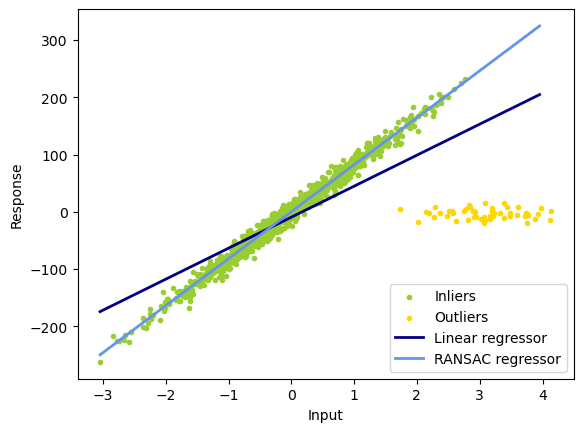

In [152]:
lw = 2
plt.scatter(X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers")
plt.scatter(X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers")
plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
plt.plot(line_X, line_y_ransac, color="cornflowerblue", linewidth=lw, label="RANSAC regressor")
plt.legend(loc="lower right")
plt.xlabel("Input")
plt.ylabel("Response")
plt.show()

Model görselleştirmesi incelendiğinde, Lineer regresyon çizgisinin aykırı değerlerden etkilendiği ve bu sebeple model doğruluğunun düşük kaldığı gözükmektedir. RANSAC algoritması kullanıldığında ise, aykırı değerlerin model üzerinde olan etkisi azaltılmış ve böylece modelde doğruluk oranı arttırılmıştır.

### Theil-Sen estimator: generalized-median-based estimator

TheilSenRegressor, çok boyutlu verilerde medyanın (median) genelleştirilmiş bir kullanımını yapar ve çok değişkenli aykırı değerlere karşı dayanıklıdır. Buna rağmen modelin tahmin dayanıklılığı, problem boyutuyla beraber hızla azalmaktadır. Yüksek boyutlu problemlerde dayanıklılık özelliklerini kaybeder ve yüksek boyutlarda Ordinary Least Squares yöntemiyle benzer bir tahmin performansı gösterir.

TheilSenRegressor, Ordinary Least Squares ile kıyaslanabilir. OLS'in aksine Theil-Sen, verilerin temel dağılımı hakkında herhangi bir varsayımda bulunmadığı için **non-parametrik** bir yöntemdir. Theil-Sen aykırı değerlere karşı daha dayanıklıdır. Tek değişkenli durumda, basit doğrusal regresyon durumunda Theil-Sen'in bozulma noktası (breakdown point) yaklaşık olarak %29.3'tür, yani en fazla %29.3'e kadar rastgele bozulmuş verilere tolerans gösterebilir.

TheilSenRegressor, aykırı değerler içeren veri setinde OLS'ye göre daha güvenilir tahminleme yapmaktadır ve bu, verilerdeki aykırı değerlerin doğru eğim tahminini ciddi şekilde etkileme olasılığının daha düşük olduğu anlamına gelmektedir. TheilSenRegressor, lineer regresyon problemlerinde daha güçlü ve dayanıklı bir yöntemdir ve verilerin dağılımı hakkında herhangi bir varsayım yapmadan etkin bir şekilde çalışabilir.

Theil-Sen'in hesaplamasında yaşanma ihtimali olan karmaşıklıklar sebebiyle, genellikle küçük veri setlerinde kullanılması önerilmektedir. Büyük veri setlerine geçildiğinde, Theil-Sen'in parametreleri sebebiyle çalışma zamanı kısıtlanmakta ve bu sebeple sorunlar yaşanabilmektedir.

Theil-Sen bazı veri setlerinde veya bazı koşullarda RANSAC'a kıyasla aykırı değerlere karşı daha dayanıklı olmakta, böylece de daha iyi bir performans gösterebilmektedir. Her ne kadar küçük problemler için daha uygun olduğu söylense de, büyük veri setlerine uygulandığı durumlarda "max_subpopulation" ile birlikte kullanılabilmektedir. 

Aşağıda üç farklı regresyon modelini birbirleriyle karşılaştırma amacıyla yazılmış ve devamında görselleştirilmiş bir örnek bulunmaktadır:

**Y doğrultusunda bulunan aykırı değerler için:**

**Gerekli kütüphanelerin içe aktarılması**

In [153]:
import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor

**Sınıfların oluşturulması**

In [154]:
estimators = [
    ("OLS", LinearRegression()),
    ("Theil-Sen", TheilSenRegressor(random_state=42)),
    ("RANSAC", RANSACRegressor(random_state=42)),
]
colors = {"OLS": "turquoise", "Theil-Sen": "gold", "RANSAC": "lightgreen"}
lw = 2

**Modelleme**

In [155]:
np.random.seed(0)
n_samples = 200
x = np.random.randn(n_samples)
w = 3.0
c = 2.0
noise = 0.1 * np.random.randn(n_samples)
y = w * x + c + noise

**Aykırı değerlerin eklenmesi**

In [156]:
y[-20:] += -20 * x[-20:]
X = x[:, np.newaxis]

**Görselleştirme**

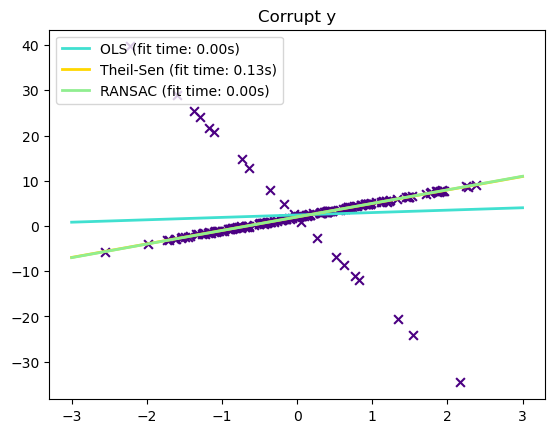

In [157]:
plt.scatter(x, y, color="indigo", marker="x", s=40)
line_x = np.array([-3, 3])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
_ = plt.title("Corrupt y")

**X doğrultusunda bulunan aykırı değerler için:**

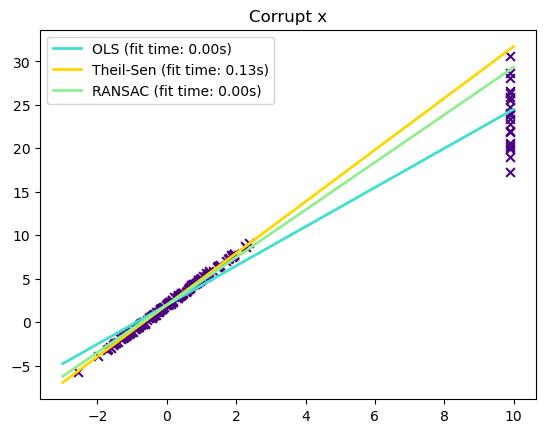

In [158]:
np.random.seed(0)
x = np.random.randn(n_samples)
noise = 0.1 * np.random.randn(n_samples)
y = 3 * x + 2 + noise
x[-20:] = 9.9
y[-20:] += 22
X = x[:, np.newaxis]

plt.figure()
plt.scatter(x, y, color="indigo", marker="x", s=40)

line_x = np.array([-3, 10])
for name, estimator in estimators:
    t0 = time.time()
    estimator.fit(X, y)
    elapsed_time = time.time() - t0
    y_pred = estimator.predict(line_x.reshape(2, 1))
    plt.plot(
        line_x,
        y_pred,
        color=colors[name],
        linewidth=lw,
        label="%s (fit time: %.2fs)" % (name, elapsed_time),
    )

plt.axis("tight")
plt.legend(loc="upper left")
plt.title("Corrupt x")
plt.show()

Theil-Sen yönteminin zaman karmaşıklığı şu şekilde gösterilmektedir:

$$T(n_{samples},n_{subsamples}) = O(n_{samples} \cdot n_{subsamples})$$

Theil-Sen, zaman karmaşıklığı olarak $n_{samples}$ ve $n_{subsamples}$'a göre ölçeklendiği için, büyük veri kümelerinde pratik olarak kullanılamamaktadır.  

### Huber Regression

HuberRegressor, kullanıcı tarafından belirlenen ve HuberRegressor'a ait olan duyarlılığı ayarlamak için kullanılan eşik değerinin altında olan verileri, normal veri olarak kabul etmekte ve bu veriler üzerinde klasik regresyon modellemesi yapmaktadır. Belirlenen eşik değerinin üzerinde kalan veriler ise farklı şekilde ele alınmaktadır. Eşik değeri sınırının dışında kalan aykırı değerlerin üzerinde lineer bir loss(kayıp) uygulamaktadır. Bu şekilde aykırı değerlerin modele olan etkisi azalmakta ve modelin aykırı değerlere karşı olan dayanıklılığı artmaktadır.

HuberRegressor'un, RANSACRegressor ve TheilSenRegressor'den ana farkı aykırı değerleri göz ardı etmiyor oluşudur. RANSACRegressor ve TheilSenRegressor, çoğu modellemede aykırı değerleri yok saymaktadır, bu sebeple aykırı değerler modele hiçbir şekilde katkı sağlamamaktadır. HuberRegressor ise aykırı değerleri tamamen yok saymak yerine, aykırı değerlerin ağırlıklarını azaltmakta ve bu şekilde modelin performansını iyileştirmeye çalışmaktadır.

HuberRegressor'a ait olan loss function şu şekilde gösterilmektedir:

$$
\min_{w, \sigma} \sum_{i=1}^{n} (\sigma + h_e\left(\frac{\sigma \cdot x_i \cdot w \cdot y_i}{\sigma}\right) \cdot \sigma) + \alpha \cdot \|w\|_2^2
$$

$$where$$

$$ h_{\epsilon}(z) = \begin{cases} 
      z^2, & \text{if } |z| < \epsilon \\
      2\epsilon|z| - \epsilon^2, & \text{otherwise}
   \end{cases} $$

%95 istatistiksel başarı değerini elde edebilmek için, epsilon parametre değerinin 1.35 olarak belirlenmesi genellikle önerilmektedir.

Aşağıda HuberRegressor kullanılarak tasarlanmış bir model örneği bulunmaktadır:

**Gerekli kütüphanelerin içe aktarılması**

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

**Eğitim ve test verilerinin oluşturulması**

In [160]:
x_train = np.linspace(0,10,100).reshape(-1,1)
y_train = np.sin(x_train)
y_train [:30:3] = 3
x_plot = x_train.copy()

**Modelin oluşturulması**

In [161]:
reg = make_pipeline(PolynomialFeatures (degree= 4),RANSACRegressor())
reg.fit(x_train,y_train)
y_plot = reg.predict(x_plot)

**Görselleştirme**

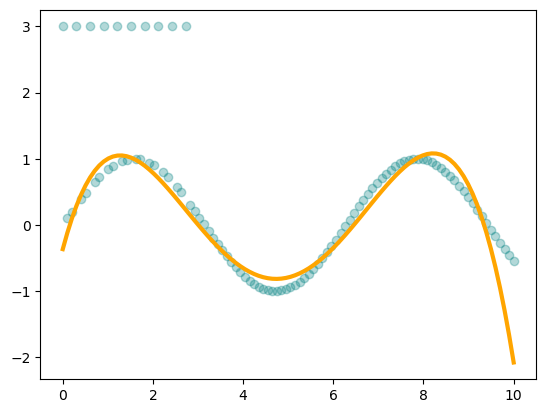

In [162]:
plt.scatter(x_train,y_train,color="teal",alpha=0.3)
plt.plot(x_plot,y_plot,color = "orange",linewidth=3)
plt.show()

Yukarıdaki görselde HuberRegression kullanılarak, aykırı değerler içeren bir veri setine yapılmış olan modellemenin görselleştirilmesi bulunmaktadır. Modelin aykırı değerlere karşı ne kadar dayanıklı olduğu, modele ait çizginin verilere ne kadar uyumlu olduğundan anlaşılabilmektedir.

## Quantile Regression

Quantile Regression (Kesirli Regresyon), klasik regresyon modellerinden farklı olarak yalnızca ortalamayı tahmin etmek yerine veri setinin belli yüzdelik dilimlerini tahmin etme amacıyla kullanılmaktadır. Veri setinin en az %10'unda, maksimum %90'ında ne olduğunu tahminlemeye çalışmaktadır. Quantile Regression, genellikle aykırı değerlerin yüksek yüzdeli bulunduğu veri setlerinde, buna ek olarak klasik regresyon modellerinin yetersiz kaldığı durumlarda kullanılabilmektedir. 

Quantile Regression, girdilerin (x) kullanımıyla, çıktıların (y) belirli bir kesirine (q elemanı) karşılık gelen tahminleri yapmaktadır. q elemanı, 0 ile 1 arasında bir değer almakta ve belirli bir yüzdelik dilimi temsil etmektedir. Örneğin, q=0.5, medyanı temsil ederken, q=0.25, verilerin %25'lik bir dilimini temsil etmektedir.

Mean Pinball Loss, Quantile Regression için kullanılmakta olan bir ölçüttür. Quantile Regression'da kullanılmakta olan q elemanı için tahmini yapılan değerle gerçek değer arasındaki farkı göstermektedir. Matematiksel gösterimi şu şekildedir:

$$ \frac{1}{N} \sum_{i=1}^{N} \left( q \cdot (y_i - \hat{y}_i) \cdot I(y_i \geq \hat{y}_i) + (1 - q) \cdot (\hat{y}_i - y_i) \cdot I(y_i < \hat{y}_i) \right)$$

Formülde belirtilen sembollerin açıklaması ise şu şekildedir:

| Sembol | Açıklama                                    |
| ------ | ------------------------------------------ |
| N      | Veri sayısı                   |
| y_i    | Gerçek değer                               |
| ŷ_i   | Tahmin edilen değer       |
| q      | 0 ile 1 arasında belirlenen kesir değeri |
| I(x)   | Gösterimde kullanılan gösterge işleci      |


Mean Pinball Loss, Quantile Regression'da tahminleri yapılan değerlerin ne kadar başarılı olduğunu görebilmek amacıyla kullanılmaktadır. Mean Pinball Loss, ölçülen tahmin hatalarının vektörünü dikkate alarak Quantile Regression modellerinin performansını değerlendirmek için önemli bir metriktir. Mean Pinball Loss değeri de tıpkı diğer hata ölçütleri gibi düşük değere sahip olduğunda model için olumlu etkiye sahip olduğu düşünülmektedir.

Quantile Regression'da da, Lasso'ya benzer şekilde L1 regularizasyonu kullanılabilmekte ve bu L1 regularizasyonu, tıpkı Lasso'da olduğu gibi $\alpha$ parametresi ile ayarlanmaktadır.

---

Aşağıda 3 farklı q değeri için oluşturulmuş bir Quantile Regression modeli ve bu modele ait görselleştirme örnek olarak verilmiştir. Bu örnek, Quantile Regression'ın, verilerin dağınıklığından bağımsız olarak, koşullu kesirleri başarılı bir şekilde tahmin edebildiğini göstermektedir.

Sol taraftaki grafikte, hata dağılımının normal ama varyansın değişken olduğu bir senaryo gösterilmektedir. Hataların dağılımı verilerin etrafında farklı varyanslara sahip olabilmektedir. Buna "heteroskedastisite" denir. Quantile Regression böyle durumlarda bile verilerin dağılımını göz önünde bulundurarak doğru koşullu kesirleri tahmin edebilme yeteneğine sahiptir.

Sağ taraftaki grafik ise, asimetrik bir hata dağılımını temsil etmektedir. Bu hata dağılımı, normal dağılımın dışında kalan özel bir dağılım türü olan Pareto dağılımını göstermektedir. Pareto dağılımı, bazı verilerin çok küçük ya da çok büyük değerlere sahip olma isteğinde olduğu ve normal dağılıma göre daha asimetrik olunan bir dağılım türüdür. Quantile Regression, bu tür asimetrik hata dağılımlarını da hesaba katmakta ve verilerin belirli kesirlerine uygun tahminler yapabilmektedir.

Örnekte, Quantile Regression'ın ana mantığını anlatabilmek için iki adet veri seti oluşturulmuştur.  İki ardışık problem yaratılmış ve her iki problemde de hedef değişken "y"nin dağılımı değişmiştir.Her iki durumda da, hedef değişkenin beklenen değeri aynı olmuştur.

İlk durumda, "y" değerlerine eklenen gürültü, heteroskedastik bir Normal dağılıma sahip olmuştur. Farklı "x" değerlerine bağlı olarak "y" değerlerinin varyansı değişmiştir.

İkinci durumda ise, "y" değerlerine eklenen gürültü, asimetrik bir Pareto dağılımına sahip olmuştur. Pareto dağılımı, normal dağılıma göre daha asimetrik bir yapıya sahiptir ve bazı "y" değerleri çok büyük veya çok küçük olma eğilimindedir, yine de beklenen değer aynı kalmıştır.

In [163]:
import numpy as np

rng = np.random.RandomState(42)
x = np.linspace(start=0, stop=10, num=100)
X = x[:, np.newaxis]
y_true_mean = 10 + 0.5 * x

In [164]:
y_normal = y_true_mean + rng.normal(loc=0, scale=0.5 + 0.5 * x, size=x.shape[0])
a = 5
y_pareto = y_true_mean + 10 * (rng.pareto(a, size=x.shape[0]) - 1 / (a - 1))

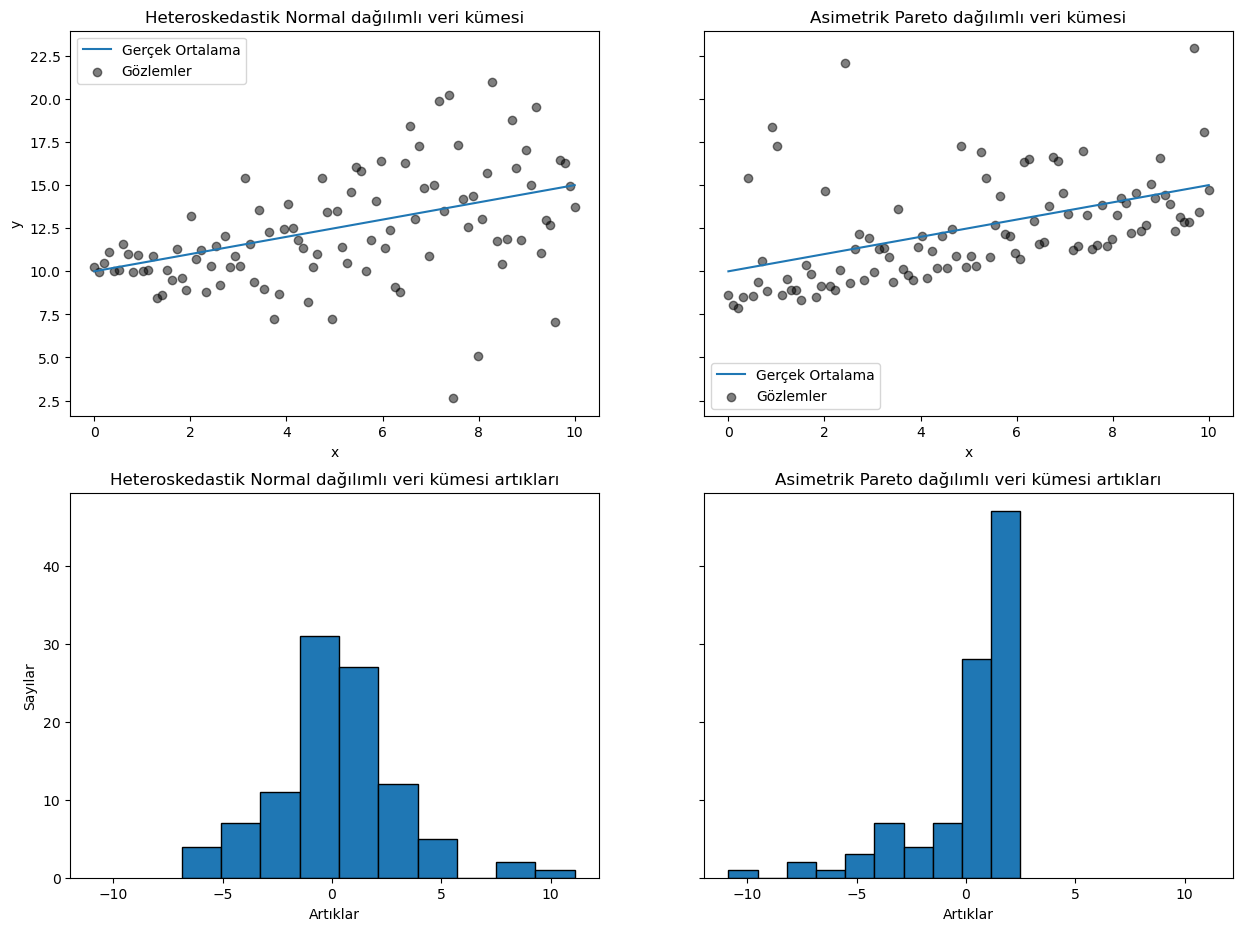

In [165]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 11), sharex="row", sharey="row")

axs[0, 0].plot(x, y_true_mean, label="Gerçek Ortalama")
axs[0, 0].scatter(x, y_normal, color="black", alpha=0.5, label="Gözlemler")
axs[1, 0].hist(y_true_mean - y_normal, edgecolor="black")

axs[0, 1].plot(x, y_true_mean, label="Gerçek Ortalama")
axs[0, 1].scatter(x, y_pareto, color="black", alpha=0.5, label="Gözlemler")
axs[1, 1].hist(y_true_mean - y_pareto, edgecolor="black")

axs[0, 0].set_title("Heteroskedastik Normal dağılımlı veri kümesi")
axs[0, 1].set_title("Asimetrik Pareto dağılımlı veri kümesi")
axs[1, 0].set_title("Heteroskedastik Normal dağılımlı veri kümesi artıkları")
axs[1, 1].set_title("Asimetrik Pareto dağılımlı veri kümesi artıkları")
axs[0, 0].legend()
axs[0, 1].legend()
axs[0, 0].set_ylabel("y")
axs[1, 0].set_ylabel("Sayılar")
axs[0, 1].set_xlabel("x")
axs[0, 0].set_xlabel("x")
axs[1, 0].set_xlabel("Artıklar")
_ = axs[1, 1].set_xlabel("Artıklar")

Heteroskedastik Normal dağılımlı hedef değişkenle, özellik (x) değeri arttıkça gürültü (hata) varyansının da arttığını gözlenmektedir, verilerin çevresinde değişen bir varyans olduğu anlaşılmaktadır.

Asimetrik Pareto dağılımlı hedef değişkenle, pozitif artıkların sınırlandığını görülmektedir.Bazı veri noktaları diğerlerine göre çok daha büyük değerlere sahip olma eğilimindedir ve bu veri noktaları regresyon sonuçlarını etkileyebilmektedir.

Örnekteki gibi gürültü içeren hedef değişkenler, Lineer Regresyon kullanarak tahmin yapmayı zorlaştırmaktadır. Daha doğru sonuçlar elde etmek için daha fazla veriye ihtiyaç duyulmaktadır. Büyük aykırı değerler (Large outliers), tahminlemesi yapılan katsayılar üzerinde büyük bir etkiye sahip olabilmektedir. Özellikle verilerin dağılımı heterojen veya asimetrikse, Lineer Regresyon doğru modelleme yapmakta yetersiz kalabilmektedir. Quantile Regression, bu tür veri dağılımlarında daha güvenilir sonuçlar verebilmektedir.


In [166]:
from sklearn.utils.fixes import parse_version, sp_version
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"

In [167]:
from sklearn.linear_model import QuantileRegressor

quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_normal).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

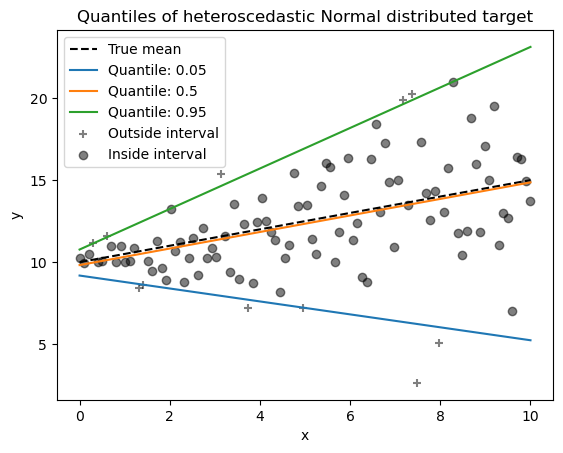

In [168]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_normal[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_normal[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of heteroscedastic Normal distributed target")

Eldeki gürültü hala Normal dağılımlı ve özellikle simetrik olduğu için, gerçek koşullu ortalama ve gerçek koşullu medyanın birbirine denk olduğu gözlemlenmektedir. Tahmin edilen medyan neredeyse gerçek ortalama değerini yakalamaktadır. %5 ve %95 kesirlerin tahminlerinin, x değeri arttıkça gürültü varyansındaki artış nedeniyle farklılaştığı görülmektedir. İki kesirin eğimleri oldukça farklıdır ve aralarındaki aralık x değeri arttıkça genişlemektedir.

%5 ve %95 kesir tahminlerinin anlamını daha iyi anlamak için, tahmin edilen kesirleri (yukarıdaki grafikte çarpı şeklinde temsil edilenler) göz önünde bulundurarak, toplamda 100 örneklem içinde tahmin edilen kesirlerin üzerinde ve altında kaç örneklem olduğu sayılabilir.

Pareto dağılımlı hedef değişkenle de aynı örnek tekrarlanabilir ve farklı dağılım türlerinin ve gürültü düzeylerinin kesir tahmincilerine nasıl etki ettiğini anlaşılabilir.

In [169]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0, solver=solver)
    y_pred = qr.fit(X, y_pareto).predict(X)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_pareto
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_pareto
        )

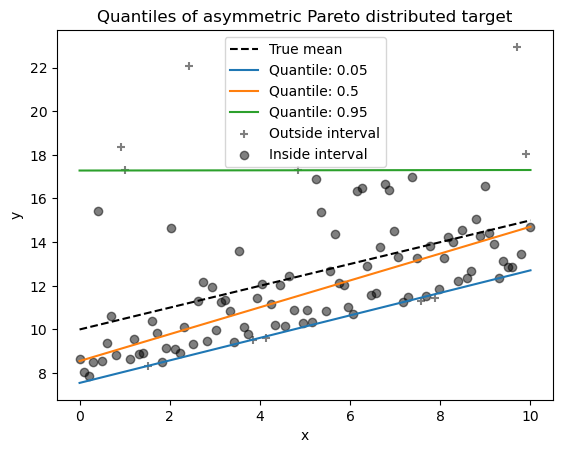

In [170]:
plt.plot(X, y_true_mean, color="black", linestyle="dashed", label="True mean")

for quantile, y_pred in predictions.items():
    plt.plot(X, y_pred, label=f"Quantile: {quantile}")

plt.scatter(
    x[out_bounds_predictions],
    y_pareto[out_bounds_predictions],
    color="black",
    marker="+",
    alpha=0.5,
    label="Outside interval",
)
plt.scatter(
    x[~out_bounds_predictions],
    y_pareto[~out_bounds_predictions],
    color="black",
    alpha=0.5,
    label="Inside interval",
)

plt.legend()
plt.xlabel("x")
plt.ylabel("y")
_ = plt.title("Quantiles of asymmetric Pareto distributed target")

Gürültünün dağılımı asimetrik olduğundan, gerçek ortalama ile tahmin edilen koşullu medyanın birbirinden farklı olduğu gözlemlenmektedir. Daha çok veri veya daha az aşırı kesir kullanarak, kesir tahmincilerinin daha istikrarlı bir yapıya sahip olacağını ve daha iyi sonuçlar vereceği söylenebilmektedir.

Quantile Regression ve Linear Regression'ın hatalarını karşılaştırmak üzerine örneğe devam edilmiştir. Bu farkın daha iyi anlaşılabilmesi amacıyla, iki modelin de eğitim hataları hem MSE (Linear Regression) hem de MAE (Quantile Regression) hesaplayarak aşağıda incelenmiştir.

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

linear_regression = LinearRegression()
quantile_regression = QuantileRegressor(quantile=0.5, alpha=0, solver=solver)

y_pred_lr = linear_regression.fit(X, y_pareto).predict(X)
y_pred_qr = quantile_regression.fit(X, y_pareto).predict(X)

print(f"""Training error (in-sample performance)
    {linear_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_lr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_lr):.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {mean_absolute_error(y_pareto, y_pred_qr):.3f}
    MSE = {mean_squared_error(y_pareto, y_pred_qr):.3f}
    """)

Training error (in-sample performance)
    LinearRegression:
    MAE = 1.805
    MSE = 6.486
    QuantileRegressor:
    MAE = 1.670
    MSE = 7.025
    


Yukarıdaki sonuçlara bakıldığında göze çarpan şey MAE değerinin MSE değerine göre daha düşük olmasıdır. Buna ek olarak Quantile Regression'a ait olan MAE değeri, Linear Regression'a ait olan MAE değerinden daha küçüktür. Quantile Regression'ın tahmin edilen değerleri, gerçek değerlere daha yakındır.

Benzer bir değerlendirme yaparak, çapraz doğrulama ile elde edilen test hataları da incelenmiştir. Modellerin genel performans bu sayede daha kapsamlı bir şekilde değerlendirilebilir.

In [172]:
from sklearn.model_selection import cross_validate

cv_results_lr = cross_validate(
    linear_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
cv_results_qr = cross_validate(
    quantile_regression,
    X,
    y_pareto,
    cv=3,
    scoring=["neg_mean_absolute_error", "neg_mean_squared_error"],
)
print(f"""Test error (cross-validated performance)
    {linear_regression.__class__.__name__}:
    MAE = {-cv_results_lr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_lr["test_neg_mean_squared_error"].mean():.3f}
    {quantile_regression.__class__.__name__}:
    MAE = {-cv_results_qr["test_neg_mean_absolute_error"].mean():.3f}
    MSE = {-cv_results_qr["test_neg_mean_squared_error"].mean():.3f}
    """)

Test error (cross-validated performance)
    LinearRegression:
    MAE = 1.732
    MSE = 6.690
    QuantileRegressor:
    MAE = 1.679
    MSE = 7.129
    


Modelin daha önce eğitimde görmediği verilerle yapılan değerlendirmede de benzer sonuçlara ulaşılmıştır. Quantile Regression'a ait olan MAE değeri, Linear Regression'a ait olan MAE değerinden daha küçüktür.

## Polynomial regression: extending linear models with basis functions

Polynomial Regression (Polinom Regresyonu), veriler arasındaki ilişkiyi doğrusal olmayan şekilde modelleyen bir regresyon analizi yöntemidir. Linear Regression'dan farkının anlaşılabilmesi için iki yönteme de ait olan matematiksel gösterimler aşağıda verilmiştir:

**Linear Regression:** 

$$h(x) = \theta_0 + \theta_1x_1 + \theta_2x_2 + \ldots + \theta_nx_n $$

**Polynomial Regression:**
$$ h(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \ldots + \theta_nx^n $$

Degree(Derece) kavramı, Polynomial Regression modellerine ait olan karmaşıklığı belirtmektedir. Polinoma ait olan derece, polinom içerisindeki en yüksek kuvvetin değerini ifade etmektedir. Örnek olarak birinci dereceden bir polinom fonksiyonunun gösterimi şu şekildedir:

$$h(x) = \theta_0 + \theta_1x$$

Matematiksel gösterimden de anlaşılabileceği üzere, birinci dereceden polinom fonksiyonu, aynı zamanda Linear Regression'a da eşittir. Polynomial Regression'ın esnekliğini ve model doğruluğunu arttırabilmek adına daha yüksek dereceli polinom fonksiyonları kullanılabilmektedir. Bu yüksek dereceli polinom fonksiyonları, sırasıyla ikinci dereceden polinom fonksiyonu, üçüncü dereceden polinom fonksiyonu, şeklinde ilerleyerek $n$'inci dereceden polinom fonksiyonuna kadar ilerleyebilmektedir. Örnek olarak ikinci dereceden polinom fonksiyonu ve üçüncü dereceden polinom fonksiyonunun matematiksel gösterimleri şu şekildedir:

**İkinci dereceden polinom fonksiyonu:**

$$ h(x) = \theta_0 + \theta_1x + \theta_2x^2$$

**Üçüncü dereceden polinom fonksiyonu:**

$$ h(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 $$

Yukarıdaki matematiksel gösterimlerden de görülebileceği gibi, polinom fonksiyonunun içerisindeki en yüksek kuvvet derecesi, hangi dereceden polinom fonksiyon olduğunu belirtmektedir. Polynomial Regression kullanarak, verilerin daha karmaşık yapılarına uyan daha yüksek dereceli polinomlar kullanılabilmektedir.

Aşağıda Linear Regression ile Polynomial Regression modellerinin görsel olarak örnekleri verilmiştir.

**Linear Regression**

![lineerpolynomial](lineerpolynomial.png)

**Polynomial Regression**
  
![lineerpolynomial2](lineerpolynomial2.png)

Yukarıda verilmiş olan Lineer Regression ve Polynomial Regression görsellerinden de anlaşılabileceği gibi, Linear Regression'a ait olan doğrusal model, bazı verileri yakalayamamıştır. Polynomial Regression'a ait olan doğrusal olmayan model ise, verileri Linear Regression modeline kıyasla daha doğru şekilde uyumluluk sağlamıştır.

**Aşağıda Polynomial Regression kullanılarak yapılmış olan bir modelleme örneği bulunmaktadır.**

Bir çiftçi olduğumuzu ve elimizde tarım yapabileceğimiz bir tarla olduğunu varsayalım. Amacımız, bu tarlada yapabileceğimiz tarımsal üretimi en verimli şekilde yapmak olacaktır. Verimliliğin ise iki farklı olaydan etkilendiğini varsayalım. Bunlardan ilki ekilen mahsule verilecek olan su miktarı, ikincisi ise verilecek gübre miktarıdır. Mahsul verimini arttırabilmek için bu iki parametreyi ayarlayacağız. Bu ayarlama olayı, yalnızca suya göre veya yalnızca gübreye göre işlem yapmak yerine, hem suya hem gübreye hem de su ve gübrenin birbirlerine karşı olan etkileşimine göre işlem yapma zorunluluğu ortaya çıkarmaktadır. Bu etki ise basitçe iki değerin birbirleriyle çarpılmasıyla ifade edilebilmektedir.

Bahsedilen çiftçi örneğindeki parametreleri ve olayları Polynomial Regression'da kullanabilmek amacıyla matematiksel olarak gösterelim:

| su $(x_1)$ | gübre  $(x_2)$                                  |su+gübre $(x_1+x_2)$|$su^2$ $(x_1^2)$|$gübre^2$ $(x_2^2)$|mahsul verimi $(h(x))$|
| ------ | ------------------------------------------ |------------------|-------|--|--|
| 10    | 1                 |10|100|1|1|
| 20   | 2                              |40|400|4|4|
| 30  | 3       |90|900|9|8|
| 40     | 4 |160|1600|16|16|

Aralarındaki bağlantıyı daha kolay şekilde kurabilmek için Polynomial Regression'a ait olan formül:

$$ h(x) = \theta_0 + \theta_1x + \theta_2x^2 + \theta_3x^3 + \ldots + \theta_nx^n $$

Şimdi buradaki özellikleri kullanarak veri setini oluşturalım ve Polynomial Regression kullanarak modelleme yapalım.

**Gerekli kütüphanelerin içe aktarılması**

In [173]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import make_pipeline

**Veri setinin oluşturulması**

In [174]:
water = np.array([10,20,30,40]).reshape(-1,1)
fertilizer = np.array([1,2,3,4]).reshape(-1,1)
crop_yield = np.array([1,4,8,16]).reshape(-1,1)

x = np.concatenate([water,fertilizer],axis=1)
y = crop_yield.copy()

print(f"x shape: {x.shape}\ny shape: {y.shape}")

x shape: (4, 2)
y shape: (4, 1)


Oluşturulan x ve y adlı dizilerin görevleri sırasıyla şunlardır:
* x : Su ve Gübre dizilerinin birleştirilmesiyle oluşturulmaktadır. Amacı su ve gübre verilerini içeren matris tutmaktır.

* y : "crop_yield" dizisinin kopyasıdır. Mahsullerin verimlerini içeren bir dizidir.

In [175]:
x_test = np.array([[35,12],[11,1.2],[26,5.8]]).reshape(3,2)
x_test

array([[35. , 12. ],
       [11. ,  1.2],
       [26. ,  5.8]])

In [176]:
np.set_printoptions(suppress=True)

f = PolynomialFeatures(degree=2)
f_new = f.fit_transform(x)
f_new

array([[   1.,   10.,    1.,  100.,   10.,    1.],
       [   1.,   20.,    2.,  400.,   40.,    4.],
       [   1.,   30.,    3.,  900.,   90.,    9.],
       [   1.,   40.,    4., 1600.,  160.,   16.]])

In [177]:
model = make_pipeline(PolynomialFeatures(degree=2),linear_model.LinearRegression())

model.fit(x,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

**Sonuç**

In [178]:
y_pred = model.predict(x_test)
y_pred

array([[12.10834684],
       [ 1.27755308],
       [ 6.25351423]])

-----

<center>
    
# Linear and Quadratic Discriminant Analysis

</center>

Linear Discriminant Analysis (LDA) ve Quadratic Discriminant Analysis (QDA) sınıflandırma problemlerinde kullanılmakta olan iki farklı yöntemdir. İki yöntemin de temel amacı, farklı sınıflara ait veriler bulunduran bir veri setini, doğru şekilde sınıflara ayırabilmektir.

Linear Discriminant Analysis ve Quadratic Discriminant Analysis yöntemleri sırasıyla doğrusal ve kuadratik karar yüzeyine sahiptir.

* **Doğrusal Karar Yüzeyi:**  Doğrusal karar yüzeyi, iki farklı sınıfı ayırabilmek için bir doğru kullanmakta olan sınırdır. Veriler iki boyutlu bir uzayda ise, bu sınır doğru şeklindedir. Eğer veriler üç boyutlu bir uzayda ise, bu sınır bir düzlem ya da hiperdüzlem olabilmektedir.

* **Kuadratik Karar Yüzeyi:** Kuadratik karar yüzeyi, bir ya da daha fazla kuadratik fonksiyon kullanmakta ve bu şekilde verileri sınıflandırmaktadır. Bundan önce bahsedilen Polynomial Regression gibi doğrusal olmayan problemler için daha uygundur. Veriler iki boyutlu bir uzayda ise, bu sınır parabol şeklini almaktadır. Veriler üç boyutlu ya da daha yüksek boyutlu bir uzayda ise, bu sınır kuadratik yüzeyler olmaktadır.

Hem Linear Discriminant Analysis, hem de Quadratic Discriminant Analysis yöntemi ayarlanması gereken hiçbir parametre içermemektedir. Bu yöntemlerin ikisi de kolay hesaplanabilen kapalı form çözümlerine sahiptir. 

**Linear Discriminant Analysis:**

Linear Discriminant Analysis, verileri sınıflandırmak için bir doğrusal yüzey kullanmaktadır. Genellikle iki ya da daha fazla sınıf bulunan durumlarda  sınıflandırma yapma amacıyla kullanılmaktadır. Linear Discriminant Analysis, sınıf farklarını ve iç grup varyansını hesaba katarak verileri daha düşük boyutlu bir uzayda temsil etmeye çalışmaktadır. Sınıflar arasındaki ayrımı en üst düzeye çıkarmak için sınıflandırma yüzeyini oluşturmaktadır. Bu nedenle, Linear Discriminan Analysis doğrusal bir karar sınırı oluşturmakta ve verileri sınıflandırmak için bir doğru kullanmaktadır.

Lineer Discriminant Analysis, çalışma altyapısı olarak Bayes teoremini kullanmaktadır. Her sınıf için Gaussian yoğunluğu modeli oluşturmakta ve bu yoğunluk modellerini kullanarak verileri sınıflandırmak için bir karar sınırı oluşturmaktadır. Bu karar sınırı, verileri sınıflandırmak için kullanılmakta ve böylece yeni bir veri geldiğinde hangi sınıfa ait olduğunu rahatlıkla bulabilmektedir.

Linear Discriminant Analysis içerisinde tüm sınıfların aynı kovaryans matrisi paylaştığına dair bir varsayım bulunmaktadur. Bu, varsayım sınıfların arasındaki kovaryans yapılarının birbirine çok benzediği anlamına gelmektedir. Bu varsayım, hesaplama sürecini kolaylaştırmakta ve verilerde yüksek boyutluluk veya az örneklem sayısı gibi durumlarda kullanılabilirliği arttırmaktadır. Verilerdeki farklı sınıf kovaryanslarının farklarının büyük olduğu durumlarda diğer yöntemlere göre performansı daha düşük kalabilmektedir.

Linear Discriminant Analysis, dimensionality reduction (boyut indirgeme) için de kullanılabilmektedir. Model verileri ayırt edici yönlere göre boyutunu azaltmak için "transform" yöntemini içermektedir. Bu yöntem sayesinde veriler, sınıflar arasındaki farkları koruyacak şekilde daha az boyutlu bir uzayda temsil edilebilmektedir. Boyut indirgeme, kompleks veri setlerinde sınıflandırma probleminde kullanılan modelin performansını arttırmak için kullanılmaktadır ve böyle durumlarda görselleştirme için de kullanılabilmektedir.

**Quadratic Discriminant Analysis:**

Quadratic Discriminant Analysis de Linear Discriminant Analysis gibi verileri sınıflandırmak için kullanılan bir yöntemdir. Verileri sınıflandırmak için aynı şekilde bir karar sınırı kullanmaktadır ancak bu karar sınırı veri uzayını iki ya da daha fazla sınıfa ayırmakta olan bir çizgidir. Quadratic Discriminant Analysis'in temel özelliği, bu karar sınırının doğrusal olma zorunluluğunun bulunmamasıdır. Verileri ayırma aşamasında, eğer veriler doğrusal bir şekilde ayrılmaya elverişli değilse Quadratic Discriminant Analysis yöntemi kullanılabilmektedir. Karar sınırı, eğri şeklinde ya da yüzey şeklinde olabilmektedir. 

Quadratic Discriminant Analysis'in arka planında Bayes kuralları bulunmaktadır. Verileri sınıflandırma aşamasında, her sınıfa ait bir density function (yoğunluk fonksiyonu) oluşturmakta ve bu fonksiyonun verileri ayırdığı sınıfları en iyi şekilde temsil etmesi beklenmektedir.

Aşağıda Linear Discriminant Analysis ve Quadratic Discriminant Analysis ile ilgili örnek verilmiştir. Bu örnekte her sınıfa ait kovaryans elipsoidleri verilmiş ve ek olarak Linear Discriminant Analysis ve Quadratic Discriminant Analysis'e ait olan karar sınırları gösterilmiştir. :

**Gerekli kütüphanelerin içe aktarılması**

In [179]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    "red_blue_classes",
    {
        "red": [(0, 1, 1), (1, 0.7, 0.7)],
        "green": [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        "blue": [(0, 0.7, 0.7), (1, 1, 1)],
    },
)
plt.cm.register_cmap(cmap=cmap)

/var/folders/zp/y0mk37bn1wn7rtfszn4_q3_h0000gn/T/ipykernel_51828/1797732296.py:13: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  plt.cm.register_cmap(cmap=cmap)


**Verilerin oluşturulması**

In [180]:
import numpy as np


def dataset_fixed_cov():
  
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -0.23], [0.83, 0.23]])
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C) + np.array([1, 1]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0.0, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[
        np.dot(np.random.randn(n, dim), C),
        np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4]),
    ]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

* "dataset_fixed_cov" fonksiyonu, kovaryans matrisleri aynı olan iki Gaussian Distribution'dan veriler oluşturmaktadır. Toplam 600 adet veri içermektedir.
* "dataset_cov" fonksiyonu da iki adet Gaussian Distribution'dan veri oluşturmaktadır. "dataset_fixed_cov" fonksiyonundan farkı, verileri oluştururken kullandığı iki adet Gaussian Distribution'ın kovaryans matrisleri farklıdır. Toplam 600 adet veri içermektedir.

**Görselleştirme için gerekli olan fonksiyonlar**

In [181]:
from scipy import linalg


def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title("Linear Discriminant Analysis")
        plt.ylabel("Data with\n fixed covariance")
    elif fig_index == 2:
        plt.title("Quadratic Discriminant Analysis")
    elif fig_index == 3:
        plt.ylabel("Data with\n varying covariances")

    tp = y == y_pred  
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker=".", color="red")
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker="x", s=20, color="#990000") 

    
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker=".", color="blue")
    plt.scatter(
        X1_fp[:, 0], X1_fp[:, 1], marker="x", s=20, color="#000099"
    )  

    
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx), np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(
        xx, yy, Z, cmap="red_blue_classes", norm=colors.Normalize(0.0, 1.0), zorder=0
    )
    plt.contour(xx, yy, Z, [0.5], linewidths=2.0, colors="white")

    # means
    plt.plot(
        lda.means_[0][0],
        lda.means_[0][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )
    plt.plot(
        lda.means_[1][0],
        lda.means_[1][1],
        "*",
        color="yellow",
        markersize=15,
        markeredgecolor="grey",
    )

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  
    
    ell = mpl.patches.Ellipse(
        mean,
        2 * v[0] ** 0.5,
        2 * v[1] ** 0.5,
        angle=180 + angle,
        facecolor=color,
        edgecolor="black",
        linewidth=2,
    )
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, "red")
    plot_ellipse(splot, lda.means_[1], lda.covariance_, "blue")


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], "red")
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], "blue")

**Görselleştirme**

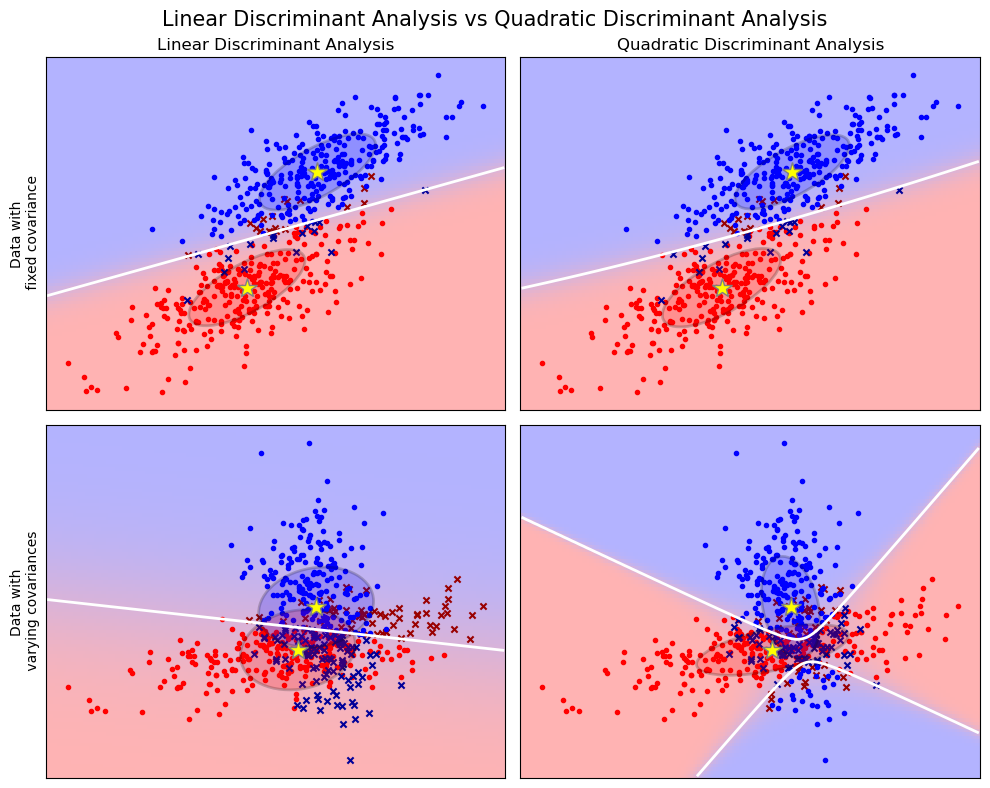

In [182]:
plt.figure(figsize=(10, 8), facecolor="white")
plt.suptitle(
    "Linear Discriminant Analysis vs Quadratic Discriminant Analysis",
    y=0.98,
    fontsize=15,
)

from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis,
    QuadraticDiscriminantAnalysis,
)

for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis("tight")

    
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis("tight")

plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

Yukarıdaki görselden de anlaşılabileceği üzere Linear Discriminant Analysis'e ait olan karar sınırı her zaman lineer olmaktadır. Quadratic Discriminant Analysis'e ait olan karar sınırı ise daha esnek şekiller alabilmektedir.

### Dimensionality reduction using Linear Discriminant Analysis

Linear Discriminant Analysis yöntemi, boyut indirgeme işlemi için de kullanılmaktadır. Girdiler, sınıflar arasındaki farkı en üst düzeye çıkaran yönler üstüne yansıtarak boyut indirgeme işlemini yapmaktadır. Veriler daha düşük boyutlu bir uzaya yansıtılırken, sınıflar arasındaki farklar korunmaya çalışılmaktadır. Linear Discriminant Analysis'in işlemlerdeki ana amacı, farklı sınıflar barındıran bir problemde sınıflar arasındaki farkı en açık şekilde sergilemektir.

Linear Discriminant Analysis, verileri yansıtmak için sınıflar arasındaki farkı en fazla artıran yönleri bulmaktadır ve bulduğu yönler verileri temsil eden yeni bir uzay oluşturmaktadır. Girdileri daha düşük boyutlu bir şekilde temsil eden bu uzay, sınıflar arasındaki farkları da korumaktadır.

Linear Discriminant Analysis, genellikle ikiden fazla sınıf bulunduran problem setlerinde kullanılması mantıklı olan bir yöntemdir, bu yöntemin uygulanabilmesi için "transform" yöntemi kullanılmaktadır. Boyut indirgeme miktarını belirlemek için "n_components" parametresi kullanılmakta ve bu parametre çıkış uzayının boyutunu belirlemekte, "fit" ve "predict" yöntemlerine herhangi bir etkisi bulunmamaktadır.

Aşağıda, içerisinde 4 adet özellik ve 3 adet sınıf barındıran Iris veri setiyle hazırlanmış bir örnek bulunmaktadır. Bu örnekte Iris veri setinde sırasıyla Linear Discriminant Analysis ve Quadratic Discriminant Analysis yöntemleri kullanılarak tahminleme yapılmakta, devamında ise boyut indirgeme işlemi gerçekleştirilmektedir..

**Gerekli kütüphanelerin içe aktarılması**

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

**Veri setinin oluşturulması**

In [184]:
data = datasets.load_iris()

x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

**Linear Discriminant Analysis kullanımı**

In [185]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

**Sonuç**

In [186]:
acc = metrics.accuracy_score(y_test,y_pred)
print(f"accuracy:{acc}")

accuracy:0.9736842105263158


**Karmaşıklık Matrisi**

In [187]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(f"confusion matrix: {cm}")

confusion matrix: [[12  0  0]
 [ 0 10  1]
 [ 0  0 15]]


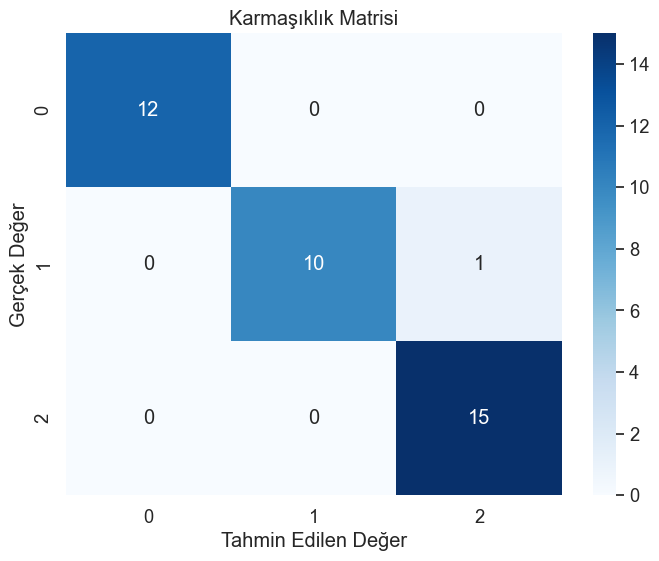

In [188]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

---

**Quadratic Discriminant Analysis Kullanımı**

In [189]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

**Sonuç**

In [190]:
acc = metrics.accuracy_score(y_test,y_pred)
print(f"accuracy:{acc}")

accuracy:0.9736842105263158


**Karmaşıklık Matrisi**

In [191]:
cm = metrics.confusion_matrix(y_test,y_pred)
print(f"confusion matrix: {cm}")

confusion matrix: [[12  0  0]
 [ 0 10  1]
 [ 0  0 15]]


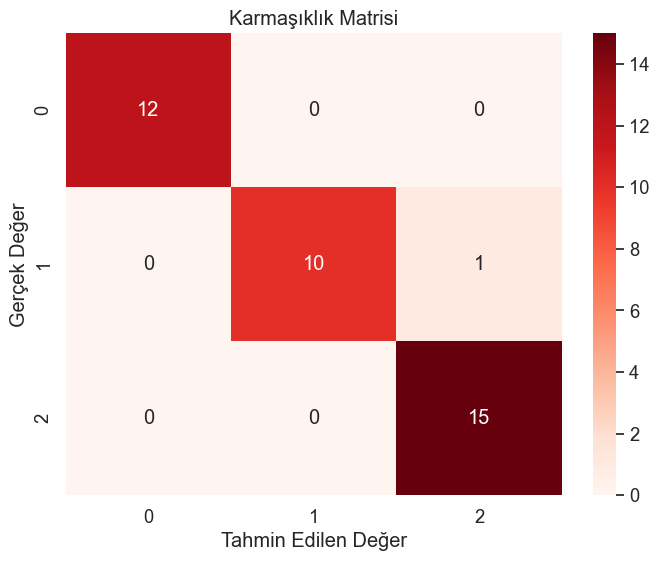

In [192]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Tahmin Edilen Değer')
plt.ylabel('Gerçek Değer')
plt.title('Karmaşıklık Matrisi')
plt.show()

---

**Boyut İndirgeme**



In [193]:
clf = LinearDiscriminantAnalysis()
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

In [194]:
trans = clf.transform(data.data)
print(f"Dönüştürülmüş veri {trans.shape}") 

Dönüştürülmüş veri (150, 2)


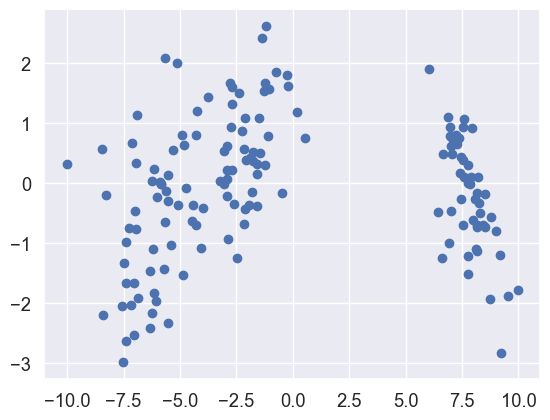

In [195]:
plt.scatter(trans[:,0],trans[:,1])
plt.show()

Yukarıdaki görselde de görülebileceği üzere son durumda iki farklı kümelenme bulunmaktadır ve düz bir karar sınırı ile oldukça iyi bir sonuç elde edilebilmektedir.

### Mathematical formulation of the LDA and QDA classifiers

Linear Discriminant Analysis ve Quadratic Discriminant Analysis'e ait olan matematiksel formüller ve bu formüllerin açıklaması aşağıda verilmiştir.

**Quadratic Discriminant Analysis:**

$$\log p(y=k|x) = -\frac{1}{2}\log|\Sigma_k| - \frac{1}{2}(x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) + \log p(y=k)$$

Verilmiş olan formüldeki semboller ve sembollerin açıklaması şu şekilde gösterilebilir:

* $p(y=k|x)$ sınıf k'nın olasılığıdır.

* $\Sigma_k$ sınıf k'nın kovaryans matrisidir.

* $u_k$ sınıf k'nın ortalama vektörüdür.

* $p(y=k)$ sınıf k'nın önceden bilinen olasılığıdır.

* $x$ özellik vektörüdür.

> Not: Quadratic Discriminant Analysis yönteminde kovaryans matrisler köşegense, yöntem ana form olarak Gaussian Naive Bayes ile aynı olmaktadır.

**Linear Discriminant Analysis:**

$$\log p(y=k|x) = -\frac{1}{2} (x - \mu_k)^T \Sigma_k^{-1} (x - \mu_k) - \frac{1}{2} \log |\Sigma_k| + \log p(y=k)$$

Verilmiş olan formüldeki semboller ve sembollerin açıklaması şu şekilde gösterilebilir:

* $p(y=k|x)$ sınıf k'nın olasılığıdır.

* $p(x|y=k)$ sınıf k için x'in olasılığıdır.

* $u_k$ sınıf k'nın ortalama vektörüdür.

* $\Sigma_k$ sınıf k'nın kovaryans matrisidir.

* $p(y=k)$ sınıf k'nın önceden bilinen olasılığıdır.

* $x$ özellik vektörüdür.

### Mathematical formulation of LDA dimensionality reduction

Linear Discriminant Analysis yöntemi kullanılarak yapılan boyut indirgeme işlemindeki amaç, verinin sahip olduğu özellikleri, ilk halinden daha az boyutlu bir uzaya götürmek ancak bu işlemi gerçekleştirirken aradaki farkı olabilecek en yüksek şekilde tutmaya çalışmaktır. Böylece veri uzayı küçülmüş olmakta ve sınıflandırma, analiz gibi işlemler daha kolay yapılabilmektedir.

Boyut indirgeme işlemi sırasında, veriyi en iyi şekilde göstereceğine inanılan boyutlar belirlenirse, bu boyutlarda kullanmak istenebilmektedir. Bu işlem için "n_components" adlı parametre kullanılmaktadır. "n_components" parametresi, verinin kaç boyutta temsil edileceğini göstermektedir. Aşağıda "n_components" parametresinin üç farklı değeri için, bu değerlerin anlamları verilmiştir:

| Değer | Boyut |
|---------------------|--------------|
| "n_components=1"                   | Tek Boyut (Çizgi)   |
| "n_components=2"                   | İki Boyut (Düzlem)   |
| "n_components=3"                  | Üç Boyut  (Uzay)  |

Ortalama vektörlerin hesaplanması işleminin matematiksel gösterimi ise şu şekildedir:$$\mu_k \mathbb{R}^dHK-1$$

### Shrinkage and Covariance Estimator

Shrinkage, veri setindeki veri sayısının, özellik sayısına kıyasla sınırlı olduğu durumlarda kullanılabilen bir regularizasyon yöntemidir. Shrinkage yönteminin amacı, kovaryans matrislerini daha başarılı bir şekilde tahminleyebilmektir. 

ShrinkageLDA, Linear Discriminant Analysis yöntemine ait parametrelerden biri olan "auto" değeri ile birlikte kullanılabilmektedir. Bu değer ile birlikte Shrinkage, Ledoit ve Wolf teoremleriyle analitik bir şekilde belirlenmektedir. ShrinkageLDA, "auto" değeri seçildiğinde yalnızca belirli parametrelerle çalışabilmektedir. Bunlar "lsqr" ve "eigen" parametre değerleridir. Bu değerler, yöntemin kovaryans matrisin iyileştirilme aşamasında hangi şekilde kullanılacağını ayarlamaktadır. 

Shrinkage, manuel olarak ayarlanabilmektedir. Manuel olarak ayarlanabilecek seçenekler 0 ile 1 arasındaki değerlerdir. 0 değeri, Shrinkage yönteminin hiç kullanılmadığını belirtirken, 1 değeri Shrinkage yönteminin tamamen kullanıldığı anlamına gelmektedir. Bu yöntemin tamamen kullanılması demek, kovaryans terimlerinin yok sayılması ve yalnızca değişkenlerin varyanslarının kullanılması anlamına gelmektedir. 

Küçültülmüş Ledoit ve Wolf kovaryans tahmini her zaman en iyi seçenek olmamaktadır. Normal dağılım dışındaki verilerde, Oracle Shrinkage Approximating tahmincisi daha düşük MSE ortaya çıkarabilmektedir. Eğer veri normal dağılıma uyuyorsa, OAS tahmini Ledoit ve Wolf veya deneysel kovaryans tahmincilerine göre sınıflandırma doğruluğu olarak daha iyi skorlar elde edilebilmektedir.

![LDAwithOAS](LDAwithOAS.png)

### Estimation algorithms

Linear Discriminant Analysis yönteminde genellikle "svd" çözücüsü kullanılmaktadır. "svd" çözücüsü, hem sınıflandırma işleminde, hem de boyut indirgeme işleminde kullanılabilmektedir. Veri setinde bulunan özellik sayısı fazla ise "svd" çözücüsünün kullanım sayısı fazladır, bunun sebebi "svd" çözücüsünün kovaryans matrisi açıkça hesaplamamasıdır. Discriminant Analysis yönteminde kullanılan bir diğer çözücü ise "lsqr" çözücüsüdür. "lsqr" çözücüsü yalnızca sınıflandırma işlemlerinde kullanılmaktadır ve varyans matrisini hesaplamaktadır.

Quadratic Discriminant Analysis yönteminde yalnızca "svd" çözücüsü kullanılabilmektedir, başka seçenek bulunmamaktadır. Genellikle veri seti büyükse kullanılmaktadır.

'eigen' çözücüsü ise sınıfların kendi içinde ve sınıflar arasındaki yayılma oranını optimize etmek amaçlı kullanılmaktadır. Hem sınıflandırma hem de boyut indirgeme için kullanılabilmektedir. Kovaryans matrisini hesaplama zorunluluğu bulunmaktadır. Bu zorunluluk sebebiyle fazla özellik içeren veri setlerinde genellikle kullanılmamaktadır. Bunun sebebi, büyük veri setlerinde, bu şekilde bir zorunluluğun verimliliği fazlasıyla düşürecek olmasıdır.

---

<center>

# Kernel Ridge Regression

</center>

 **Kernel**

Kernel, verilerin arasındaki ilişkileri inceleyebilmek ya da dönüştürmek için kullanılan matematiksel fonksiyondur. Genellikle doğrusal olmayan ilişkileri yakalayabilmeyi amaçlamaktadır. Kernel, verileri daha yüksek boyutlu bir uzaya taşımaktadır ve verilerin arasındaki ilişkiyi daha basit bir hale getirmektedir. Kernel'in matematiksel gösterimi şu şekildedir:

$$(x,x^{'}) \rightarrow k(x,x^{'})$$

Yukarıdaki matematiksel gösterimdeki $k(x,x^{'})$ değeri, kernel fonksiyonu olarak adlandırılmaktadır. Kernel'in, verileri daha yüksek boyutlu bir uzaya taşıdığı söylenmişti, bu işlemin gerçekleştirilme şeklinin görselleştirilmesi aşağıda verilmiştir:

![kernelveri](kernelveri.png)

Elimizde yukarıdaki şekilde görselleştirmesi yapılan verilere sahip bir veri setinin olduğunu varsayalım. Verilerin koordinatlarını içeren matris şu şekilde olacaktır:

$$
\begin{bmatrix}
0 & 1 \\
1 & 0 \\
0 & -1 \\
-1 & 0 \\
2 & 4 \\
4 & 2 \\
-2 & -4 \\
-4 & -2 \\
\end{bmatrix}
$$

Matriste gösterilen ilk 4 veri turuncu renkli, son 4 veri ise mor renkli gösterilmiştir. Bu verileri doğrusal bir sınıflandırıcı ile sınıflandırmayı deneyelim:

![kernellineer1](kernellineer1.png) 

Bu verileri doğrusal bir sınıflandırı ile sınıflandırmayı denediğimizde, dağılım sebebiyle pek etkili olmadığı görülmektedir. Farklı bir doğru ile tekrar deneyelim:

![kernellineer2](kernellineer2.png)

Yeni doğrusal sınıflandırıcı da aynı şekilde sınıflandırma açısından başarılı değildir. Böyle durumlarda verileri daha kolay ayırabilmek amacıyla yeni bir boyut eklenebilmektedir. Verilerin bulunduğu matrise bir Z koordinatı eklendiğinde ve matris tekrar gösterildiğinde şu matris elde edilmektedir:


$$
\begin{bmatrix}
0 & 1 & 1\\
1 & 0 & 1\\
0 & -1 & 1\\
-1 & 0 & 1\\
2 & 4 & 20\\
4 & 2 & 20\\
-2 & -4 & 20\\
-4 & -2 & 20\\
\end{bmatrix}
$$

Boyut eklenmiş verilerin gösterimi ise şu şekilde olmaktadır:

![kernel3d](kernel3d.png)

Turuncu noktaların grafiğin altında kaldığı, mor noktaların ise grafiğin üst bölgesinde olduğu görülmektedir. Bu iki sınıfı hiperdüzlem ile ayırmak artık kolay hale gelmiştir. Hiperdüzlem ile ayrılmış verilerin görselleştirilmesi ise şu şekilde olmaktadır:

![kernelclassified](kernelclassified.png)

Örnekten de anlaşılacağı gibi, veriler düşük boyutlu uzaydan yüksek boyutlu bir uzaya taşınmıştır ve bir hiperdüzlem kullanılarak veriler sınıflandırılmıştır.

**Kernel Tipleri**

Verinin özelliklerine ve probleme göre farklı sonuçlar üretebilen farklı türde kernel tipleri bulunmaktadır. Bu tipler ve bu tiplere ait özellikler şunlardır:

* **Lineer Kernel:** $$(x,x^{'})$$ Lineer Kernel'ın uygulaması ve görselleştirmesi yukardaki örnekte belirtilmektedir.
* **Polynomial Kernel:** $$(\gamma(x,x^{'})+r)^d$$ Polynomial Kernel'a ait karar sınırı, doğrusal olmama, eğimli olma özelliklerine sahiptir.

* **RBF:** $$exp(-\gamma||x-x^2||^2)$$ RBF(Radial Basis Function), içerisinde üstel ifade bulundurmaktadır. Verileri Gauss benzerliği ile sınıflandırmayı amaçlamaktadır.

* **Sigmoid:** $$\tanh (\gamma(x,x^{'})+r)$$ tanh bulundurmaktadır ve verileri sigmoid fonksiyonuna benzer şekilde sınıflandırmayı amaçlamaktadır.

Polynomial Kernel, RBF ve Sigmoid Kernel'da bulunan $\gamma$ ve $r$ parametreleri, veri setine ve probleme göre ayarlanmaktadır.

---

**Kernel Ridge Regression**

Kernel Ridge Regression, regresyon problemlerinde kullanılmakta olan bir yöntemdir. Ridge Regression'ın, Kernel fonksiyonları ile genişletilmiş bir halidir. Kernel Ridge Regression, veriler arasında bulunan kompleks ve doğrusal olmayan uyumu daha basite indirgemekte ve böylece veriler üzerinde daha esnek modeller tasarlanabilmektedir. Buna ek olarak Kernel Ridge Regression ile veriler daha yüksek boyutlu bir uzaya taşınabilmekte, ve sınıflandırma daha kolay yapılabilmektedir. Ayrıca verilerde bulunna gürültüye (noise) ve bozukluklara karşı daha dayanıklı olması sebebiyle, model güvenilirliğini korumaktadır. Kernel Ridge Regression işlemi sırasında, veriler daha yüksek boyutlu bir uzaya taşınmakta, regularizasyon ayarları yapılmakta ve devamında model eğitilmektedir.

Aşağıda Kernelization ile ilgili yapılmış olan, sırasıyla Linear, Polynomial, RBF ve Sigmoid tiplerini içeren; devamında Kernelizasyon işlemini yapan, sıfırdan hazırlanmış bir fonksiyon bulunduran bir örnek bulunmaktadır. 

**Gerekli kütüphanelerin içe aktarılması**

In [196]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.kernel_ridge import KernelRidge
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

**Veri setini oluşturma ve boyut ekleme**

> Not: Veri seti olarak, Kernel anlatımında kullanılan ve yüksek boyutlu uzaya taşınan veri seti kullanılmıştır.

In [197]:
x = np.array([[0,1],[1,0],[0,-1],[-1,0],[2,4],[4,2],[-2,-4],[-4,-2]])
y = np.array([0,0,0,0,1,1,1,1])

def map_feature(x):
    new = np.array((x[:,0],x[:,1],x[:,0]**2 + x[:,1]**2)).T
    return new

z = map_feature(x)
print(z)

[[ 0  1  1]
 [ 1  0  1]
 [ 0 -1  1]
 [-1  0  1]
 [ 2  4 20]
 [ 4  2 20]
 [-2 -4 20]
 [-4 -2 20]]


Boyut ekleme işlemi gerçekleştirildi. Verilerin yeni durumunu 2D ve 3D şeklinde görselleştirirsek:

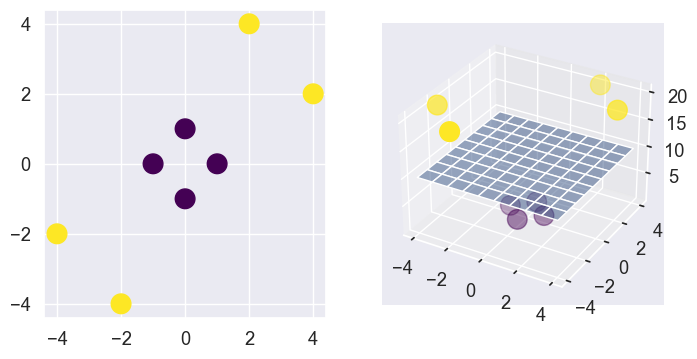

In [198]:
fig = plt.figure(figsize=(8,4))

ax = fig.add_subplot(1,2,1)
ax.scatter(x[:,0],x[:,1],c=y, cmap="viridis",s=200)

ax = fig.add_subplot(1,2,2, projection="3d")
ax.scatter3D(z[:,0],z[:,1],z[:,2], c=y, cmap ="viridis", s=200)

xx = np.linspace(-4,4,10)
yy = np.linspace(-4,4,10)
X,Y = np.meshgrid(xx,yy)
Z = np.zeros((10,10))+10

ax.plot_surface(X,Y,Z,alpha=0.5)
plt.show()

Şimdi farklı tipteki Kernel'ları nasıl manuel şekilde oluşturabileceğimize ve bu Kernel'ların, Scikit-Learn'de yerleşik olarak bulunan Kernel tipleri ile karşılaştırılmasına bakalım. İlk olarak "x" boyutu üzerinden yapılan modelleme ile "z" boyutu üzerinden yapılan modellemeleri karşılaştıralım.

**"x" için modelleme**

In [199]:
clf = linear_model.RidgeClassifier()
clf.fit(x,y)

RidgeClassifier()

**Sonuç**

In [200]:
y_pred = clf.predict(x)

acc=metrics.accuracy_score(y,y_pred)
print(acc)

0.5


Accuracy değeri 0.5 olarak gözükmektedir ve bu değer oldukça düşüktür. Şimdi x yerine z kullanarak yeniden bir tahminleme yapalım.

**"z" için modelleme**

In [201]:
clf = linear_model.RidgeClassifier()
clf.fit(z,y)

RidgeClassifier()

**Sonuç**

In [202]:
y_pred = clf.predict(z)

acc=metrics.accuracy_score(y,y_pred)
print(acc)

1.0


Accuracy değeri 1.0 olarak gözükmektedir. Bunun sebebi eklenmiş boyut ile sınıflandırma yapıldığında verileri sınıflandırmanın çok daha kolay hale gelmesidir. Şimdi Kernel tiplerini inceleyelim.

 **Linear Kernel** 

In [203]:
k = metrics.pairwise.linear_kernel(x)
print(k)

[[  1.   0.  -1.   0.   4.   2.  -4.  -2.]
 [  0.   1.   0.  -1.   2.   4.  -2.  -4.]
 [ -1.   0.   1.   0.  -4.  -2.   4.   2.]
 [  0.  -1.   0.   1.  -2.  -4.   2.   4.]
 [  4.   2.  -4.  -2.  20.  16. -20. -16.]
 [  2.   4.  -2.  -4.  16.  20. -16. -20.]
 [ -4.  -2.   4.   2. -20. -16.  20.  16.]
 [ -2.  -4.   2.   4. -16. -20.  16.  20.]]


"pairwise.linear_kernel(x)", x veri kümesinin lineer çekirdek benzerliğini hesaplayan, Scikit-Learn içerisinde bulunan bir modüldür. Tanımlanan "k" matrisi, lineer çekirdek benzerliklerini içermektedir. Çıktıyı analiz edebilmek için örnekle anlatalım. Çıktıda bulunan "(0, 0)" konumu 1 değerini taşır, çünkü her veri kendisiyle 1 benzerlik değerine sahiptir. "(0, 1)" konumu 0 değerini taşır, çünkü birinci ve ikinci veri noktaları arasında benzerlik yoktur.

Matrisin kalan kısmı, veriler arasındaki benzerliklerini göstermektedir. "(0, 4)" konumu 4 değerini taşır, çünkü birinci veri noktası ile beşinci veri noktası arasında yüksek bir benzerlik vardır.

In [204]:
k.shape

(8, 8)

k matrisinin şekli incelendiğinde (8,8) olduğu görülmektedir. Lineer benzerlik çıktısı daima simetriktir. Bu işlemin matematiksel gösterimi şu şekildedir: $$k[i,j] = k[j,i]$$

Bu matematiksel gösterim daima geçerlidir çünkü iki veri arasındaki ölçüm her zaman simetrik şekilde yapılmaktadır.

In [205]:
np.dot(x,x.T)

array([[  1,   0,  -1,   0,   4,   2,  -4,  -2],
       [  0,   1,   0,  -1,   2,   4,  -2,  -4],
       [ -1,   0,   1,   0,  -4,  -2,   4,   2],
       [  0,  -1,   0,   1,  -2,  -4,   2,   4],
       [  4,   2,  -4,  -2,  20,  16, -20, -16],
       [  2,   4,  -2,  -4,  16,  20, -16, -20],
       [ -4,  -2,   4,   2, -20, -16,  20,  16],
       [ -2,  -4,   2,   4, -16, -20,  16,  20]])

Matrisin transpozu alınıp iç çarpım hesaplandığında alınan çıktı, Linear Kernel çıktısı ile aynıdır. Bunun sebebi iki işlemin de arka planda veri matrisinin iç çarpımını hesaplaması, ancak bunu farklı şekillerde yapmasıdır. 

---

**Polynomial Kernel**

Polynomial Kernel örneği için yine oluşturulmuş olan veri seti kullanılacaktır ancak eklenmesi gereken parametreler bulunmaktadır. Bunlar sırasıyla d, coef0, ve gamma'dır. d parametresinin 2 olarak ayarlanmasının sebebi veri setinde 2 adet özellik bulunmasıdır. coef0 parametresi, matematiksel gösterimde bulunan "r" ifadesine eşdeğerdir.

Polynomial Kernel'ın matematiksel gösteriminin,

$$(\gamma(x,x^{'})+r)^d$$

şeklinde olduğu gösterilmişti. Bu matematiksel gösterim k matrisine uyarlanmıştır.

**Parametrelerin eklenmesi**

In [206]:
d = 2
coef0 = 1
gamma = 1.0/x.shape[1]

**k matrisinin oluşturulması**

In [207]:
k = ((gamma*np.dot(x,x.T)) + coef0)**d
print(k)

[[  2.25   1.     0.25   1.     9.     4.     1.     0.  ]
 [  1.     2.25   1.     0.25   4.     9.     0.     1.  ]
 [  0.25   1.     2.25   1.     1.     0.     9.     4.  ]
 [  1.     0.25   1.     2.25   0.     1.     4.     9.  ]
 [  9.     4.     1.     0.   121.    81.    81.    49.  ]
 [  4.     9.     0.     1.    81.   121.    49.    81.  ]
 [  1.     0.     9.     4.    81.    49.   121.    81.  ]
 [  0.     1.     4.     9.    49.    81.    81.   121.  ]]


**pairwise kullanımı**

In [208]:
sk = metrics.pairwise.polynomial_kernel(x, degree=d, coef0 = coef0, gamma=gamma)
print(sk)

[[  2.25   1.     0.25   1.     9.     4.     1.     0.  ]
 [  1.     2.25   1.     0.25   4.     9.     0.     1.  ]
 [  0.25   1.     2.25   1.     1.     0.     9.     4.  ]
 [  1.     0.25   1.     2.25   0.     1.     4.     9.  ]
 [  9.     4.     1.     0.   121.    81.    81.    49.  ]
 [  4.     9.     0.     1.    81.   121.    49.    81.  ]
 [  1.     0.     9.     4.    81.    49.   121.    81.  ]
 [  0.     1.     4.     9.    49.    81.    81.   121.  ]]


İki matrisin arasındaki farkı görebilmek için sum fonksiyonunu kullanalım:

In [209]:
print(sum(k-sk))

[0. 0. 0. 0. 0. 0. 0. 0.]


Görüldüğü üzere, k matrisi ile sk matrisi birbirleriyle aynıdır.

---

**RBF Kernel**

RBF Kernel'a ait matematiksel gösterimin $$exp(-\gamma||x-x^2||^2)$$ şeklinde olduğu gösterilmişti. k matrisini bu formüle göre uyarlayalım:

**k matrisinin oluşturulması**

In [210]:
k = np.exp(-gamma*np.sum((x-x[:,np.newaxis])**2 , axis = -1)).round(3)
print(k)

[[1.    0.368 0.135 0.368 0.002 0.    0.    0.   ]
 [0.368 1.    0.368 0.135 0.    0.002 0.    0.   ]
 [0.135 0.368 1.    0.368 0.    0.    0.002 0.   ]
 [0.368 0.135 0.368 1.    0.    0.    0.    0.002]
 [0.002 0.    0.    0.    1.    0.018 0.    0.   ]
 [0.    0.002 0.    0.    0.018 1.    0.    0.   ]
 [0.    0.    0.002 0.    0.    0.    1.    0.018]
 [0.    0.    0.    0.002 0.    0.    0.018 1.   ]]


**pairwise kullanımı**

In [211]:
np.set_printoptions(suppress=True)
sk = metrics.pairwise.rbf_kernel(x, gamma = gamma).round(3)
print(sk)

[[1.    0.368 0.135 0.368 0.002 0.    0.    0.   ]
 [0.368 1.    0.368 0.135 0.    0.002 0.    0.   ]
 [0.135 0.368 1.    0.368 0.    0.    0.002 0.   ]
 [0.368 0.135 0.368 1.    0.    0.    0.    0.002]
 [0.002 0.    0.    0.    1.    0.018 0.    0.   ]
 [0.    0.002 0.    0.    0.018 1.    0.    0.   ]
 [0.    0.    0.002 0.    0.    0.    1.    0.018]
 [0.    0.    0.    0.002 0.    0.    0.018 1.   ]]


İki matrisin arasındaki farkı görebilmek için sum fonksiyonunu kullanalım:

In [212]:
print(sum(k-sk))

[0. 0. 0. 0. 0. 0. 0. 0.]


Görüldüğü gibi iki matris arasında fark bulunmamaktadır. Yani matrisi formüle uyarlayarak kullanmak ile manuel olarak ayarlamak aynı sonucu vermektedir.

---

**Sigmoid Kernel**

Sigmoid Kernel'a ait matematiksel gösterimin $$\tanh (\gamma(x,x^{'})+r)$$ şeklinde olduğu gösterilmişti. Formülde gösterilen "r" ifadesi "coef0" ile eşdeğerdir. k matrisini bu formüle göre uyarlayalım:

**k matrisinin oluşturulması**

In [213]:
k = np.tanh(gamma * np.dot(x,x.T) + coef0).round(5)
print(k)

[[ 0.90515  0.76159  0.46212  0.76159  0.99505  0.96403 -0.76159  0.     ]
 [ 0.76159  0.90515  0.76159  0.46212  0.96403  0.99505  0.      -0.76159]
 [ 0.46212  0.76159  0.90515  0.76159 -0.76159  0.       0.99505  0.96403]
 [ 0.76159  0.46212  0.76159  0.90515  0.      -0.76159  0.96403  0.99505]
 [ 0.99505  0.96403 -0.76159  0.       1.       1.      -1.      -1.     ]
 [ 0.96403  0.99505  0.      -0.76159  1.       1.      -1.      -1.     ]
 [-0.76159  0.       0.99505  0.96403 -1.      -1.       1.       1.     ]
 [ 0.      -0.76159  0.96403  0.99505 -1.      -1.       1.       1.     ]]


**pairwise kullanımı**

In [214]:
sk = metrics.pairwise.sigmoid_kernel(x, gamma=gamma).round(5)
print(sk)

[[ 0.90515  0.76159  0.46212  0.76159  0.99505  0.96403 -0.76159  0.     ]
 [ 0.76159  0.90515  0.76159  0.46212  0.96403  0.99505  0.      -0.76159]
 [ 0.46212  0.76159  0.90515  0.76159 -0.76159  0.       0.99505  0.96403]
 [ 0.76159  0.46212  0.76159  0.90515  0.      -0.76159  0.96403  0.99505]
 [ 0.99505  0.96403 -0.76159  0.       1.       1.      -1.      -1.     ]
 [ 0.96403  0.99505  0.      -0.76159  1.       1.      -1.      -1.     ]
 [-0.76159  0.       0.99505  0.96403 -1.      -1.       1.       1.     ]
 [ 0.      -0.76159  0.96403  0.99505 -1.      -1.       1.       1.     ]]


İki matrisin arasındaki farkı göstermek için sum fonksiyonunu kullanalım:

In [215]:
print(sum(k-sk))

[0. 0. 0. 0. 0. 0. 0. 0.]


Görüldüğü üzere k matrisi ile sk matrisi arasında yine bir fark bulunmamaktadır. 

---

**Ridge Classifier**

Aynı işlemi Ridge Classifier ile yapalım ve sonuca bakalım.

**Model oluşturulması**

In [216]:
clf = linear_model.RidgeClassifier()
clf.fit(x,y)
y_pred = clf.predict(x)

**Sonuç**

In [217]:
acc = metrics.accuracy_score(y,y_pred)
print(acc)

0.5


Accuracy değerinin 0.5 gibi oldukça düşük bir değer olduğu görülmektedir. x yerine k matrisi modelde kullanıldığında, accuracy değeri yükselmektedir.

**k matrisi ile model oluşturulması**

In [218]:
clf = linear_model.RidgeClassifier()
clf.fit(k,y)
y_pred = clf.predict(k)

**Sonuç**

In [219]:
acc = metrics.accuracy_score(y,y_pred)
print(acc)

1.0


Modelde dönüştürülmüş matris kullanıldığında, doğruluk oranının ne kadar yükseldiği görülmektedir.

---

**Kernel Ridge Regression**

Aşağıda Kernel Ridge Regression için yapılan iki örnekte,  Scikit-Learn içerisinde bulunan "California Housing Prices" ve "Breast Cancer" veri setleri kullanılmıştır.

**California Housing Prices**

**Veri setinin yüklenmesi**

In [220]:
data = datasets.fetch_california_housing()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

**Modelleme**

In [221]:
reg = KernelRidge()
reg.fit(x_train,y_train)

KernelRidge()

In [222]:
y_pred = reg.predict(x_test)

**Sonuç**

In [223]:
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

0.5671224900942436


**Breast Cancer**

**Veri setinin yüklenmesi**

In [224]:
data = datasets.load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(data.data, data.target)

**Modelleme**

In [225]:
reg = KernelRidge()
reg.fit(x_train,y_train)

KernelRidge()

**Sonuç**

In [226]:
y_pred = reg.predict(x_test)
mse = metrics.mean_squared_error(y_test,y_pred)
print(mse)

0.07659788366924884


**Support Vector Regression**

Support Vector Regression (Destek Vektör Regresyonu), genellikle veriler arasında doğrusal ilişki bulunmayan durumlarda kullanılan bir yöntemdir. Destek Vektör Regresyonu, klasik regresyon yöntemlerinden farklı olarak yüksek boyutlu veri setlerinde kullanılmaktadır. Destek Vektör Regresyonu'nun ana amacı, belirli bir bölge içerisinde en fazla veriyi içerecek şekilde bir regresyon eğrisi oluşturabilmektir.

KernelRidge ile oluşturulan modelin formu, Destek Vektör Regresyonu'na ait form ile aynıdır. İki yöntem arasındaki tek fark kayıp fonksiyonlarıdır. KernelRidge, kayıp fonksiyonu olarak karesel hata kaybını kullanırken Destek Vektör Regresyonu kayıp fonksiyonu olarak $\epsilon$-insentitive (epsilon-duyarsız) kullanmaktadır ve her iki kayıp fonksiyonu da l2 regularizasyonu ile birleştirilmektedir. 

Destek Vektör Regresyonu ile KernelRidge arasındaki ana fark, hız ve model seyrekliği arasındaki dengesizliktir. KernelRidge, eğitim sürecinde daha olmasına rağmen tahmin yaparken daha yavaş olabilmektedir ve öğrenilen model seyrek değildir. Destek Vektör Regresyonu'nda ise eğitim sürecinde daha yavaş olmasına rağmen tahmin yaparken daha hızlı olabilmekte ve öğrenilen model epsilon değeri büyük olduğunda seyrek yapıya sahip olabilmektedir.

Aşağıda bir veri seti üzerinde KernelRidge ve Destek Vektör Regresyonu arasındaki farkları gösteren bir görsel bulunmaktadır.

![KernelSVR](KernelSVR.png)

Tahmin eğrileri oldukça birbirlerine benzer de olsa, KernelRidge'e ait işlem süresinin, Destek Vektör Regresyonu'na ait işlem süresinden 7 kat daha hızlı olduğu görülmektedir. Bir sonraki şekilde ise Destek Vektör Regresyonu ve KernelRidge yöntemlerinin eğitim ve tahminleme işlemleri süresinde harcadığı zamanı, farklı boyutlar için karşılaştırmaktadır. KernelRidge'ın orta büyüklükteki eğitim setleri için (1000'den az veri) Destek Vektör Regresyonu'ndan daha hızlı işlem yaptığı, ancak daha büyük eğitim setleri için Destek Vektör Regresyonu'nun daha verimli olduğu görülmektedir.

![KernelSVRExec](KernelSVRExec.png)

Destek Vektör Regresyonu, KernelRidge'e kıyasla tüm eğitim seti boyutlarında, tahmin süreleri bakımından daha hızlıdır. Destek Vektör Regresyonu, modelin önemsiz ayrıntılardan temizlenmesini sağlayan bir seyreklik özelliği kazanmıştır. Model daha az veri kullanması sebebiyle daha hızlı şekilde işlemi gerçekleştirebilmektedir. Tahmin sürelerini değiştirebilecek parametreler bulunmaktadır. Bu parametrelere Destek Vektör Regresyonu'na ait olan $\epsilon$ ve C örnek olarak verilebilir. $\epsilon$ parametresi modelin esnekliğini ayarlamayı sağlarken, C parametresi modelin dengelenmesi için kullanılmaktadır. 

<center>

# Support Vector Machines

</center>

Support Vector Machines (Destek Vektör Makineleri), birçok şekilde kullanılabilme seçeneği sunan güçlü bir makine öğrenmesi modelidir. Doğrusal sınıflandırma, doğrusal olmayan sınıflandırma, regresyon ve aykırı değerlerin tespitinde kullanılabilmektedir. Makine öğrenmesinde kullanılmakta olan en popüler yöntemlerden biridir.

**Hyperplane:**
Hyperplane (Hiperdüzlem), kendi boyutu ortamın boyutundan bir boyut daha az olan uzaydır. Yani, $n$ boyutlu bir uzayın hiperdüzlemi $n-1$ boyutludur. Aşağıdaki görselde iki ve üç boyutlu sınıflandırma problemleri için hiperdüzlemler gösterilmiştir.

![hyperplane](hyperplane.png)

2 boyutlu bir veri setinin karar sınırı çizgi şeklindeyken, üç boyutlu bir veri setinin karar sınırı düzlem şeklindedir. 

Destek Vektör Makineleri yöntemi, sınıfları en başarılı şekilde ayırabilmek için hiperdüzlemleri kullanmaktadır. Hiperdüzlem, sınıflar arasında en geniş marjinal boşluğu (margin) elde etmeye çalışırken karar sınırı olarak çalışmaktadır. Hiperdüzlem, sınıfları ayrı tutarak doğru sınıflandırmayı sağlayan bir tür karar sınırı olarak düşünülebilmektedir.

**Margin:** Margin (Marjin), Sınıflandırma problemlerinde, iki farklı sınıfın, karar sınırından en yakın verisine olan uzaklığı ifade etmektedir. Destek Vektör Makineleri, bu uzaklık değerini olabildiğince yüksek tutmayı hedefler. Aşağıdaki görselde karar sınırı, karar sınırına en yakın veriler ve marj boşluğu gösterilmektedir.

![margin](margin.png)

Görselde gösterilen kesikli çizgiler marj çizgileri, karar sınırı gri çizgi olarak gösterilmiştir. Turuncu ve Mavi sınıfları arasından seçilen, karar sınırına en yakın veriler arasındaki boşluk ise marjin boşluğu olarak isimlendirilmektedir. Destek Vektör Makineleri yöntemi, marjin boşluğunun olabildiğince yüksek değere sahip olmasını amaçlamaktadır. Bunun sebebi, marjinin maksimize edildiği durumlarda veri eklendiğinde sınıflandırmanın doğruluğunun artmasıdır.

![optimalmargin](optimalmargin.png)

Yukarıdaki görselde bulunan H1, H2 ve H3 doğruları incelendiğinde, H1 doğrusunun sınıfları ayırmada başarısız olduğu görülmektedir. H2 ve H3 doğrularının ise iki sınıfı birbirinden oldukça başarılı bir şekilde ayırdığı görülmektedir. Peki H2 doğrusu mu H3 doğrusu mu daha kullanışlıdır? Bu sorunun cevabı H3 doğrusunun daha kullanışlı olduğudur. Bunun sebebi H2 doğrusuna, yani mavi renkli karar sınırına, sırasıyla iki sınıfın da en yakın olan verileri seçildiğinde bu verilerin karar sınırına çok yakın olmasıdır. H3 doğrusunda, yani kırmızı renkli karar sınırında ise karar sınırına en yakın veriler diğer karar sınırlarına göre oldukça uzaktır. Bu sayede yeni veri eklendiğinde modelde oluşabilecek sıkıntılar giderilmekte ve model doğruluğu arttırılmaktadır. Destek Vektör Makineleri yönteminin amacı bu marj uzaklığını maksimize etmektir.

Destek Vektör Makineleri'nde iki farklı yaklaşım bulunmaktadır. Bu yaklaşımlar Hard Margin ve Soft Margin yaklaşımlarıdır.

**Hard Margin:** Hard Margin yaklaşımında, Destek Vektör Makineleri yöntemi sınıfları tam olarak ayıracak karar sınırını oluşturmaya çalışmaktadır. Sınıflar arasındaki hiçbir hata ya da gürültü tolere edilmemektedir. 

**Soft Margin:** Soft Margin yaklaşımında, Destek Vektör Makineleri yöntemi sınıflandırma yaparken marj boşluğunu optimize etmeye çalışmaktadır. Soft Margin yaklaşımı, bazı verilerin yanlış sınıflandırılmasını tolere edebilmektedir. 

Aşağıda Hard Margin ve Soft Margin yaklaşımlarının görselleştirilmesi verilmiştir.

![hardsoft](hardsoftmargin.png)

Yukarıdaki görselde karar sınırının altında kalan sınıf Class 2, üstünde kalan sınıf ise Class 1 olarak varsayılsın. Yanlış sınıflandırılan verilere ise uygulanacak ceza miktarı $\zeta$ olarak gösterilsin. Soft Margin yaklaşımında yeni veriler eklendiğini varsayalım. Bu varsayıma göre eklenen verilerin bulundukları yere göre gerçekleşebilecek durumlar şu şekildedir:

**Class 2 sınıfına dahil eklenen yeni veriler için:**

* Hem karar sınırının hem de marjin çizgisinin altında kalıp, Class 2 sınıfına dahil olan verilere hiçbir ceza uygulanmaz ($\zeta=0$).
* Karar sınırının altında kalmasına rağmen marjin çizgisi ile karar sınırı arasında kalan Class 2 sınıfına dahil verilere ceza uygulanır ancak uygulanan ceza küçüktür ($\zeta<1$).
* Karar sınırının üstünde kalan Class 2 sınıfına dahil verilere ceza uygulanır ($\zeta>1$).

**Class 1 sınıfına dahil eklenen yeni veriler için:**

* Hem karar sınırının hem de marjin çizgisinin üstünde kalıp, Class 1 sınıfına dahil olan verilere hiçbir ceza uygulanmaz ($\zeta=0$).
* Karar sınırının üstünde kalmasına rağmen marjin çizgisi ile karar sınırı arasında kalan Class 1 sınıfına dahil verilere ceza uygulanır ancak uygulanan ceza küçüktür ($\zeta<1$).
* Karar sınırının altında kalan Class 1 sınıfına dahil verilere ceza uygulanır ($\zeta>1$).

c parametresi, Destek Vektör Makineleri yönteminde marj boşluğunu ve verilerin bu marjin çizgisine olan yakınlığını ayarlamaktadır. Kullanım amacı hatalı sınıflandırılmış veriler ile marj boşluğunun genişliğini dengeleyebilmektir. Aşağıda c parametresinin küçük değeri ile c parametresinin büyük değeri arasındaki fark gösterilmektedir.

![parameterc](parameterc.png)

Görselden de anlaşılacağı üzere c parametresi küçük olduğunda Destek Vektör Makineleri yöntemi daha büyük bir marjin boşluğu kullanmaktadır. Böylece daha fazla veri marjin boşluğunun içinde kalabilmektedir, bunun sayesinde modelin gürültüye ve aykırı değerlere karşı dayanıklılığı artmaktadır. Büyük bir c değeri ise marjinal boşluğu küçültmektedir. Böylece marjin boşluğu içerisindeki verilerin sayısı en aza indirilmektedir. Bu işlem, modelin verilere olan uyumluluğunu arttırabilmektedir ancak overfitting ihtimalini de yükseltmektedir.

Aşağıda Iris veri seti üzerinde yapılmış (çok sınıflı veri seti) bir modellemenin c parametresinin farklı değerlerine göre accuracy değerlerini ve bu değerlere göre karar sınırlarını gösteren bir örnek bulunmaktadır.

**Gerekli kütüphanelerin içe aktarılması**

In [227]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

**Veri setinin yüklenmesi**

In [228]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

**Eğitim-test verilerinin oluşturulması**

In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

**Feature scaling (Özellik Ölçeklendirme)**

In [230]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

C_values = [0.001, 0.01, 0.1, 1, 10, 100]

**Accuracy hesaplanması**

In [231]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

accuracy_scores = []

for C in C_values:
    svm = SVC(kernel='linear', random_state=1, C=C)
    svm.fit(X_train_std, y_train)
    y_pred = svm.predict(X_test_std)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

**Accuracy Görselleştirme**

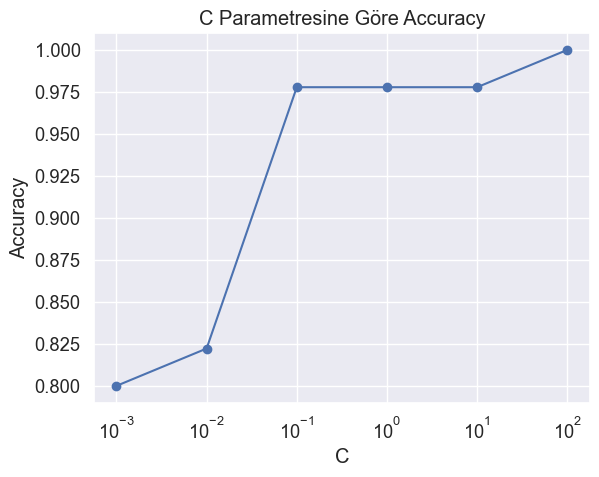

In [232]:
plt.plot(C_values, accuracy_scores, marker='o')
plt.xscale('log')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C Parametresine Göre Accuracy')
plt.grid(True)
plt.show()

Grafikte görüleceği üzere, C parametresinin değeri düşükken (örneğin $10^{-3}$) doğruluk değeri düşüktür. Bunun sebebi, modelin fazla genelleme yapmış olabilme ihtimali ya da eğitim verilerine iyi uymamasıdır. Daha yüksek c değerleri kullanıldığına (örneğin $10^0$ ya da $10^1$), doğruluk değerinin arttığı görülmektedir. Bunun sebebi, modelin eğitim verilerine daha iyi uyması ve test verilerinde daha yüksek performans sergilemesidir. Buna rağmen c parametresinin değeri çok fazla arttığında overfitting oluşabilmektedir. Overfitting sonucunda model yeni gelen verilere uyum sağlayamamaktadır. Yapılması gereken bu dengeyi başarılı bir şekilde sağlayabilmektir.

**Farklı c değerleri için karar sınırlarını görselleştirme**

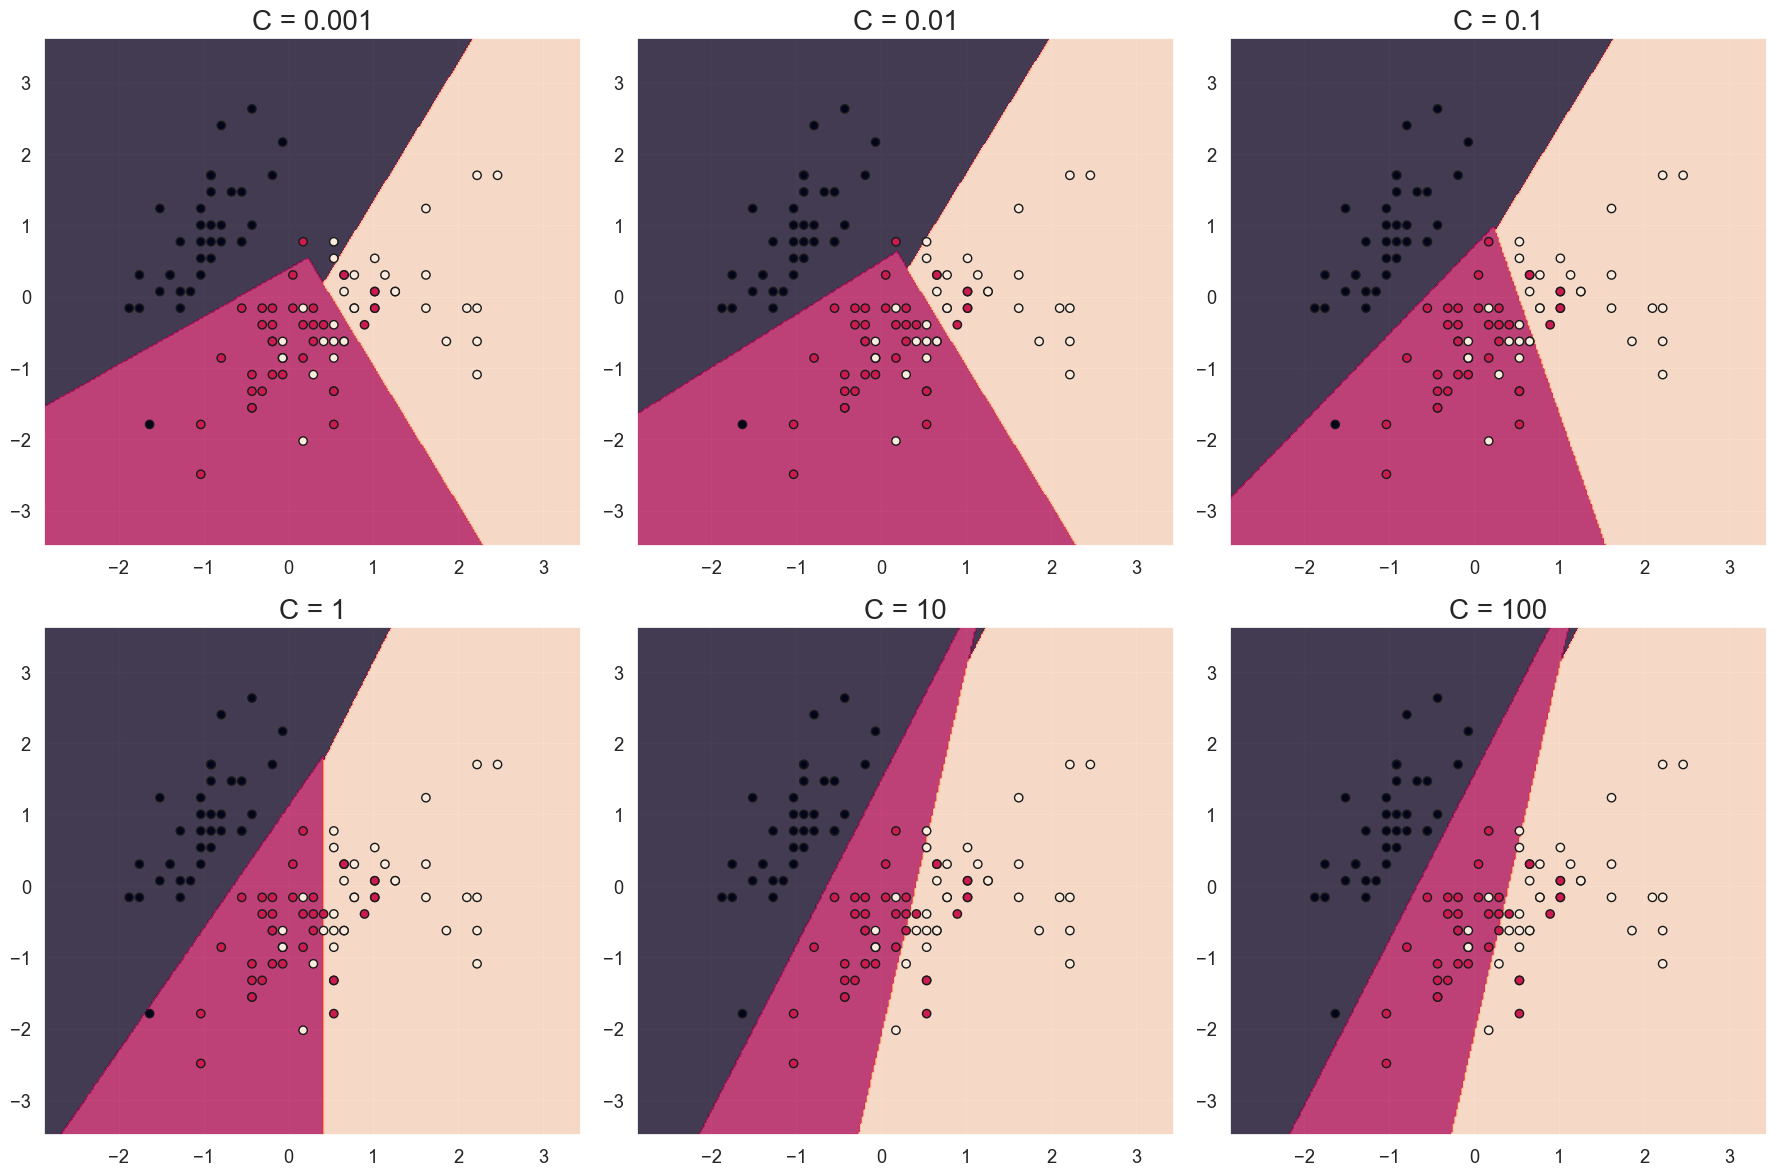

In [233]:
plt.figure(figsize=(18, 12))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, C in enumerate(C_values):
    svm = SVC(kernel='linear', random_state=1, C=C)
    svm.fit(X_train_std[:, :2], y_train) 
    
    h = .02 
    x_min, x_max = X_train_std[:, 0].min() - 1, X_train_std[:, 0].max() + 1
    y_min, y_max = X_train_std[:, 1].min() - 1, X_train_std[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.subplot(2, 3, i + 1)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, edgecolors='k')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('C = {}'.format(C), fontsize=20)
    
plt.tight_layout()
plt.show()

c parametresinin değerine göre değişen karar sınırları incelendiğinde:
* En küçük c değeri için (c = 0.001), sınıflandırmadaki başarının düşük olduğu görülebilmektedir. Bu sebeple model kullanışlı olmamaktadır.

* Orta boyutlu bir c değeri için (c=1), sınıflandırmadaki başarının arttığı görülebilmektedir. Model hem eğitim verilerine daha iyi uyum sağlamıştır hem de yeni eklenecek verilere uyum sağlama yeteneği bulunmaktadır. Bu denge, çoğu Destek Vektör Makineleri yönteminde kullanılması amaçlanmaktadır.

* Yüksek boyutlu bir c değeri için (c=100), model her ne kadar sınıflandırmada başarılı olsa da, eğitim verilerine aşırı uyum sağlamış olma ihtimali bulunmaktadır. Yeni gelen verilere uyum sağlayamama ihtimali çok yüksektir ve bu modelde bir dengesizlik yaratmaktadır.

### Classification

Kernel Ridge Regressor konu başlığının altında Kernel kavramının ne olduğu anlatılmıştı. Kernel kullanımının temel fikrinin doğrusal bir şekilde ayrılamayan bir veri setine, veri setine boyut ekleyerek verilerin karmaşık ilişkilerini yakalayabilme yeteneğini elde edebilmektir. Bu işlem sayesinde doğrusal olmayan ilişkiler daha başarılı bir şekilde modellenebilmektedir.

Aşağıda iki farklı sınıf bulunduran bir veri setinin görseli bulunmaktadır. Bu veri setinin karmaşıklığı sebebiyle doğrusal bir model ile ayırmak, verileri net bir şekilde ayıramayacağı için modeli başarılı yapmayacaktır.  Veri setinin doğrusal bir model ile sınıflandırılmış hali aşağıda gösterilmektedir.

![svmlinearl](svmlinear.png)

Görüldüğü üzere doğrusal model, sınıflandırmada başarılı değildir. Bu tür sınıflandırma problemlerinde doğrusal olmayan bir model kullanmak çözüm sağlamaktadır. Bu seçeneklerden bir tanesi Polynomial Kernel'dır. Polynomial Kernel, verilerin özelliklerini yükseltmekte ve daha kompleks ilişkileri bulmayı amaçlamaktadır. Veriyi daha yüksek bir uzaya taşımaktadır.

![svmpolynomial](svmpolynomial.png) 

Yukarıda görüldüğü üzere Polynomial Kernel doğrusal olmayan bir karar sınırı kullanarak sınıflandırma yapmaktadır. Bir diğer seçenek ise Radial Basis Function'dır (RBF).

![svmradial](svmradial.png)

Radial Basis Function da sınıfları ayırmak için doğrusal olmayan bir karar sınırı kullanmaktadır. Radial Basis Function, Gaussian Distribution'a benzer bir fonksiyon kullanmaktadır ve verileri dairesel bölgeler şeklinde sınıflandırmayı amaçlamaktadır.

Iris veri seti üzerinde (çok sınıflı veri seti) farklı Destek Vektör Makineleri sınıflandırıcılarının karşılaştırılması aşağıda verilmiştir, bu örnekte dört farklı Destek Vektör Makineleri sınıflandırıcısının karar sınırlarının nasıl çizildiği gösterilmektedir:

**Gerekli kütüphanelerin içe aktarılması**

In [234]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

**Veri setinin yüklenmesi (iki boyutlu veri seti için ilk iki özellik alınmıştır)**

In [235]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

**Modelin oluşturulması**

In [236]:
C = 1.0  
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000, dual="auto"),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

**Görselleştirme**

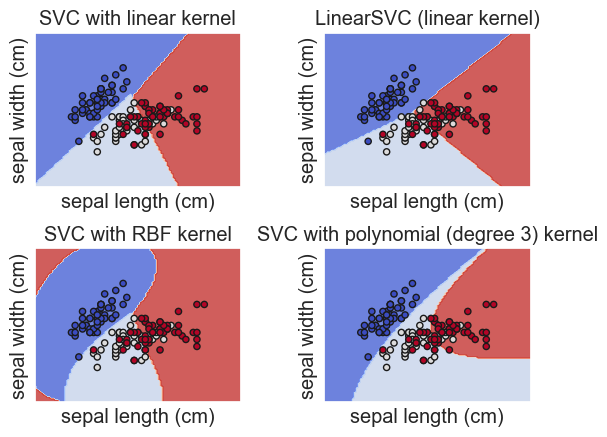

In [237]:
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Regression

Support Vector Regression (SVR), regresyon problemlerini çözmek için kullanılmaktadır. Support Vector Regression'ın temel fikri veriler arasoında bir marjin içerisinde bulunan bir regresyon çizgisi oluşturmaktır. Aşağıda Support Vector Regression ile ilgili bir örnek bulunmaktadır.

![svmregression1](svmregression1.png)

Görselde bulunan mavi kesikli çizgiler "Epsilon Tube" olarak da adlandırılmaktadır. Veri bu bölge içerisinde bulunuyorsa veriye herhangi bir ceza uygulanmamaktadır($\zeta=0$). Veri bu bölgenin dışındaysa veriye ceza uygulanmaktadır ($\zeta>0$). Kernel Ridge Regression konusu altında Kernel tipleri anlatılmıştı ve Radial Basis Function'a ait matematiksel gösteriminin : $$exp(-\xi||x-x^2||^2)$$ şeklinde olduğu gösterilmişti. Peki Radial Basis Function nasıl çalışmaktadır? Bu sorunun cevabını aşağıdaki veri seti için cevaplaryalım.

![howdoesrbfworks](howdoesrbfworks.png)

Veri setine yeni bir veri ($x^{*}$) eklendiğini düşünelim. Bu verinin sınıfını belirlemek istiyorsunuz. Radial Basis Function Kernel, bu yeni verinin diğer eğitim verisi noktalarına olan benzerliğini değerlendirmektedir. Eğer öklidyen uzaklık yüksekse:$$
\sum_{j=1}^{p} (x_j - x_{ij})^2
$$ bu $x^{*}$ verisinin diğer verilere göre daha uzakta olduğunu göstermektedir ve bu nedenle onların sınıfını etkilemeyecektir. Öklid işleminin sonucu olarak $x^{*}$ ile $x_1$ arasındaki mesafe çok daha büyük olacaktır. Bu işlemden edilen değer, $$exp(-\gamma\sum_{j=1}^{p} (x_j - x_{ij})^2)$$

formülüne koyulduğunda ise çok küçük bir değer ortaya çıkmaktadır. Bunun sonucunda $x_1$ noktasının $x^{*}$ noktasını sınıflandırmak için kullanılan karar fonksiyonuna etkisi yoktur. Bu da en yakın verinin en yüksek etki sahibi olacağı anlamına gelmektedir. Yani, $x_2$ noktası, karar fonksiyonunun ne olacağına karar vermektedir


Scikit-Learn'de Destek Vektör Makineleri yönteminin farklı problemlerinde kullanılabilecek farklı uygulamaları bulunmaktadır. Üç farklı problem için kullanılabilecek uygulamalar aşağıda verilmiştir.

**Classification:**
* SVC
* LinearSVC
* NuSVC

**Regression:**
* SVR
* LinearSVR
* NuSVR

**Outlier Detection:**
* OneClassSVM

Classification problemlerinde kullanılan NuSVC ile Regression problemlerinde kullanılan NuSVR arasındaki fark, c parametresi yerine regularizasyon ayarlarının yapılmasını sağlayan "nu" parametresinin kullanılmasıdır. Bu parametre 0 ile 1 arasında bir değer almakta ve modelin esnekliğini ayarlamaktadır. nu parametresinin değeri azaldıkça modelin esnekliği de azalmaktadır. 

Verilen yöntemler için kullanılabilecek kernel tipleri şu şekildedir:

**Classification:**

| Model      | Kullanabileceği Kernel Tipleri                     |
|------------|---------------------------------|
| SVC        | Linear, Poly, RBF, Sigmoid, Precomputed                    |
| LinearSVC  | Linear                          |
| NuSVC      | Linear, Poly, RBF, Sigmoid, Precomputed |

**Regression:**

| Model      | Kullanabileceği Kernel Tipleri                     |
|------------|---------------------------------|
| SVR       | Linear, Poly, RBF, Sigmoid, Precomputed                    |
| LinearSVR | Linear                          |
| NuSVR      | Linear, Poly, RBF, Sigmoid, Precomputed |

**Outlier Detection:**

| Model      | Kullanabileceği Kernel Tipleri                     |
|------------|---------------------------------|
| OneClassSVM       | Linear, Poly, RBF, Sigmoid, Precomputed                    |

**Support Vector Classifier vs Support Vector Regression**

Support Vector Classifier ve Support Vector Regression yöntemlerinin ikisi de Destek Vektör Makineleri temelli algoritmalardır. Support Vector Classifier yöntemi, iki ya da daha fazla sınıf arasında doğru bir şekilde ayrım yapmak için kullanılmaktadır. Support Vector Regression yöntemi ise sayısal bir hedef değişkeni olan regresyon problemlerinde kullanılmaktadır. 

**Support Vector Classifier**

Support Vector Classifier yönteminin matematiksel gösterimi: $$\min_{(w, b, \zeta)} \frac{1}{2} w^T w + C \sum_{i=1}^{n} \zeta_i$$

şeklindedir. Formüldeki sembollerin anlamları aşağıdaki tabloda verilmiştir.

| Sembol   | Açıklama                                                      |
|-------|------------------------------------------------------------------------
| $\zeta$ |Verilerin karar sınırına olan uzaklığı |
| $C$   | Regularizasyon parametresi               |
| $n$   | Eğitim veri setindeki örneklerin sayısı                               |
| $w$   | Ağırlık|

![SVCvsSVR1](SVCvsSVR1.png)

**Support Vector Regression**

Support Vector Regression yönteminin matematiksel gösterimi: $$\min_{(w, b, \zeta)} \frac{1}{2} w^T w + C \sum_{i=1}^{n} (\zeta_i + \zeta_i^*)$$ şeklindedir. Formüldeki sembollerin anlamları aşağıdaki tabloda verilmiştir.

| Sembol   | Açıklama                                                      |
|-------|------------------------------------------------------------------------
| $\zeta$ |Epsilon tüpünün üstünde ya da altındaki gevşeklik|
| $\zeta_i^*$ |Epsilon tüpünün üstünde ya da altındaki gevşeklik |
| $C$   | Regularizasyon parametresi               |
| $n$   | Eğitim veri setindeki örneklerin sayısı                               |
| $w$   | Ağırlık|

![SVCvsSVR2](SVCvsSVR2.png)

**Karşılaştırma:**

Support Vector Classifier ve Support Vector Regression yöntemlerinin matematiksel gösterimleri ve algoritma görselleştirmeleri incelendiğinde belli farklar göze çarpmaktadır. Bunlardan ilki, Support Vector Classifier yönteminde veriler, karar sınırının dışında tutulmak istenir. Support Vector Regression yönteminde ise verilerin epsilon tüpünün içerisinde yer alması amaçlanmaktadır. Buna ek olarak Support Vector Classifier yönteminde karar sınırının doğru tarafında bulunsa dahi karar sınırı içerisinde bulunan verilere küçük de olsa cezalar uygulanmaktadır. Yani, $\zeta=0$, $\zeta<0$ ve $\zeta>0$ durumları mevcuttur. Support Vector Regression yönteminde ise verilerin marjin boşluğu içerisinde bulunup bulunmama durumlarına göre sırasıyla $\zeta=0$ ve $\zeta>0$ işlemleri yapılmaktadır.

**Class Weight vs Sample Weight**

**Class Weight(class_weight):**

Class Weight (Sınıf Ağırlığı), sınıflar arasında dengesizlik bulunan veri setlerinde kullanılmakta olan bir parametredir. Bir sınıfta bulunan veri sayısı, diğer sınıfta bulunan veri sayısından çok daha fazla ya da az sayıdaysa Destek Vektör Makineleri modeli oluştururken sınıflara ağırlık atanabilmektedir. Atanan ağırlık sayesinde, model az sayıda veri bulunduran sınıfı öne çıkarmakta ve az sayıda veri bulunduran sınıfı daha iyi tanıyabilmektedir. 

Aşağıda dengesiz bir veri setine ilk olarak class weight uygulanarak, sonrasında ise class weight uygulanmadan yapılmış iki adet modellemenin görselleştirmesi bulunmaktadır.

![classweightsk](classweightsk.png)

Görselden anlaşılacağı üzere, sınıf ağırlıkları kullanılarak az sayıda veri bulunduran sınıfa daha yüksek bir ağırlık atandığında, model az sayıda veri bulunduran sınıfı daha rahat bir şekilde tanıyabilmektedir. Dikkat edilmesi gereken bir konu ise ağırlıkların yanlış ayarlanması, modelin tüm odağının az sayıda veri bulunduran sınıfa kaymasına sebep olmakta ve çok veri bulunduran sınıfı görmezden gelmesine yol açmaktadır. 

**Sample Weight(sample_weight):**

Sample weight (Örnek Ağırlığı), model eğitiminde kullanılacak bir verinin ne kadar önemli olduğunu ayarlamak için kullanılan bir parametredir. Makine öğrenmesi modellerinde bazı veriler, diğer verilere göre daha belirleyici olabilmektedir. Böyle durumlarda örnek ağırlığı kavramı devreye girer. Aşağıda örnek ağırlığının karar sınırına etkisini gösteren bir görsel bulunmaktadır. Görselde bulunan dairelerin boyutları, örnek ağırlıklarına orantılıdır.

![sampleweight](sampleweight.png)

| Parametre      | Kullanılabileceği Yöntemler               |
|----------------|-----------------------------------------|
| class_weight   | SVC, NuSVC, LinearSVC                   |
| sample_weight  | SVC, NuSVC, LinearSVC, SVR, NuSVR, LinearSVR, OneClassSVM |


### Density estimation, novelty detection

**OneClassSVM:** 

OneClassSVM (One-Class Support Vector Machine), aykırı değer tespitinde kullanılmakta olan bir algoritmadır. OneClassSVM'in çalışma mantığı, normal verileri bir sınıf olarak kabul ederken aykırı değerleri farklı bir sınıf olarak kabul etmesi ve bu anlayış üzerine işlem yapmasıdır. 

Aşağıda farklı aykırı değer tespiti algoritmalarının çalışma mantığını görselleştiren bir kod örneği bulunmaktadır. Her veri setinin %15'i uniform gürültü olarak oluşturulmuştur ve bu değer, OneClassSVM'in "nu" parametresine ve diğer aykırı değer tespit algoritmalarının "contamination" parametresine verilen değerdir. Aykırı değer tespiti algoritmalarının karar sınırları siyah renkli olarak gösterilmiştir. OneClassSVM'in, aykırı değerlere fazla hassasiyet göstermesi sebebiyle en verimli aykırı değer tespiti algoritmalarından biri olmadığı bilinmektedir. OneClassSVM algoritması, eğitim veri setinde aykırı değerler bulunmayan, yeni nesne tespit etme gibi işlemlerde daha etkilidir. SGDOneClassSVM algoritması ise stokastik gradyan inişi temelli bir OneClassSVM yöntemidir. SGDOneClassSVM'in  OneClassSVM kullanmaya göre en önemli avantajı, veri sayısıyla doğrusal bir şekilde ölçeklenebilmesidir. Bunun sonucunda SGDOneClassSVM, OneClassSVM'e kıyasla büyük veri setlerinde daha verimli bir şekilde çalışabilmektedir.

**Gerekli kütüphanelerin içe aktarılması**

In [238]:
import time
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs, make_moons
from sklearn.ensemble import IsolationForest
from sklearn.kernel_approximation import Nystroem
from sklearn.linear_model import SGDOneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.pipeline import make_pipeline

**Ayarlar ve parametreler**

In [239]:
matplotlib.rcParams["contour.negative_linestyle"] = "solid"

n_samples = 300
outliers_fraction = 0.15
n_outliers = int(outliers_fraction * n_samples)
n_inliers = n_samples - n_outliers

**Aykırı değer tespiti algoritmalarının tanımlanması**

In [240]:
anomaly_algorithms = [
    (
        "Robust covariance",
        EllipticEnvelope(contamination=outliers_fraction, random_state=42),
    ),
    ("One-Class SVM", svm.OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.1)),
    (
        "One-Class SVM (SGD)",
        make_pipeline(
            Nystroem(gamma=0.1, random_state=42, n_components=150),
            SGDOneClassSVM(
                nu=outliers_fraction,
                shuffle=True,
                fit_intercept=True,
                random_state=42,
                tol=1e-6,
            ),
        ),
    ),
    (
        "Isolation Forest",
        IsolationForest(contamination=outliers_fraction, random_state=42),
    ),
    (
        "Local Outlier Factor",
        LocalOutlierFactor(n_neighbors=35, contamination=outliers_fraction),
    ),
]

**Veri setinin oluşturulması**

In [241]:
blobs_params = dict(random_state=0, n_samples=n_inliers, n_features=2)
datasets = [
    make_blobs(centers=[[0, 0], [0, 0]], cluster_std=0.5, **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[0.5, 0.5], **blobs_params)[0],
    make_blobs(centers=[[2, 2], [-2, -2]], cluster_std=[1.5, 0.3], **blobs_params)[0],
    4.0
    * (
        make_moons(n_samples=n_samples, noise=0.05, random_state=0)[0]
        - np.array([0.5, 0.25])
    ),
    14.0 * (np.random.RandomState(42).rand(n_samples, 2) - 0.5),
]

**Görselleştirme**

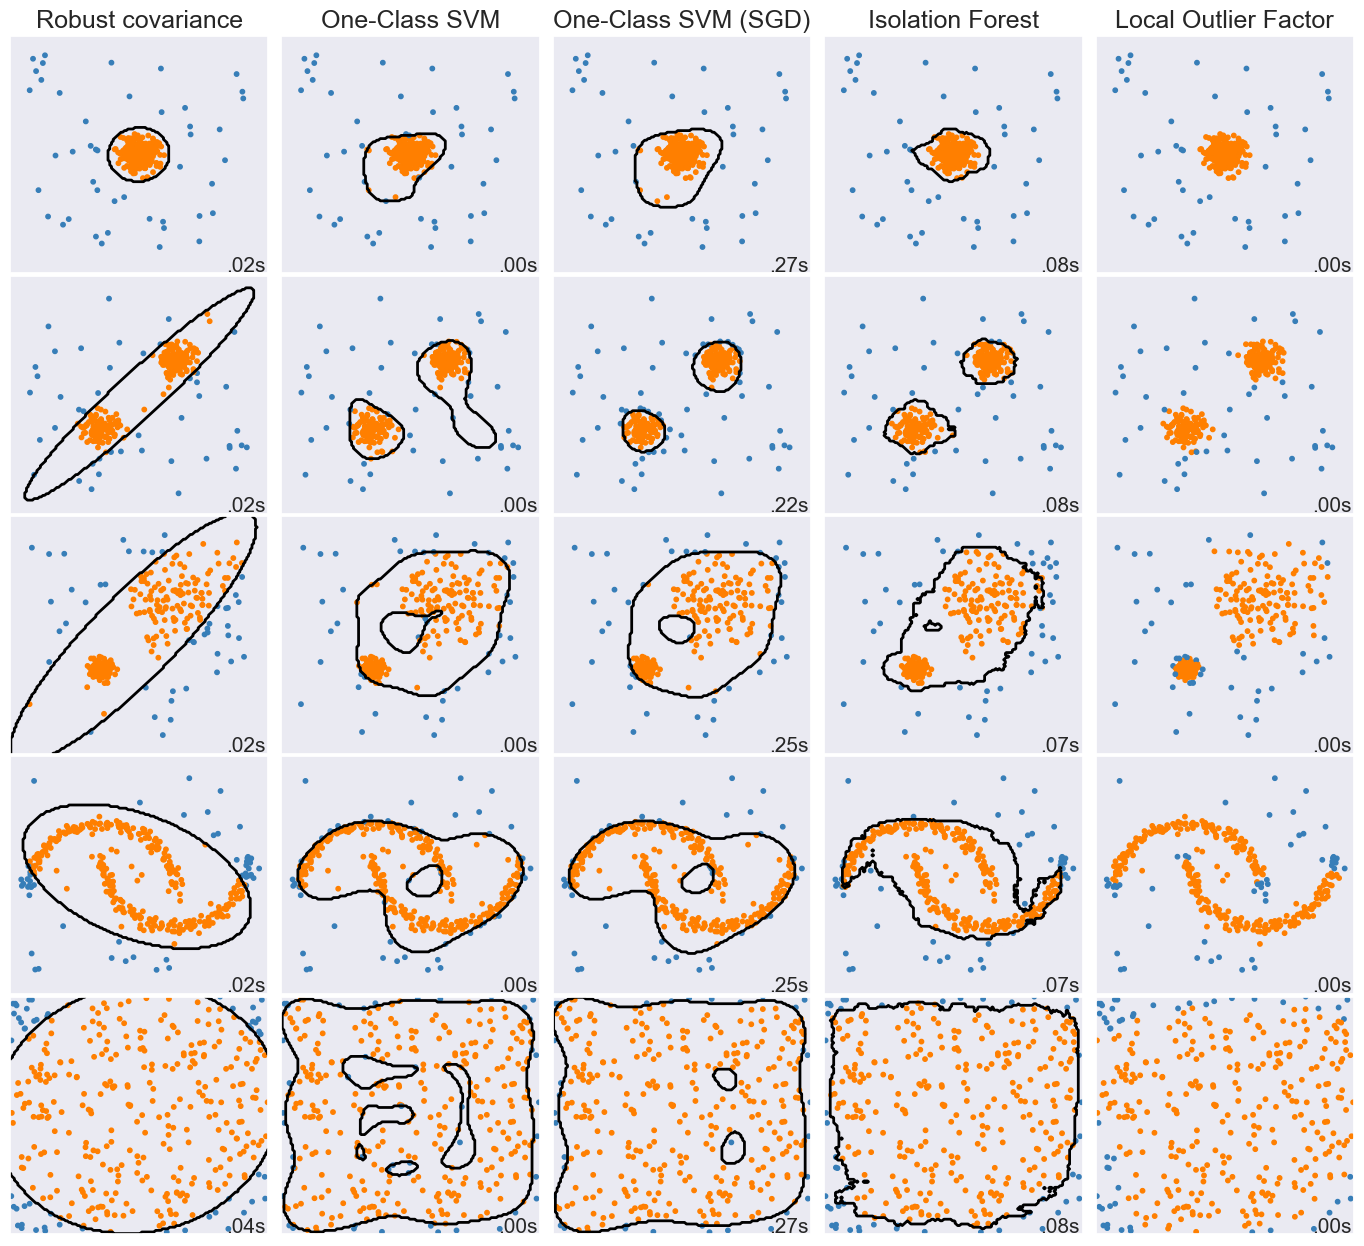

In [242]:
xx, yy = np.meshgrid(np.linspace(-7, 7, 150), np.linspace(-7, 7, 150))

plt.figure(figsize=(len(anomaly_algorithms) * 2 + 4, 12.5))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

plot_num = 1
rng = np.random.RandomState(42)

for i_dataset, X in enumerate(datasets):
    
    X = np.concatenate([X, rng.uniform(low=-6, high=6, size=(n_outliers, 2))], axis=0)

    for name, algorithm in anomaly_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        plt.subplot(len(datasets), len(anomaly_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        
        if name == "Local Outlier Factor":
            y_pred = algorithm.fit_predict(X)
        else:
            y_pred = algorithm.fit(X).predict(X)

        
        if name != "Local Outlier Factor":  
            Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="black")

        colors = np.array(["#377eb8", "#ff7f00"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[(y_pred + 1) // 2])

        plt.xlim(-7, 7)
        plt.ylim(-7, 7)
        plt.xticks(())
        plt.yticks(())
        plt.text(
            0.99,
            0.01,
            ("%.2fs" % (t1 - t0)).lstrip("0"),
            transform=plt.gca().transAxes,
            size=15,
            horizontalalignment="right",
        )
        plot_num += 1

plt.show()

### Complexity 

Destek Vektör Makineleri her ne kadar güçlü yöntemler olsa da eğitim verisi arttıkça hesaplama ve depolama gereksinimi hızla artmaktadır. Destek Vektör Makineleri'nin ana amacı, verileri iki ya da daha fazla sınıfa başarılı bir şekilde ayırmaktır. Bu işlem, destek vektörleri olarak adlandırılan veriler ile geri kalan verilerin arasındaki mesafeyi maksimize etmektedir. Destek Vektör Makineleri'nin çekirdeği, bu destek vektörlerini diğer verilerden ayıran bir matematiksel problemi çözmektedir ve bu problem, ikinci dereceden programlama sorunu olarak adlandırılmaktadır (QP). Destek Vektör Makineleri, "libsvm" kütüphanesini kullanarak bu ikinci dereceden programlama sorununu çözmek için bir QP çözücüsü kullanmaktadır ancak bu çözücü, eğitim verilerinin boyutlarına ve sayısına bağlı şekilde hesaplama karmaşıklığı göstermektedir. Eğitim verilerinin boyutları (özellik sayısı) arttıkça ve veri sayısı çoğaldıkça, çözücünün gereksinim duyduğu hesaplama kaynakları da artmaktadır.

"libsvm" tabanlı uygulama tarafından kullanılan ikinci dereceden programlama QP çözücüsü, hesaplama gereksinimleri veri setinin özellik sayısı (n_features) ve örnek sayısı (n_samples) gibi özelliklere bağlı olarak değişmektedir. Bu hesaplama gereksinimleri genellikle $O(n_{features} \times n^2_{samples})$ ile $O(n_{features} \times n^3_{samples})$ arasında ölçeklenmektedir.

### Tips on Practical Use

* **Veri Kopyasından Kaçınma:** SVC, SVR, NuSVC ve NuSVR algoritmaları için verilen veri, C-düzenli ardışık ve çift hassasiyetli değilse, bu veri altındaki C uygulamasını çalıştırmadan önce kopyalanacaktır. Bir numpy dizisinin C-düzenli ardışık olup olmadığını anlamak için "flags" özelliği kullanılarak kontrol edilebilmektedir.

In [1]:
import numpy as np

data = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

if data.flags['C_CONTIGUOUS']:
    print("C-düzenli ardışık")
else:
    print("C-düzenli ardışık değil")

C-düzenli ardışık



* **Çekirdek Önbellek Boyutu:** SVC, SVR, NuSVC ve NuSVR için çekirdek önbellek boyutu, daha büyük problemlerde çalışma sürelerini büyük ölçüde etkilemektedir. Yeterli RAM kapasitesi mevcutsa varsayılan 200(MB) değerinden daha yüksek bir önbellek boyutu kullanmanız önerilmektedir

* **C Değerinin Ayarlanması**: C değerinin varsayılan değeri 1'dir. Eğer gürültülü gözlemler mevcutsa, C değerini azaltılmalıdır. C'yi azaltmak daha fazla düzenleme anlamına gelmektedir. C değeri arttıkça, LinearSVC ve LinearSVR daha az hassas hale gelmekte ve belirli bir sınırı geçtikten sonra tahmin sonuçları artık gelişmemektedir. Buna ek olarak daha büyük C değerleri daha uzun süre eğitim almaktadır.

Destek Vektör Makineleri algoritmaları, verilerin ölçeklendirmesine göre farklılık göstermemektedir. Modelin, veri setinin ölçeklendirmesine bağlı olmadan daha iyi eğitilebilmesi amacıyla verilerin ölçeklendirilmesi önemlidir. Her özellik [0,1] aralığına ölçeklendirilebilir. Bu işlem, her bir özelliğin 0 ile 1 aralığında değer aldığı anlamına gelmektedir. Benzer şekilde her özelliği [-1,+1] aralığında da ölçeklendirilebilir.

Her özelliğin ortalaması 0 ve varyansı 1 olacak şekilde standardize edilmesi de sık kullanılan ölçeklendirme yöntemlerinden biridir. Bu yöntem, özellik değerlerini dağılımlarına göre ayarlamakta ve verinin farklı özellikleri birbirine daha yakın bir ölçekte bulunmasını sağlamaktadır.

Ölçeklendirme işlemi, eğitim verilerinin yanı sıra test verilerine de uygulanmalıdır. Aynı ölçeklendirme yöntemleri test verisi üzerinde de kullanılarak modelin eğitim ve test verilerini tutarlı bir şekilde işlenmesi sağlanabilmektedir.

Bu ölçeklendirme işlemini kolayca gerçekleştirmek için "Pipeline" adı verilen bir yapı kullanılmaktadır. Pipeline yapı, veri önişleme adımlarını sıralı olarak gerçekleştirmekte ve ardından Destek Vektör Makineleri ya da diğer yöntemlerle eğitimi yapmaktadır. 

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC())

* **Altta yatan uygulamaların rastgeleliği:** SVC ve NuSVC, olasılık tahmininde veriyi karıştırmak için yalnızca olasılık "True" olduğunda rastgele sayı üretmektedir. Rastgelelik "random_state" ile kontrol edilmektedir. Olasılık "False" ise tahminciler rastgele değildir ve "random_state" etki oluşturmaz. OneClassSVM yönteminde de olasılık tahmini bulunmamaktadır.


<center>

# Nearest Neighbor

</center>

"sklearn.neighbors", scikit-learn kütüphanesinin bir parçasıdır ve denetimsiz ve denetimli komşu tabanlı öğrenme yöntemlerini uygulamak için kullanılmakta olan bir modüldür. Bu kütüphane, özellikle sınıflandırma, regresyon, manifold öğrenme ve kümeleme gibi çeşitli makine öğrenimi görevlerinde etkili olan en yakın komşu (k-NN) yöntemlerini içermektedir. İşlevselliği, verilerin birbirlerine olan benzerliğine dayanan bu yöntemlerin temel prensiplerine dayanmaktadır.

**Denetimsiz Komşu Yakınlığı (Unsupervised Neighbor-based Methods):**

Denetimsiz komşu yakınlığı, verilerin birbirlerine olan benzerliklerine dayalı olarak verileri bir araya getirme ve gruplama yöntemlerine hizmet etmektedir. Manifold öğrenme ve spektral kümeleme gibi teknikler bu temelden türetilmiştir. Bu yaklaşımda, veri noktalarının birbirlerine olan uzaklıklarına dayalı olarak veri kümesinin yapısı anlaşılmakta ve benzer veri noktaları bir araya toplanmaktadır.

**Denetimli Komşu Tabanlı Öğrenme (Supervised Neighbor-based Learning):**

Denetimli komşu tabanlı öğrenme, sınıflandırma ve regresyon gibi denetimli öğrenme görevlerini ele almaktadır. Sınıflandırmada, verilerin etiketleri (sınıflar) kullanılarak yeni bir verinin sınıfının tahmin edilmesi amaçlanmaktadır. Regresyonda ise, verilerin etiketleri (sürekli değerler) kullanılarak yeni bir verinin değerinin tahmin edilmesi hedeflenmektedir. Bu yöntemde, bir verinin tahmini yapılırken, bu noktaya en yakın komşu noktaların etiketleri veya değerleri kullanılmaktadır.

En yakın komşuluk yöntemleri, bir verinin tahminini yaparken, bu noktaya en yakın komşu noktaların etiketlerini veya değerlerini kullanmaktadır. Bu komşular, noktanın etrafındaki alandaki veri yoğunluğuna veya belirli bir uzaklık sınırına bağlı olarak seçilmektedir. Bu yöntemler, genellikle sınıflandırma ve regresyon problemlerinde iyi performans göstermekte ve parametrik olmayan bir yaklaşım olduğu için karmaşık karar sınırları ile başa çıkabilmektedir.

sklearn.neighbors modülü, girdi olarak NumPy dizilerini veya seyrek scipy matrislerini kabul edebilmektedir. Yoğun matrisler için farklı mesafe metrikleri desteklenirken, seyrek matrisler için farklı Minkowski metrikleri kullanılarak aramalar yapılabilmektedir. Bu modül, çeşitli en yakın komşu temelli öğrenme rutinlerini içerir ve makine öğrenimi projelerinizde bu tür yaklaşımları uygulamak için kullanılabilmektedir.

## Unsupervised Nearest Neighbors

NearestNeighbors, denetimsiz en yakın komşu öğrenimini gerçekleştiren bir yapıdır. Bu yapı, üç farklı en yakın komşu algoritmasına (BallTree, KDTree ve sklearn.metrics.pairwise tarafından sağlanan işlemlere dayalı brute-force algoritması) arayüz sağlar. Algoritmanın hangi en yakın komşu arama yöntemiyle çalışacağı, 'algorithm' anahtar kelimesi ile kontrol edilir ve bu değerlerden birini alabilir: **['auto', 'ball_tree', 'kd_tree', 'brute']**. Varsayılan olarak 'auto' değeri kullanıldığında, algoritma en iyi yaklaşımı eğitim verilerine bakarak otomatik olarak seçmeye çalışır.

**Brute Force**

Makine öğrenmesi alanındaki çalışmalarda, en yakın komşunun olabildiğince hızlı şekilde bulunabilmesi çok önemlidir. Veri sayısı ve özellik sayısı arttıkça bu işlemi gerçekleştirmek de zorlaşmaktadır. Veriler arasındaki mesafeleri hesaplayabilmek için kullanılan en temel yaklaşım Brute Force yöntemidir. Brute Force yönteminde, veri kümesi içindeki her verinin, kalan tüm verilerle ilişkisi incelenmekte ve bu incelemeler sonucunda en yakın komşu belirlenmektedir. Brute Force yöntemi, büyük veri setlerinde kullanıldığında çok yüksek maliyete sebep olmaktadır ve oldukça yavaş çalışmaktadır.

Brute Force yönteminin kullanımı, "algorithm = 'brute'" gösterimiyle belirtilmektedir. Brute Force yönteminin karmaşıklığı, D boyutlu bir veri seti için $O[ND^2]$ şeklindedir

Aşağıda Brute Force algoritmasının çalışma mantığı görselleştirilmiş ve anlatılmıştır.

Varsayalım ki elimizde aşağıdaki görseldeki gibi mavi veriler mevcut ve bu verilere kırmızı G=(6,5) verisi ekleniyor. Yeni eklenen verinin en yakın komşusunu Brute Force algoritması ile bulmaya çalışıyoruz.

![bruteforce1](bruteforce1.png)

Brute Force algoritması ile, yeni verinin mevcut tüm veriler ile olan mesafesi karşılaştırılmaktadır. 

![bruteforce2](bruteforce2.png)

Yeni veri ile uzaydaki tüm veriler karşılaştırıldığında elde edilen sonuçlara göre, yeni veriye en kısa mesafede olan nokta en yakın komşu olarak seçilmektedir.

![bruteforce3](bruteforce3.png)

---

**KDTree**

Brute Force algoritmasının hesaplamadaki verimsizlikleri, büyük veri setleri üzerinde yapılan en yakın komşu araması gibi işlemleri çok yavaş hale getirebilmektedir. Bu verimsizlik sorununu çözmek için veriyi daha akıllıca düzenleyen ve mesafe hesaplamalarının sayısını azaltan ağaç tabanlı veri yapıları geliştirilmiştir.

Ağaç tabanlı veri yapılarının ana fikri, veriyi hiyerarşik bir yapıda düzenleyerek mesafe hesaplamalarını azaltmaktır. Örneğin, eğer A noktası B noktasından çok uzaksa ve B noktası C noktasına çok yakınsa, o zaman A ve C noktalarının mesafesi hesaplanmadan da çok uzak oldukları anlaşılabilir. Bu nedenle, mesafe hesaplamalarını sadece gerektiği zaman yapmak, hesaplama süresini büyük ölçüde azaltabilir.

Bu ağaç tabanlı veri yapılarından biri KDTree'dir. Bu yapı, 2D Quad-ağaçlarını ve 3D Oct-ağaçlarını çok sayıda boyuta genelleştirir. KD ağacı, veri noktalarını bir ikili ağaç yapısında düzenler. Bu ağaç, veri eksenleri boyunca parametre uzayını bölerek iç içe geçmiş dikdörtgensel bölgelere böler ve veri noktalarını bu bölgelere yerleştirir. İnşası çok hızlıdır çünkü sadece veri eksenleri boyunca bölmeler yapılırken D boyutlu mesafeler hesaplanmaz.

KDTree'nin en büyük avantajlarından biri, bir sorgu noktasının en yakın komşusunu bulmak için sadece $O[log(N)]$ mesafe hesaplaması gerektirmesidir. Bu işlem, veriyi hızlı bir şekilde sıralayabilmesi anlamına gelmektedir.KDTree algoritması, D boyutu çok büyük olduğunda etkisiz hale gelebilmektedir ve bu "curse of dimensionality (boyutların laneti)" olarak adlandırılmaktadır.

KDTree algoritması, "algorithm ='kd_tree'" ile gösterilmektedir.

Aşağıda KDTree algoritmasının çalışma mantığı adım adım görselleştirilmiş ve anlatılmıştır. 

Varsayalım ki elimizde aşağıdaki görselde gösterilen şekilde bir veri seti bulunmakta.

![kdtree1](kdtree1.png)

KDTree algoritmasının çalışma adımları şu şekilde gösterilebilir:

1. Rastgele bir veriyi seç
2. Ortancayı bul
3. Veri kümesini yaklaşık olarak eşit iki parçaya böl
4. Bir sonraki özelliği seç, adım 2 ve 3'ü tekrarla
5. Tüm veriler bölünene kadar devam et

Bu adımlara göre veri setine KDTree algoritmasını uygulayalım. 

$$ (x,y) \rightarrow (1,2),(2,6),(3,4),(5,6),(7,8),(8,3)$$

$$ x \rightarrow 1,2,3,5,7,8 \rightarrow \text median, x = 4$$

$x=4$ üzerinden veriler iki bölüme ayrılmıştır.

![kdtree2](kdtree2.png)

$x$ özelliğine bakıldıktan sonra y özelliği için bu işlem yapılacaktır. Dikkat edilmesi gereken şey veri setinin ikiye bölünmüş olduğudur ve $y$ için bu işlemin iki taraf için de yapılacak olmasıdır.

**Sol:**

$$y \rightarrow 2,4,6 \rightarrow median, y=4$$

Bu sebeple $y=4$ üzerinden tekrar ayırma işlemi gerçekleştirilmiştir.

![kdtree3](kdtree3.png)

**Sağ:**

$$y \rightarrow 3,6,8 \rightarrow median, y=6 $$

$y=6$ üzerinden ayırma işlemi gerçekleştirilmiştir. 

![kdtree4](kdtree4.png)

Aynı adım sol alt için tekrarlanmıştır.

$$ x \rightarrow 1 \rightarrow median, x = 1 $$

$x=1$ üzerinden ayırma işlemi yapılmıştır. 

![kdtree5](kdtree5.png)

Aynı adım sol üst için yapılmıştır.

$$x \rightarrow 2 \rightarrow median, x=2 $$

$x=2$ üzerinden ayırma işlemi yapılmıştır. 

![kdtree6](kdtree6.png)

Aynı adımlar sırasıyla sağ üst ve sağ alt kısım için de uygulanmıştır ve böylece 

                1
        2               3
    4       5       6        7

şeklinde bir ağaç yapısı oluşturulmuştur.

![kdtree8](kdtree8.png)

Oluşturulan yapı kullanılarak yeni eklenen bir verinin en yakın komşusu bulunmak istenmektedir. G=(6,5) verisinin yeni eklenmiş bir veri olduğunu varsayalım ve bu verinin en yakın komşusunu bulalım.

![kdtree9](kdtree9.png)

Yeni verinin sahip olduğu özellikler incelenerek en yakın komşuyu bulmak için ağaç yapısı üzerinde ilerlendiğinde aşağıdaki şekildeki ilerleme kaydedilmektedir.

![kdtreeşema](kdtreeşema.png)

6 noktasında bulunan (8,3) verisine gelinmiştir ve yeni verinin bu noktaya olan mesafesi hesaplanır. Bu mesafe hesaplandığında 2.83 olduğu görülmektedir.

![kdtree10](kdtree10.png)

2.83, şu anlık sahip olunan en kısa mesafedir ancak kesişen bitişik bölmelerdeki verilere olan uzaklığın da incelenmesi gerekmektedir. Bitişik verilerle olan mesafe incelendiğinde en yakın komşunun (5,6) verisi olduğu ve mesafenin 1.41 olduğu görülmektedir.

![kdtree11](kdtree11.png)


Böylece en kısa mesafe 1.41 olarak, en yakın komşu ise (5,6) verisi olarak güncellenmiştir. KDTree algoritmasının çalışma mantığı bu şekildedir.

---

**BallTree**

BallTree algoritması da KDTree gibi en yakın komşuyu bulmak için kullanılan bir algoritmadır. Veri ve özellik sayısı arttıkça KDTree algoritması verimsizliklere yol açabilmektedir. Bu sorunu çözmek için BallTree algoritması geliştirilmiştir.

KDTree algoritması, veriyi bir planlamaya göre düzlemlere bölmekte ve bölünen kısımları kullanarak veriyi sıralamaktadır. Yüksek boyutlu verilerde bu ağaçlar verimsiz hale gelebilir çünkü çok sayıda düzlem ve bölmeye ihtiyaç duyabilirler. Bu durumda BallTree algoritması devreye girmektedir.

BallTree algoritması, veriyi iç içe geçmiş hiperkürelere bölmektedir. Her düğüm, bir merkez (C) ve bir yarıçap (r) tarafından tanımlanan bir hiperküre içermektedir ve bu hiperküre içindeki tüm noktalar o düğümün altındadır. Bu yapı, "triangle inequality (üçgen eşitsizliği)" olarak adlandırılan bir özelliği kullanarak komşu arama işlemlerini optimize etmektedir. Üçgen eşitsizliği, iki nokta arasındaki mesafenin, iki noktanın merkeze olan mesafesinden daha büyük olamayacağını göstermektedir:

$$|x + y| \leq |x| + |y|$$

Bu anlayışa göre komşu arama işlemini gerçekleştiren BallTree, yüksek boyutlu verilerde KDTree'ye göre daha verimli olabilmektedir.

BallTree algoritması, "algorithm ='ball_tree'" ile gösterilmekte ve BallTree sınıfı kullanılarak hesaplamaktadır. Buna ek olarak kullanıcılar BallTree sınıfıyla direkt olarak çalışabilirler.

Aşağıda BallTree algoritmasının çalışma mantığı adım adım görselleştirilmiş ve anlatılmıştır. 

Varsayalım ki elimizde aşağıda bulunan görseldeki gibi bir veri seti mevcut.

![balltree1](balltree1.png)


BallTree algoritması ile bu veri setine eklenen bir verinin en yakın komşusunu bulmaya çalışalım. BallTree algoritmasının çalışma adımları şu şekildedir:

1. Herhangi bir nokta seçilir.
2. Bu noktaya en uzak nokta bulunur.
3. Bulunan en uzak noktaya en uzak nokta bulunur.
4. En uzak iki noktanın birleştirdiği doğru üzerine veri setindeki tüm noktalar yansıtılır.
5. Yansıtılmış nokta merkezini bulmak için ağırlık merkezi hesaplanır.
6. Her iki yarı için ağırlık merkezine en uzak mesafedeki noktaya bir daire çizilir.

Yukarıdaki görseldeki veri setinde rastgele bir nokta olarak (5,6) noktası seçilmiş ve ilk adım tamamlanmıştır. Şimdi diğer adımları görselleştirelim.

![balltree2](balltree2.png)


Sırasıyla 2. ve 3. adım gerçekleştirilmiştir. İlk olarak (5,6) noktasına en uzak nokta olan (1,2) noktası; devamında ise (1,2) noktasına en uzak nokta olan (7,8) noktası seçilmiştir.

![balltree3](balltree3.png)

İlk 3 adım gerçekleştirilmiş ve en uzak iki nokta bulunmuştu. 4. adım olarak en uzak iki noktayı birleştiren bir doğru çizildi ve bu doğru üzerine veri setindeki tüm veriler yansıtıldı.

![balltree4](balltree4.png)


İlk 4 adım gerçekleştirildi. 5. adım olarak yansıtılmış noktaların ağırlık merkezleri bulunmuştur. Medyan tarafından iki bölüme ayrılan verilerin ağırlık merkezleri hesaplanmıştır. Bu ağırlık merkezleri (2.25 , 4.25) ve (6.75 , 6) noktalarıdır. Ağırlık merkezleri siyah renkle gösterilmiştir.

![balltree5](balltree5.png)

Son adım olarak ağırlık merkezlerini merkez haline getirerek, ağırlık merkezine en uzak nokta yarıçap olacak şekilde daire çizilmiştir. Bu noktalar sırasıyla 2.57 birim uzaklıkta olan (1,2) noktası ve 3.25 birim uzaklıkta olan (8,3) noktalarıdır. Veri seti bu şekilde iki farklı noktaya bölünmüş olmaktadır. Daha sonra yapılması gereken işlem ise bu adımları her daire için tekrarlamaktır.

![balltree6](balltree6.png)

Şu ana kadar yapılan işlemler görselleştirildiğinde ağaç yapısı:

        1
    2       3

şeklinde üç daireye ayrılacak şekilde oluşturulmuştur.

Her bir daire için tüm adımlar tekrarlandığında: 

![balltree7](balltree7.png)


Her daire için yeni ağırlık merkezleri bulunmuştur. Şimdi (8,5) noktasına yeni bir veri eklendiğini varsayalım. Bu verinin en yakın komşusunu bulmayı amaçlıyoruz.

![balltree8](balltree8.png)


Yeni eklenen veri için ağaç yapısında hiperküreler sayesinde hangi dairede bulunduğu anlaşılmakta ve buna göre işlem yapılmaktadır. Eklenen yeni veri sırasıyla 1 ve 3. dairelerin içindedir. En yakın olan iki dairenin ağırlık merkezlerine olan uzaklığı incelenecek, ve buna göre en yakın komşusu bulunacaktır.


![balltree9](balltree9.png)


(8,5) noktasına en yakın olan ağırlık merkezine sahip daire seçilmiştir. Bu daire içerisindeki verilere olan uzaklığı incelenmiş ve (8,3) noktasına, (5,4) noktasına kıyasla daha yakın olduğu görülmüştür. Bu sayede (8,3) noktası en yakın komşu olarak işaretlenmiştir.